In [2]:
import numpy as np
from typing import List, Tuple



def heuristics_v1(demand: np.ndarray, capacities: tuple) -> List[List[int]]:
    n = demand.shape[0]
    unpacked_items = set(range(n))
    bins = []
    bin_width, bin_height = capacities

    while unpacked_items:
        current_bin = []
        remaining_space = (bin_width, bin_height)
        
        for item in sorted(unpacked_items, key=lambda x: -max(demand[x])):
            width, height = demand[item]

            if len(current_bin) > 0:
                if (width + sum(demand[i][0] for i in current_bin) <= bin_width and 
                    max(height, max(demand[i][1] for i in current_bin)) <= bin_height):
                    current_bin.append(item)
                    remaining_space = (remaining_space[0] - width, remaining_space[1])
                elif (height + sum(demand[i][1] for i in current_bin) <= bin_height and 
                      max(width, max(demand[i][0] for i in current_bin)) <= bin_width):
                    current_bin.append(item)
                    remaining_space = (remaining_space[0], remaining_space[1] - height)
            else:
                current_bin.append(item)
                remaining_space = (remaining_space[0] - width, remaining_space[1] - height)

        print(f"Packed bin with items: {current_bin}")
        bins.append(current_bin)
        unpacked_items -= set(current_bin)

    return bins

if __name__ == "__main__":
    # Example rectangular item sizes (width, height)
    demand = np.array([
        [4, 2],
        [3, 3],
        [1, 5],
        [2, 3]
    ])

    # Example bin capacity (width, height)
    bin_capacities = (5, 5)

    bins = heuristics_v1(demand, bin_capacities)
    print(f"Number of bins used: {len(bins)}")
    for idx, bin_items in enumerate(bins):
        print(f"Bin {idx + 1}: {bin_items}")

Packed bin with items: [2, 0]
Packed bin with items: [1, 3]
Number of bins used: 2
Bin 1: [2, 0]
Bin 2: [1, 3]


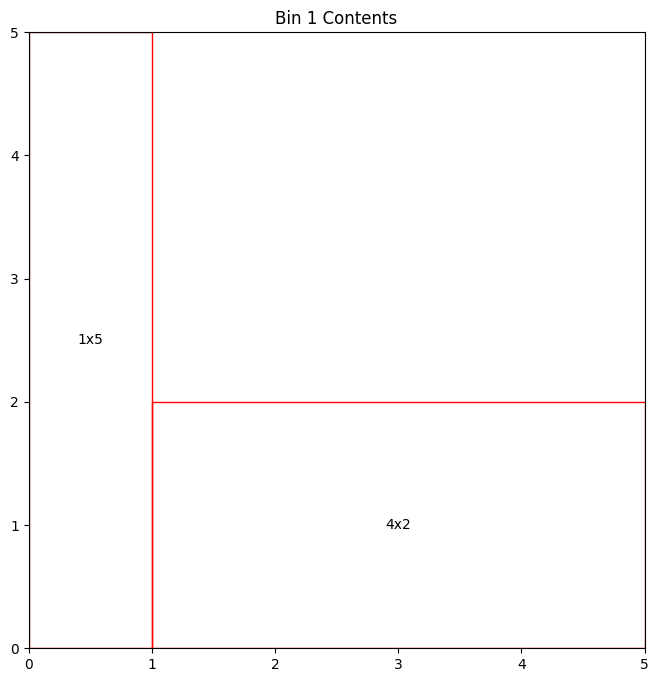

Bin 1 has 12.00 units of area left


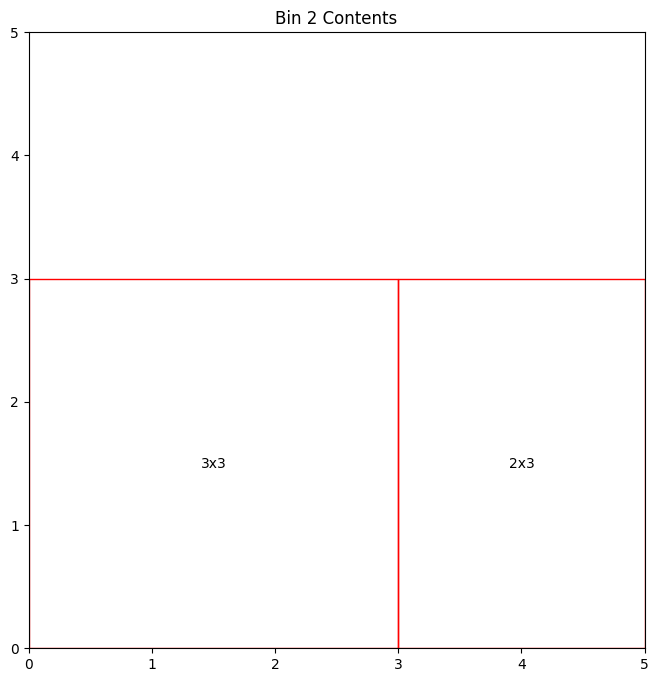

Bin 2 has 10.00 units of area left
Total number of bins = 2
Total area left in bins = 22.00


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from typing import List, Tuple

def heuristics_v1(demand: np.ndarray, capacities: Tuple[int, int]) -> List[List[Tuple[int, int, int]]]:
    n = demand.shape[0]
    unpacked_items = set(range(n))
    bins = []
    bin_width, bin_height = capacities

    while unpacked_items:
        current_bin = []
        remaining_width, remaining_height = bin_width, bin_height
        current_x, current_y = 0, 0
        row_height = 0
        
        for item in sorted(unpacked_items, key=lambda x: -max(demand[x])):
            width, height = demand[item]
            
            if current_x + width <= bin_width:  # Place item on the current row
                current_bin.append((item, current_x, current_y))
                current_x += width
                row_height = max(row_height, height)
            elif current_y + row_height + height <= bin_height:  # Move to the next row
                current_x = 0
                current_y += row_height
                row_height = height
                current_bin.append((item, current_x, current_y))
                current_x += width
            else:  # If the item doesn't fit in the current bin
                break
        
        packed_items = [item[0] for item in current_bin]
        bins.append(current_bin)
        unpacked_items -= set(packed_items)

    return bins

def plot_rectangles(bin_number: int, bin: List[Tuple[int, int, int]], demand: np.ndarray, bin_capacities: Tuple[int, int]) -> float:
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.set_title(f'Bin {bin_number} Contents')
    bin_width, bin_height = bin_capacities
    ax.set_xlim(0, bin_width)
    ax.set_ylim(0, bin_height)
    
    total_block_area = 0
    
    for item, x, y in bin:
        width, height = demand[item]
        rect_patch = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect_patch)
        ax.text(x + width / 2, y + height / 2, f'{width}x{height}', ha='center', va='center')
        total_block_area += width * height

    bin_area = bin_width * bin_height
    area_left = bin_area - total_block_area

    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

    return area_left

if __name__ == "__main__":
    demand = np.array([
        [4, 2],
        [3, 3],
        [1, 5],
        [2, 3]
    ])

    bin_capacities = (5, 5)

    bins = heuristics_v1(demand, bin_capacities)

    total_bins = len(bins)
    total_area_left = 0

    for bin_number, bin in enumerate(bins, start=1):
        area_left = plot_rectangles(bin_number, bin, demand, bin_capacities)
        total_area_left += area_left
        print(f'Bin {bin_number} has {area_left:.2f} units of area left')

    print(f'Total number of bins = {total_bins}')
    print(f'Total area left in bins = {total_area_left:.2f}')
    
    result = {
        'total_bins': total_bins,
        'total_area_left': total_area_left
    }


In [9]:
bins

[[(2, 0, 0), (0, 1, 0)], [(1, 0, 0), (3, 3, 0)]]

[[ 8  7]
 [10  5]
 [19  7]
 [11  4]
 [19  2]
 [11  8]
 [11  3]
 [11  2]
 [10  6]
 [16  2]
 [20  3]
 [ 3  1]
 [17  6]
 [13  8]
 [16  3]
 [ 9  5]
 [18  8]
 [ 2  6]
 [19  6]
 [13  9]]


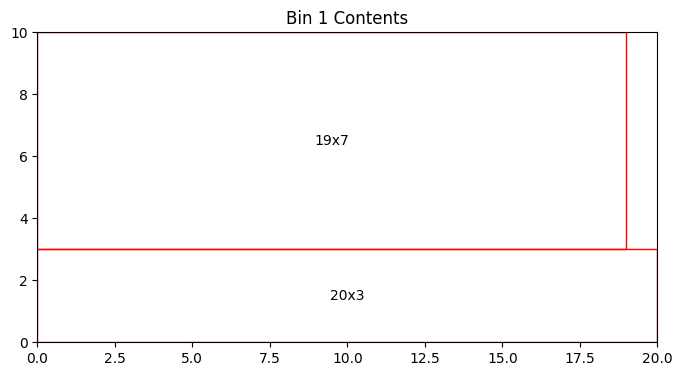

Bin 1 has 7.00 units of area left


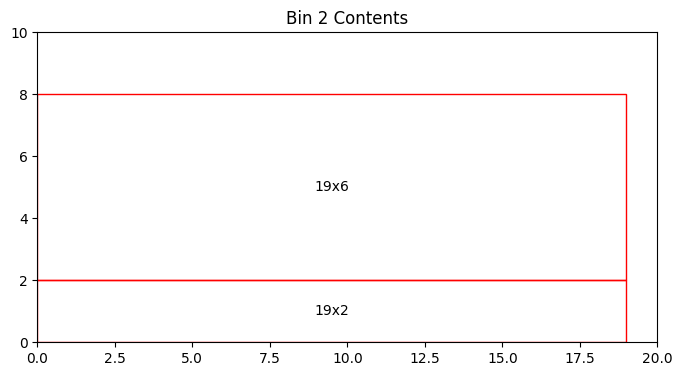

Bin 2 has 48.00 units of area left


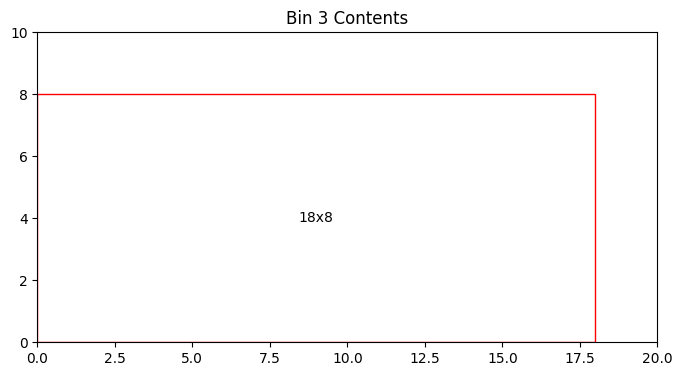

Bin 3 has 56.00 units of area left


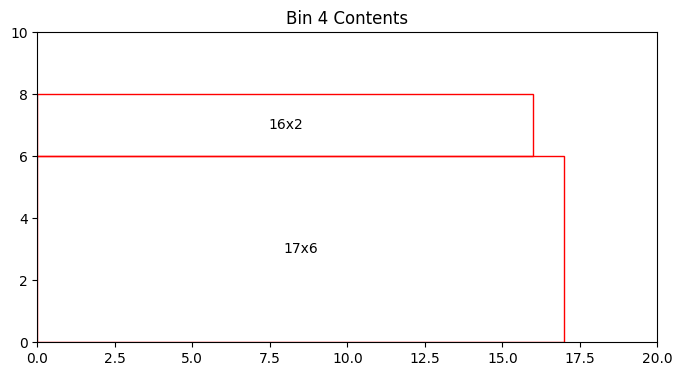

Bin 4 has 66.00 units of area left


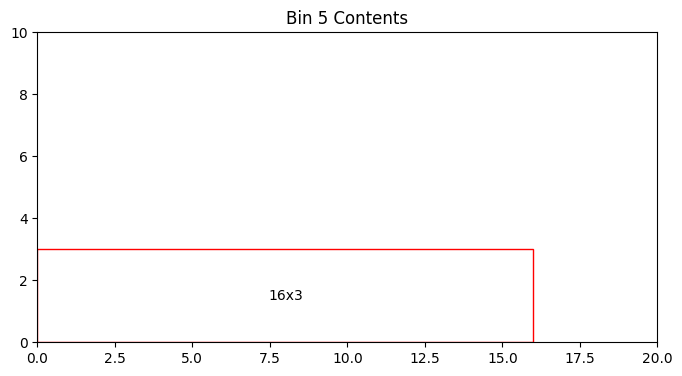

Bin 5 has 152.00 units of area left


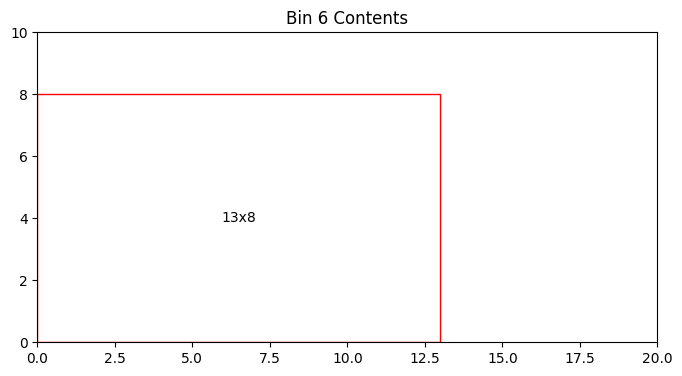

Bin 6 has 96.00 units of area left


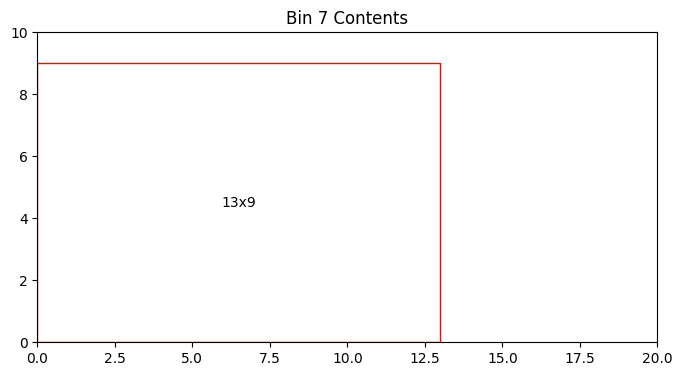

Bin 7 has 83.00 units of area left


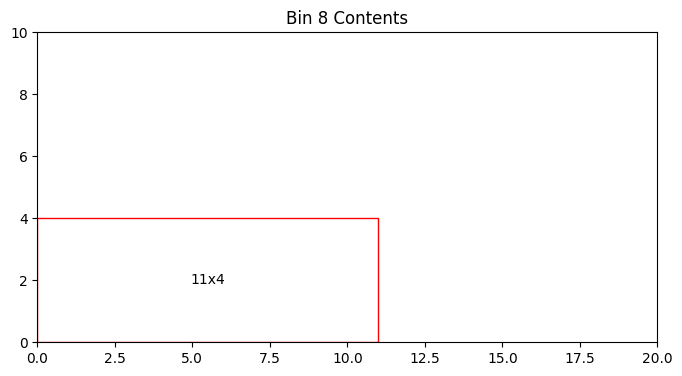

Bin 8 has 156.00 units of area left


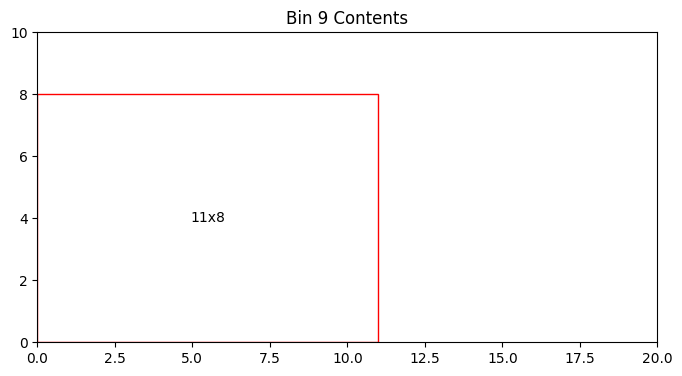

Bin 9 has 112.00 units of area left


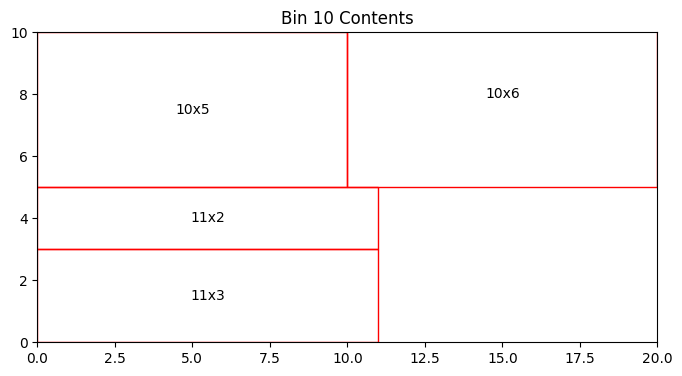

Bin 10 has 35.00 units of area left


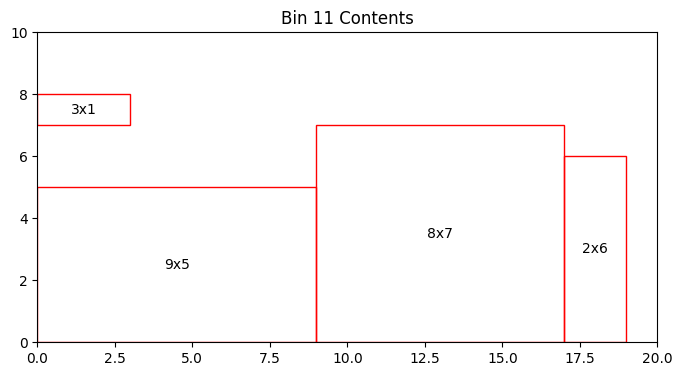

Bin 11 has 84.00 units of area left
Total number of bins = 11
Total area left in bins = 895.00


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from typing import List, Tuple
import random
import numpy as np

def heuristics_v1(demand: np.ndarray, capacities: Tuple[int, int]) -> List[List[Tuple[int, int, int]]]:
    n = demand.shape[0]
    unpacked_items = set(range(n))
    bins = []
    bin_width, bin_height = capacities

    while unpacked_items:
        current_bin = []
        remaining_width, remaining_height = bin_width, bin_height
        current_x, current_y = 0, 0
        row_height = 0
        
        for item in sorted(unpacked_items, key=lambda x: -max(demand[x])):
            width, height = demand[item]
            
            if current_x + width <= bin_width:  # Place item on the current row
                current_bin.append((item, current_x, current_y))
                current_x += width
                row_height = max(row_height, height)
            elif current_y + row_height + height <= bin_height:  # Move to the next row
                current_x = 0
                current_y += row_height
                row_height = height
                current_bin.append((item, current_x, current_y))
                current_x += width
            else:  # If the item doesn't fit in the current bin
                break
        
        packed_items = [item[0] for item in current_bin]
        bins.append(current_bin)
        unpacked_items -= set(packed_items)

    return bins





def plot_rectangles(bin_number: int, bin: List[Tuple[int, int, int]], demand: np.ndarray, bin_capacities: Tuple[int, int]) -> float:
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.set_title(f'Bin {bin_number} Contents')
    bin_width, bin_height = bin_capacities
    ax.set_xlim(0, bin_width)
    ax.set_ylim(0, bin_height)
    
    total_block_area = 0
    
    for item, x, y in bin:
        width, height = demand[item]
        rect_patch = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect_patch)
        ax.text(x + width / 2, y + height / 2, f'{width}x{height}', ha='center', va='center')
        total_block_area += width * height

    bin_area = bin_width * bin_height
    area_left = bin_area - total_block_area

    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

    return area_left




class Rectangle:
    def __init__(self, width, height):
        self.width = width
        self.height = height
    def __repr__(self):
        return f"Rectangle({self.width}, {self.height})"

def generate_rectangles(num_rectangles):
    rectangles = []
    for _ in range(num_rectangles):
        width = random.randint(1, 20)  # Adjust range as needed
        height = random.randint(1, 10)  # Adjust range as needed
        rectangles.append(Rectangle(width, height))
    return rectangles

def rectangles_to_array(rectangles):
    # Create an array where each row is [width, height] of a rectangle
    data = np.array([[rect.width, rect.height] for rect in rectangles])
    return data

# Example of generating and converting rectangles
rectangles = generate_rectangles(20)
rectangles_array = rectangles_to_array(rectangles)

# Print the resulting array
print(rectangles_array)

bin_capacities = (20, 10)

bins = heuristics_v1(rectangles_array, bin_capacities)

total_bins = len(bins)
total_area_left = 0

for bin_number, bin in enumerate(bins, start=1):
    area_left = plot_rectangles(bin_number, bin, rectangles_array, bin_capacities)
    total_area_left += area_left
    print(f'Bin {bin_number} has {area_left:.2f} units of area left')

print(f'Total number of bins = {total_bins}')
print(f'Total area left in bins = {total_area_left:.2f}')

result = {
    'total_bins': total_bins,
    'total_area_left': total_area_left
}


[[ 16  19]
 [169  63]
 [193  63]
 [ 85   4]
 [171  74]
 [ 26  83]
 [136  16]
 [ 89   6]
 [176 100]
 [ 20   1]
 [156  66]
 [  5  33]
 [ 14  45]
 [ 12  63]
 [155   9]
 [  4  79]
 [128  64]
 [179  58]
 [ 82  97]
 [ 74  77]
 [109  97]
 [ 97  95]
 [ 67  81]
 [119  51]
 [122  74]
 [ 85   4]
 [ 26  60]
 [ 82   5]
 [178  52]
 [132  98]
 [100  33]
 [ 12  51]
 [196  80]
 [ 15  20]
 [ 91  78]
 [171  35]
 [  4   4]
 [ 44  99]
 [  3  86]
 [131  46]
 [148  36]
 [105  34]
 [135  60]
 [105  36]
 [ 28  91]
 [ 61  30]
 [170  99]
 [  5  48]
 [181   8]
 [  4  37]]


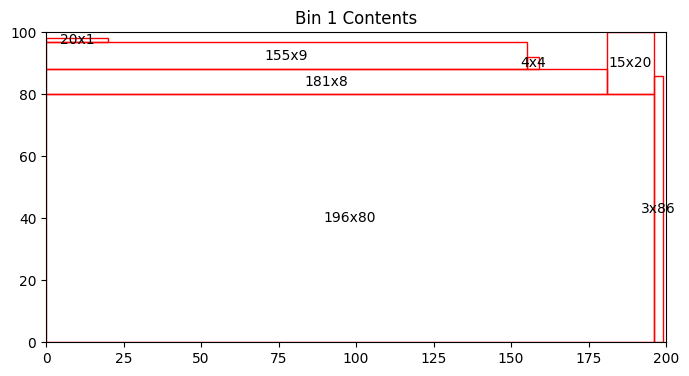

Bin 1 has 883.00 units of area left


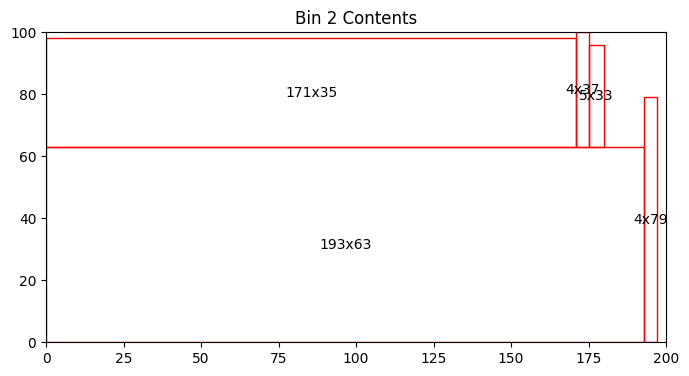

Bin 2 has 1227.00 units of area left


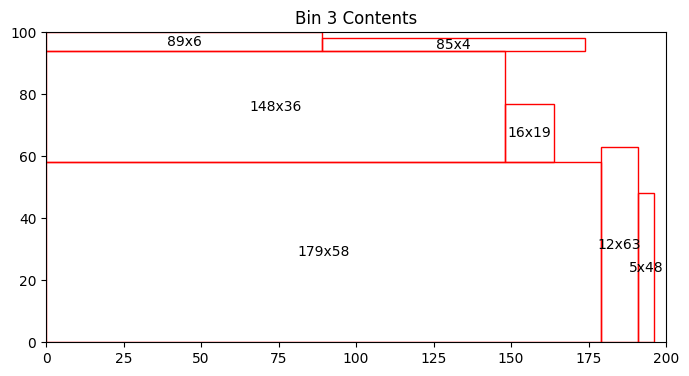

Bin 3 has 2116.00 units of area left


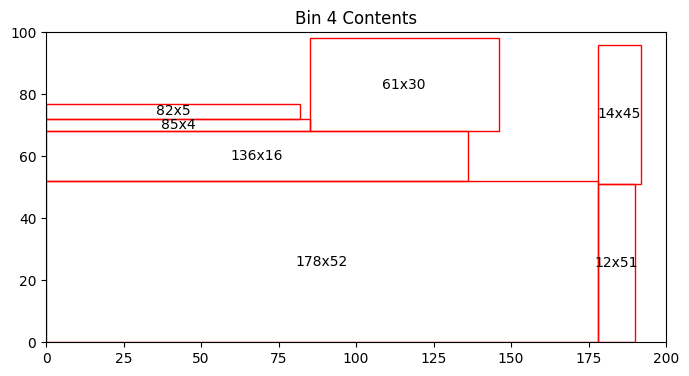

Bin 4 has 4746.00 units of area left


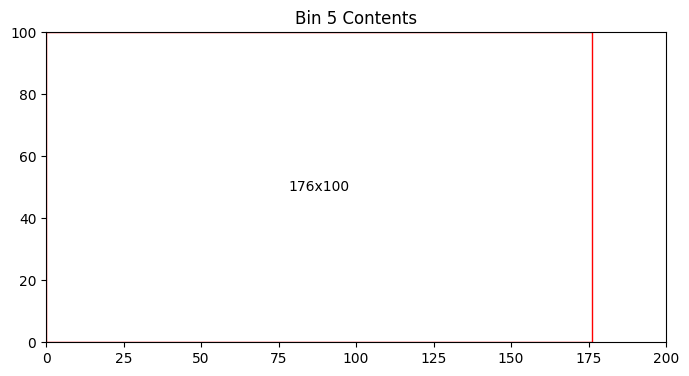

Bin 5 has 2400.00 units of area left


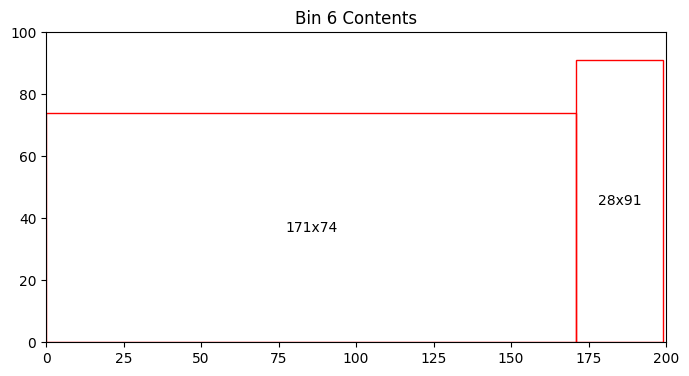

Bin 6 has 4798.00 units of area left


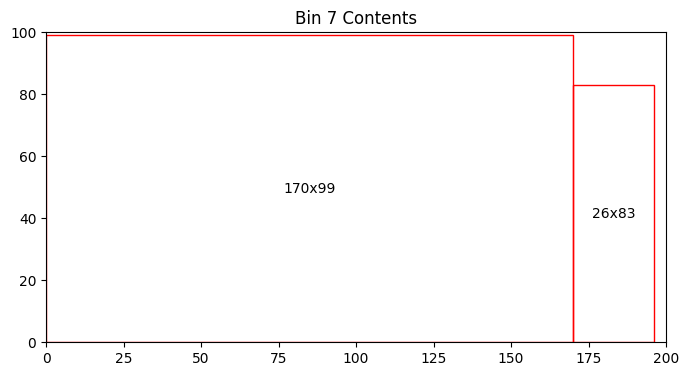

Bin 7 has 1012.00 units of area left


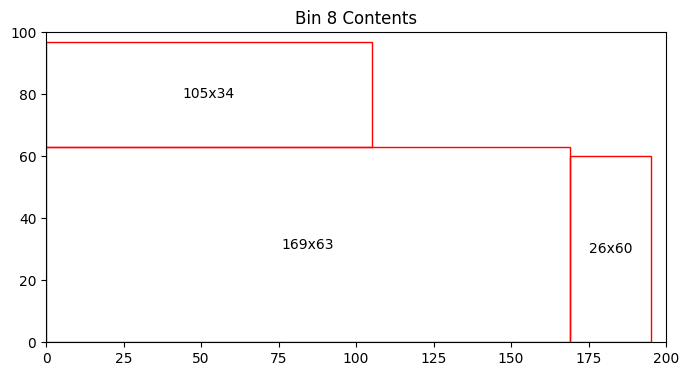

Bin 8 has 4223.00 units of area left


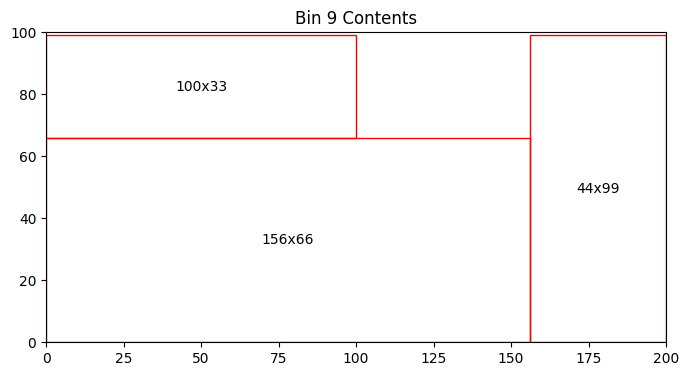

Bin 9 has 2048.00 units of area left


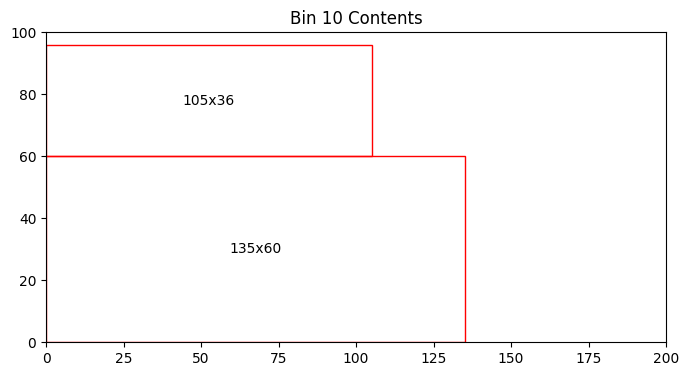

Bin 10 has 8120.00 units of area left


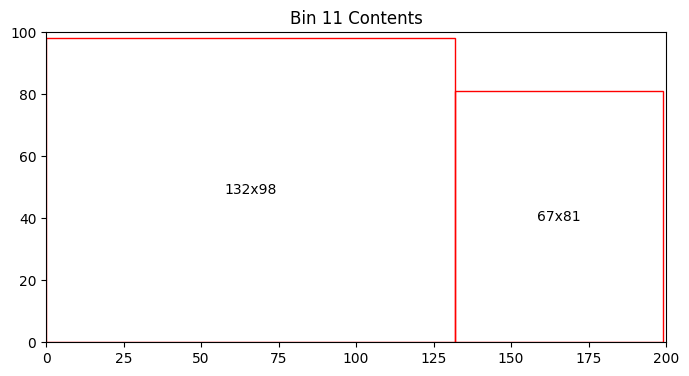

Bin 11 has 1637.00 units of area left


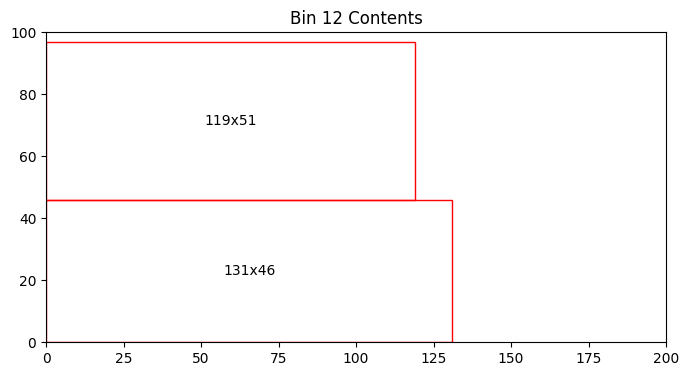

Bin 12 has 7905.00 units of area left


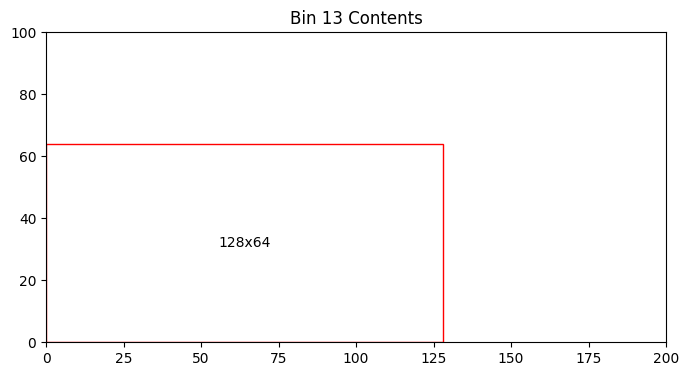

Bin 13 has 11808.00 units of area left


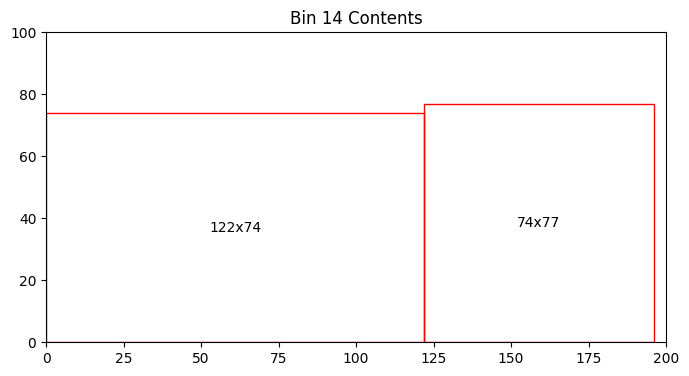

Bin 14 has 5274.00 units of area left


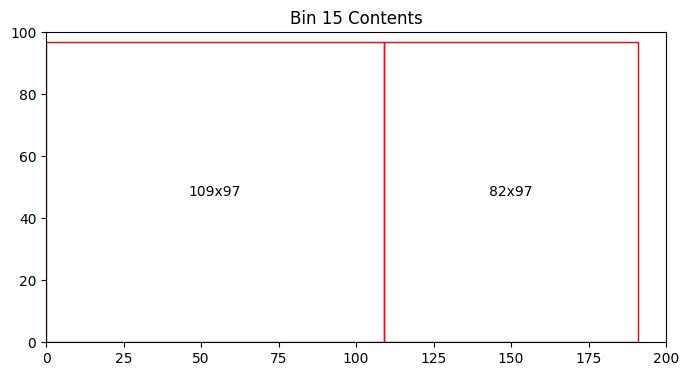

Bin 15 has 1473.00 units of area left


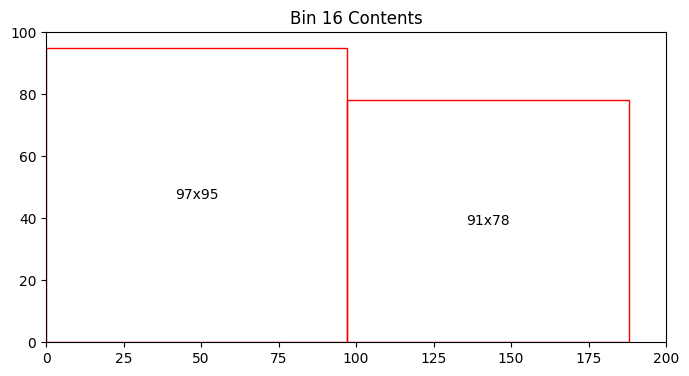

Bin 16 has 3687.00 units of area left
Total number of bins = 16
Total area left in bins = 63357.00


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from typing import List, Tuple
import random
import numpy as np

import numpy as np
from typing import List, Tuple

import numpy as np
from typing import List, Tuple

def heuristics_v1(demand: np.ndarray, capacities: Tuple[int, int]) -> List[List[Tuple[int, int, int]]]:
    bin_width, bin_height = capacities
    bins = []
    
    remaining_items = sorted([(i, width, height) for i, (width, height) in enumerate(demand)], key=lambda x: max(x[1], x[2]), reverse=True)

    def can_place_item(bin_items, item_width, item_height):
        positions = []
        for current_item in bin_items:
            i, cx, cy, cwidth, cheight = current_item
            positions.append((cx + cwidth, cy))
            positions.append((cx, cy + cheight))
        
        positions = sorted(positions, key=lambda x: (x[0], x[1]))  # prioritize bottom-left first

        for x, y in positions:
            if x + item_width <= bin_width and y + item_height <= bin_height:
                if all(not (x < cx + cwidth and x + item_width > cx and y < cy + cheight and y + item_height > cy) for _, cx, cy, cwidth, cheight in bin_items):
                    return x, y
        return None

    while remaining_items:
        current_bin = []
        to_remove = []

        for item in remaining_items:
            i, item_width, item_height = item
            if not current_bin:
                current_bin.append((i, 0, 0, item_width, item_height))
                to_remove.append(item)
            else:
                position = can_place_item(current_bin, item_width, item_height)
                if position:
                    x, y = position
                    current_bin.append((i, x, y, item_width, item_height))
                    to_remove.append(item)

        bins.append([(i, x, y) for i, x, y, _, _ in current_bin])
        for item in to_remove:
            remaining_items.remove(item)

    return bins





def plot_rectangles(bin_number: int, bin: List[Tuple[int, int, int]], demand: np.ndarray, bin_capacities: Tuple[int, int]) -> float:
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.set_title(f'Bin {bin_number} Contents')
    bin_width, bin_height = bin_capacities
    ax.set_xlim(0, bin_width)
    ax.set_ylim(0, bin_height)
    
    total_block_area = 0
    
    for item, x, y in bin:
        width, height = demand[item]
        rect_patch = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect_patch)
        ax.text(x + width / 2, y + height / 2, f'{width}x{height}', ha='center', va='center')
        total_block_area += width * height

    bin_area = bin_width * bin_height
    area_left = bin_area - total_block_area

    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

    return area_left




class Rectangle:
    def __init__(self, width, height):
        self.width = width
        self.height = height
    def __repr__(self):
        return f"Rectangle({self.width}, {self.height})"

def generate_rectangles(num_rectangles):
    rectangles = []
    for _ in range(num_rectangles):
        width = random.randint(1, 200)  # Adjust range as needed
        height = random.randint(1, 100)  # Adjust range as needed
        rectangles.append(Rectangle(width, height))
    return rectangles

def rectangles_to_array(rectangles):
    # Create an array where each row is [width, height] of a rectangle
    data = np.array([[rect.width, rect.height] for rect in rectangles])
    return data

# Example of generating and converting rectangles
rectangles = generate_rectangles(50)
rectangles_array = rectangles_to_array(rectangles)

# Print the resulting array
print(rectangles_array)

bin_capacities = (200, 100)

bins = heuristics_v1(rectangles_array, bin_capacities)

total_bins = len(bins)
total_area_left = 0

for bin_number, bin in enumerate(bins, start=1):
    area_left = plot_rectangles(bin_number, bin, rectangles_array, bin_capacities)
    total_area_left += area_left
    print(f'Bin {bin_number} has {area_left:.2f} units of area left')

print(f'Total number of bins = {total_bins}')
print(f'Total area left in bins = {total_area_left:.2f}')

result = {
    'total_bins': total_bins,
    'total_area_left': total_area_left
}


In [14]:
bins

[[(32, 0, 0),
  (48, 0, 80),
  (14, 0, 88),
  (38, 196, 0),
  (9, 0, 97),
  (33, 181, 80),
  (36, 155, 88)],
 [(2, 0, 0), (35, 0, 63), (15, 193, 0), (49, 171, 63), (11, 175, 63)],
 [(17, 0, 0),
  (40, 0, 58),
  (7, 0, 94),
  (3, 89, 94),
  (13, 179, 0),
  (47, 191, 0),
  (0, 148, 58)],
 [(28, 0, 0),
  (6, 0, 52),
  (25, 0, 68),
  (27, 0, 72),
  (45, 85, 68),
  (31, 178, 0),
  (12, 178, 51)],
 [(8, 0, 0)],
 [(4, 0, 0), (44, 171, 0)],
 [(46, 0, 0), (5, 170, 0)],
 [(1, 0, 0), (41, 0, 63), (26, 169, 0)],
 [(10, 0, 0), (30, 0, 66), (37, 156, 0)],
 [(42, 0, 0), (43, 0, 60)],
 [(29, 0, 0), (22, 132, 0)],
 [(39, 0, 0), (23, 0, 46)],
 [(16, 0, 0)],
 [(24, 0, 0), (19, 122, 0)],
 [(20, 0, 0), (18, 109, 0)],
 [(21, 0, 0), (34, 97, 0)]]

[[ 14  49]
 [ 12  95]
 [131  98]
 [152  17]
 [ 55  18]
 [113  61]
 [196  21]
 [167  65]
 [118  83]
 [ 45   5]
 [ 63  75]
 [ 46  91]
 [ 71  48]
 [  1  82]
 [192  39]
 [199   1]
 [ 11  28]
 [184  89]
 [102  69]
 [180  28]
 [ 76  53]
 [124  37]
 [ 95  95]
 [ 55   5]
 [ 10  14]
 [162  26]
 [104  23]
 [ 70  72]
 [154  64]
 [  5  15]
 [ 23  72]
 [140  16]
 [ 71  15]
 [181  78]
 [ 85  52]
 [ 41  77]
 [ 36  70]
 [138   5]
 [  2   7]
 [142  33]
 [ 36  59]
 [159  66]
 [157  46]
 [159  10]
 [168  37]
 [195  94]
 [ 37  72]
 [ 93  84]
 [121  55]
 [ 83  55]]


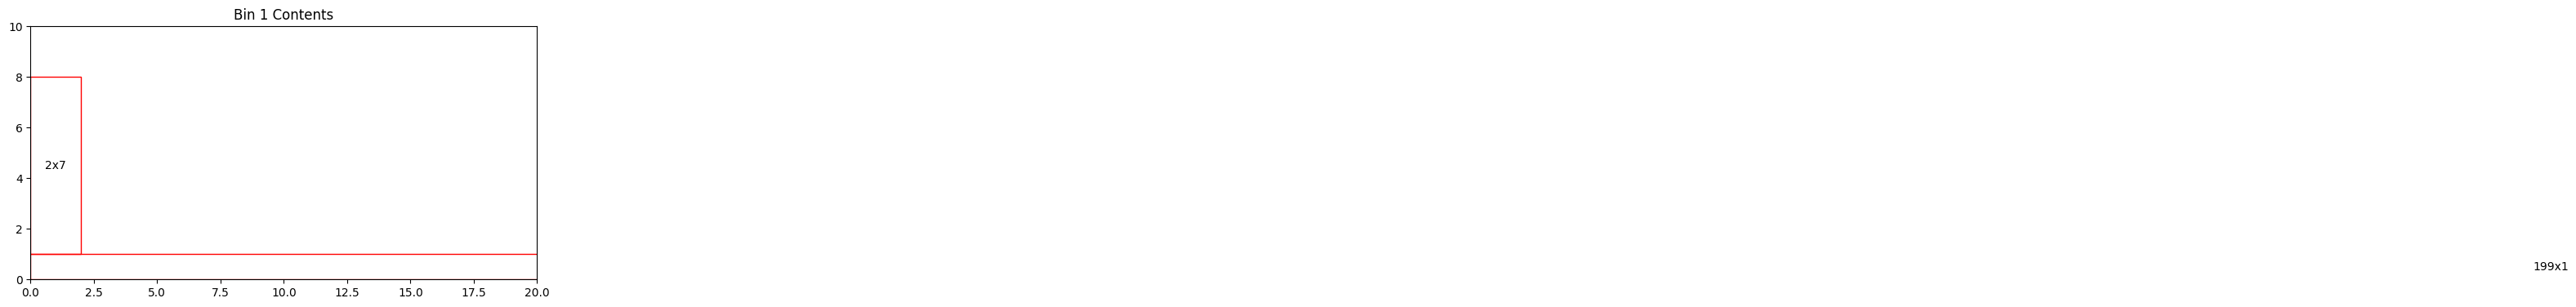

Bin 1 has -13.00 units of area left


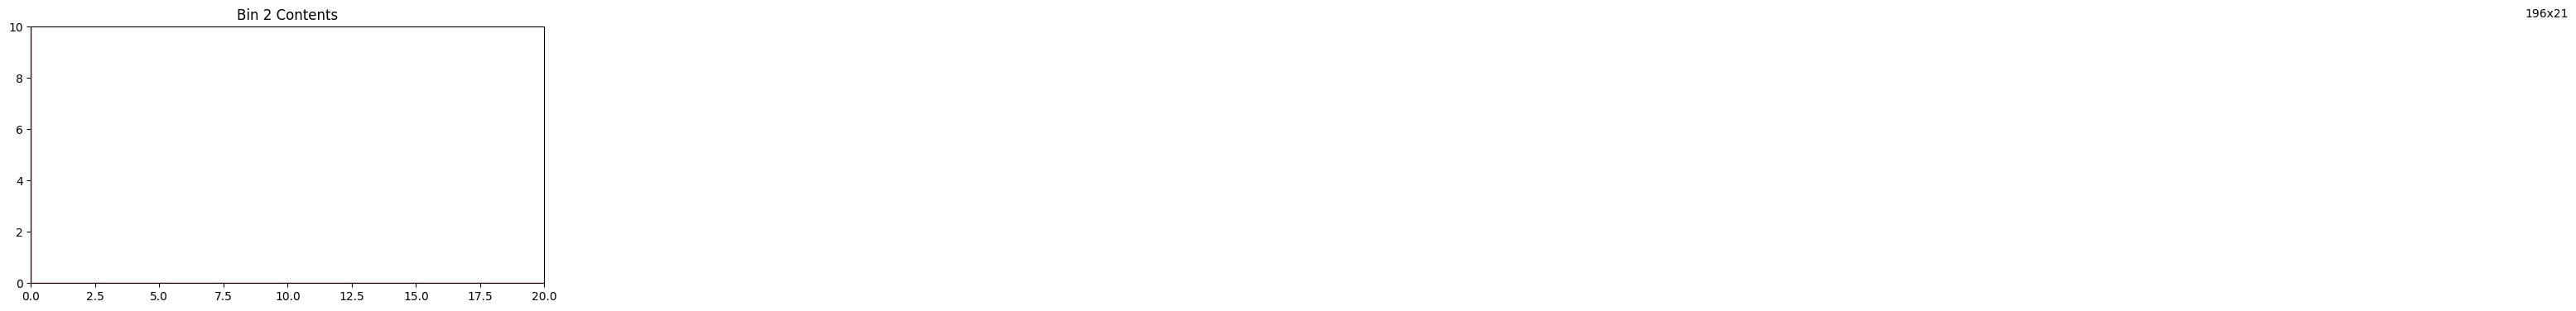

Bin 2 has -3916.00 units of area left


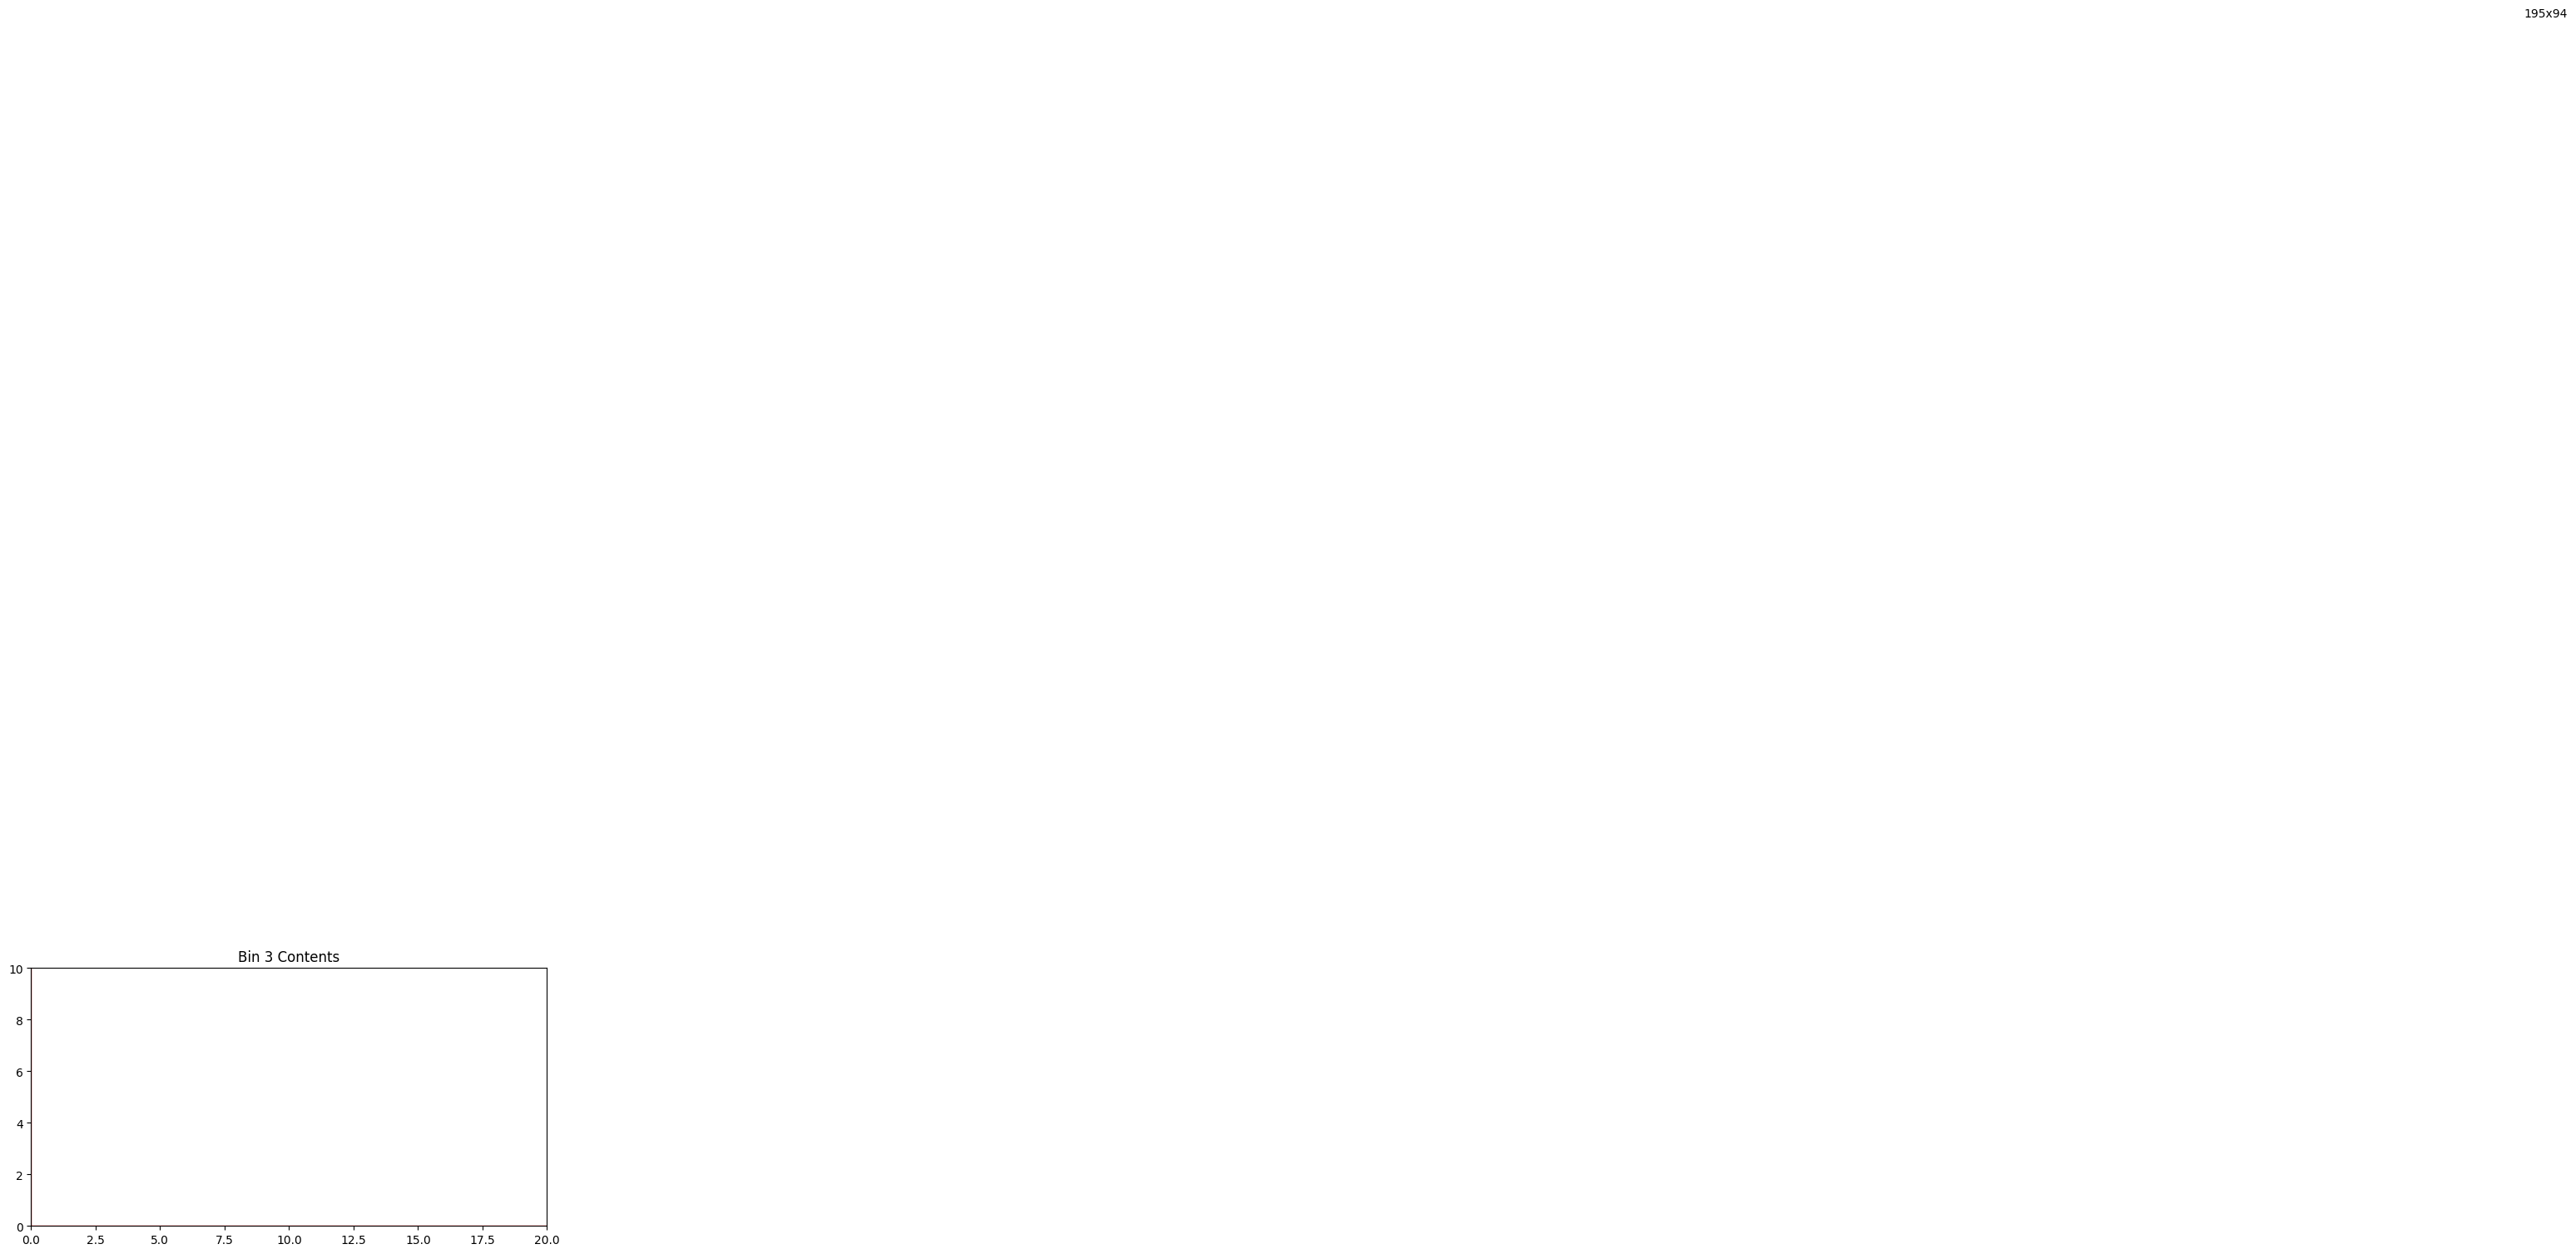

Bin 3 has -18130.00 units of area left


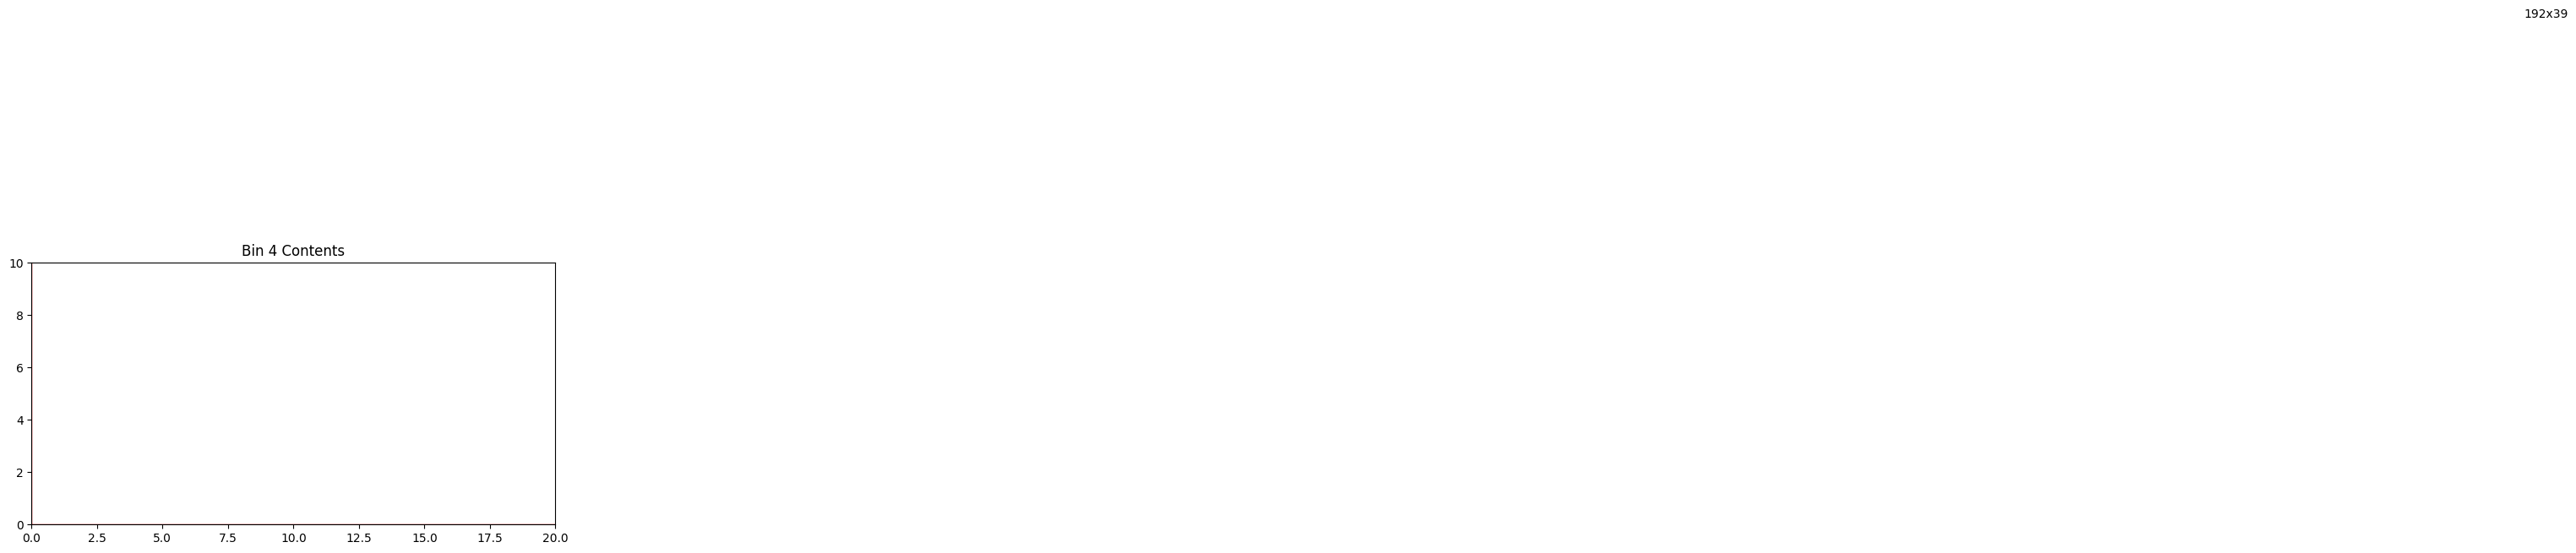

Bin 4 has -7288.00 units of area left


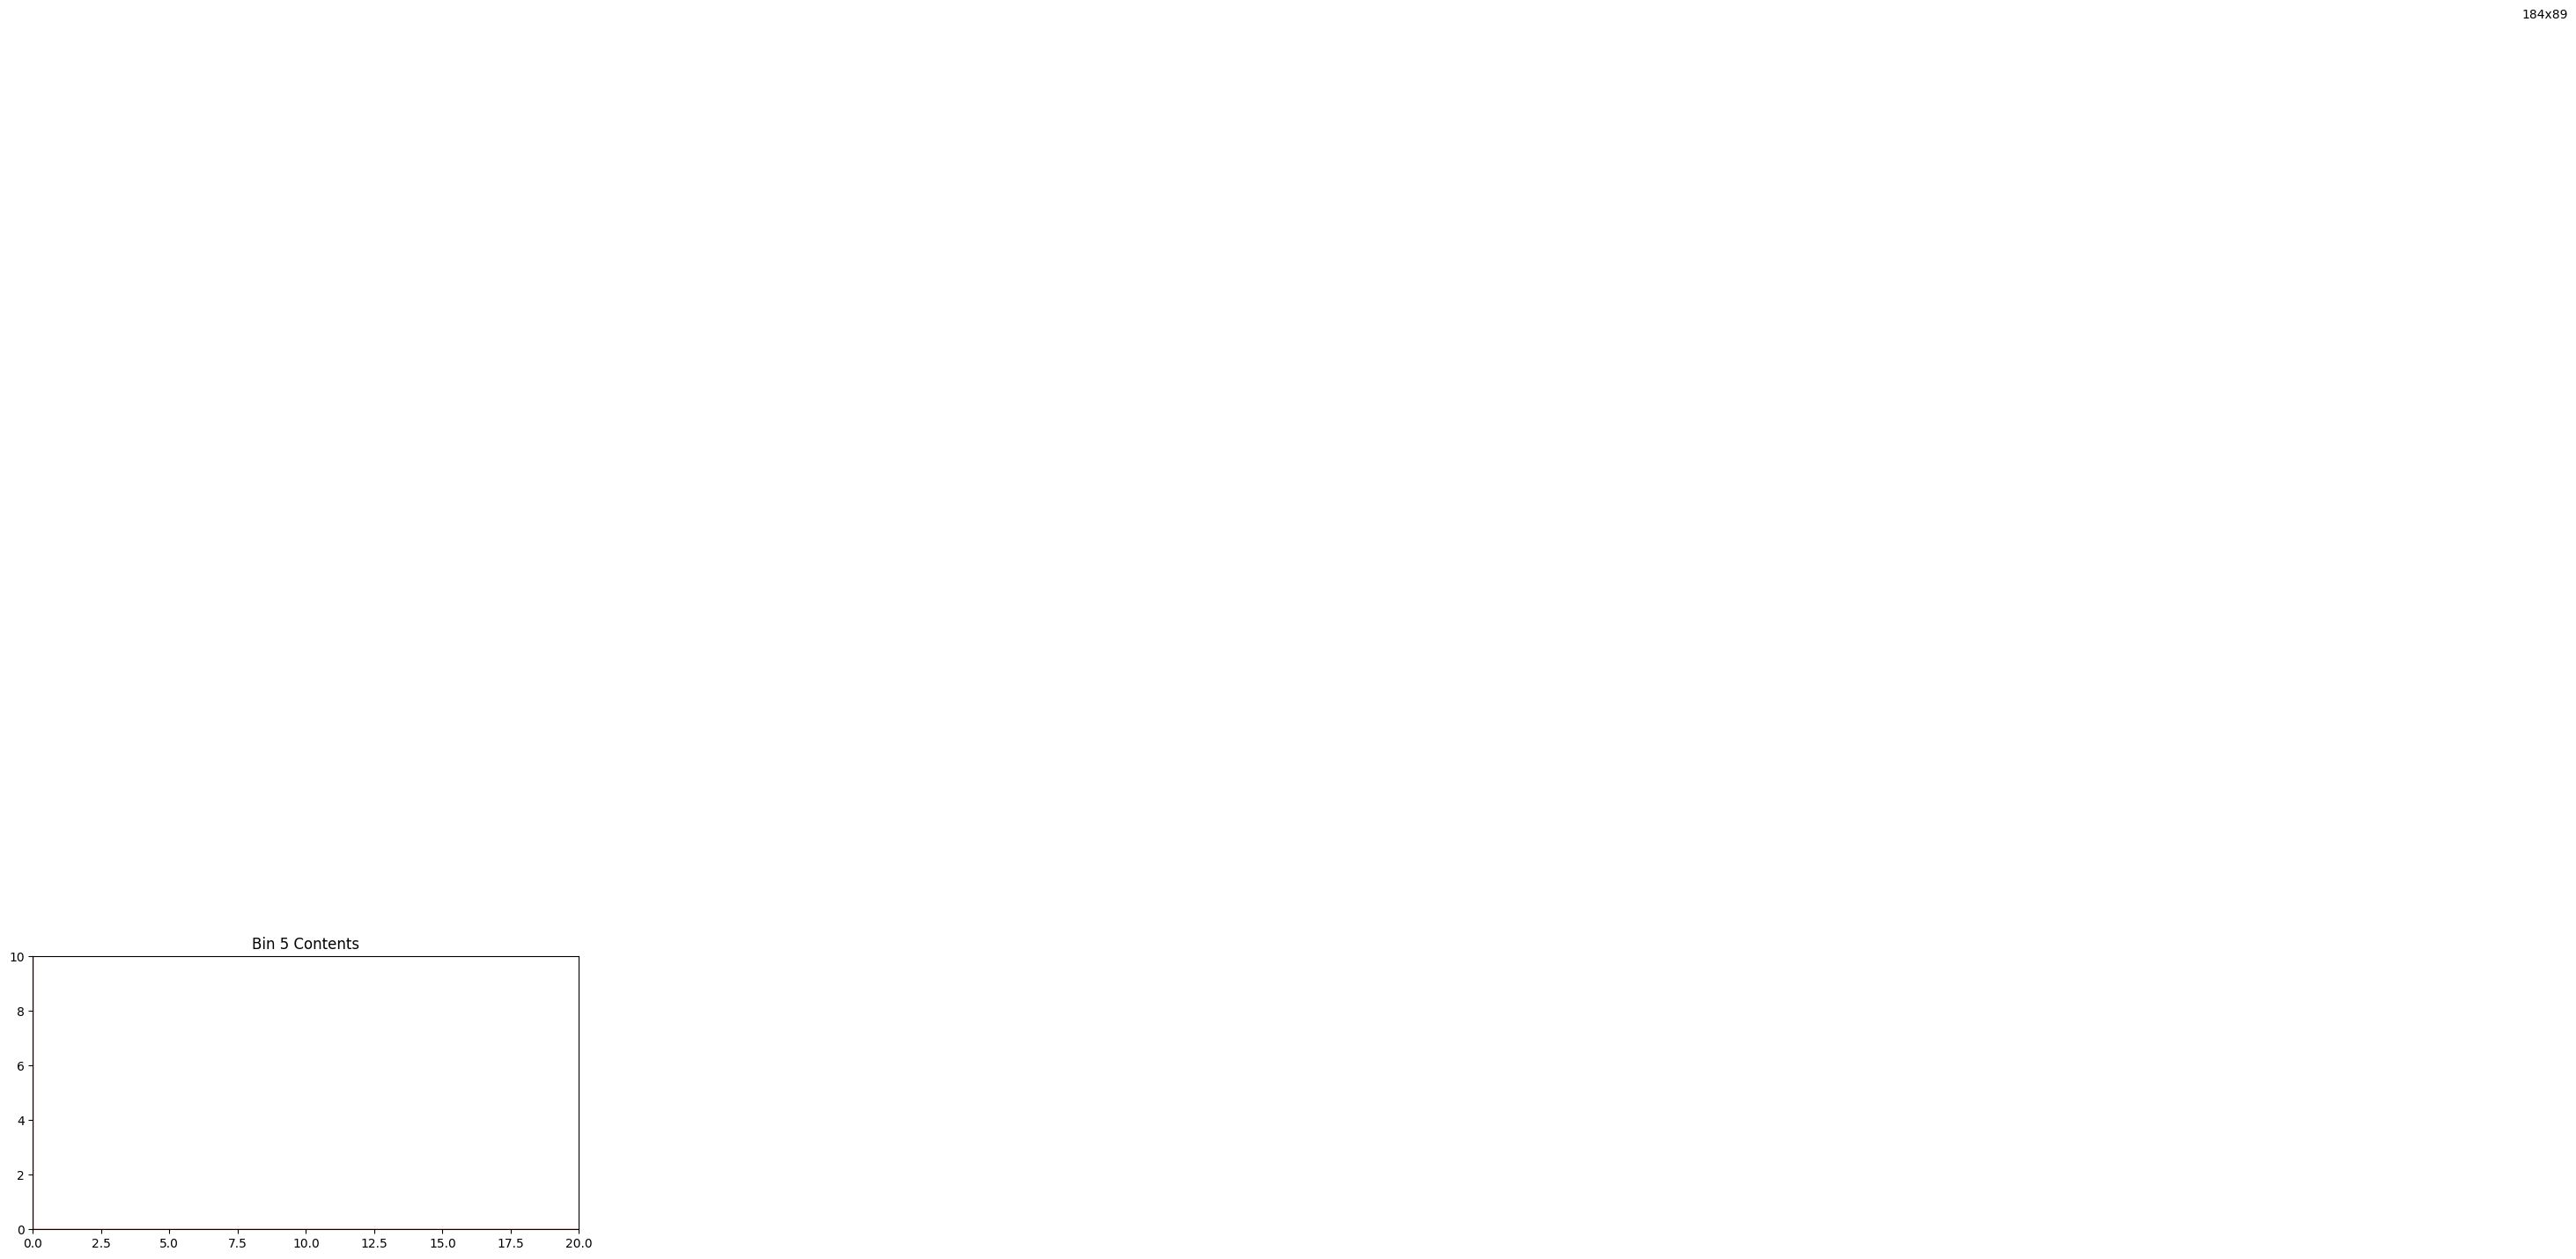

Bin 5 has -16176.00 units of area left


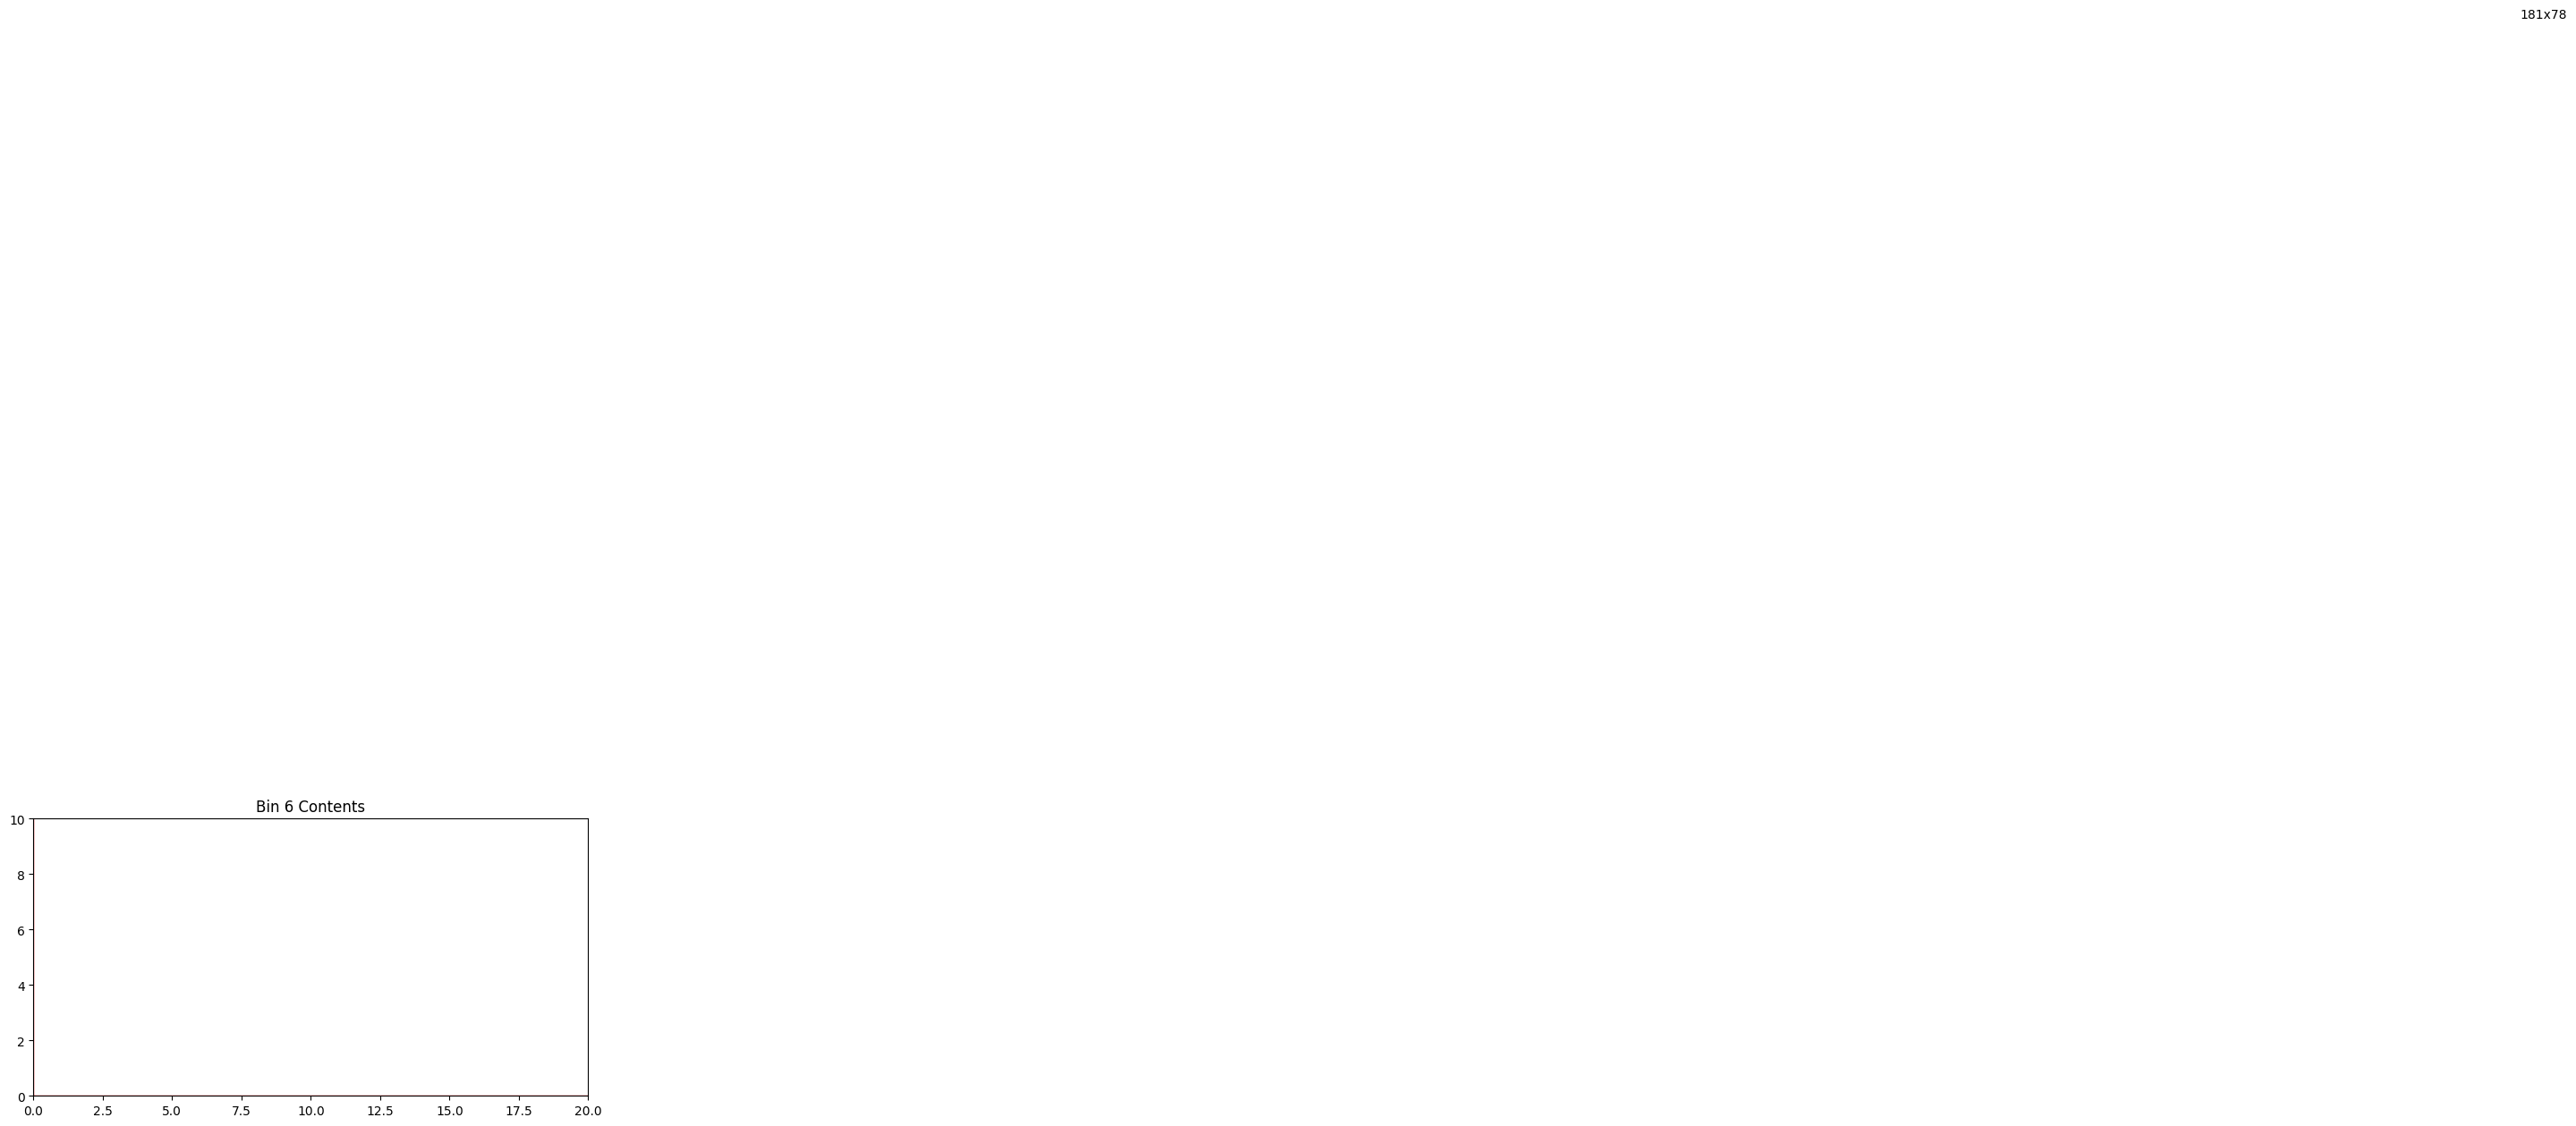

Bin 6 has -13918.00 units of area left


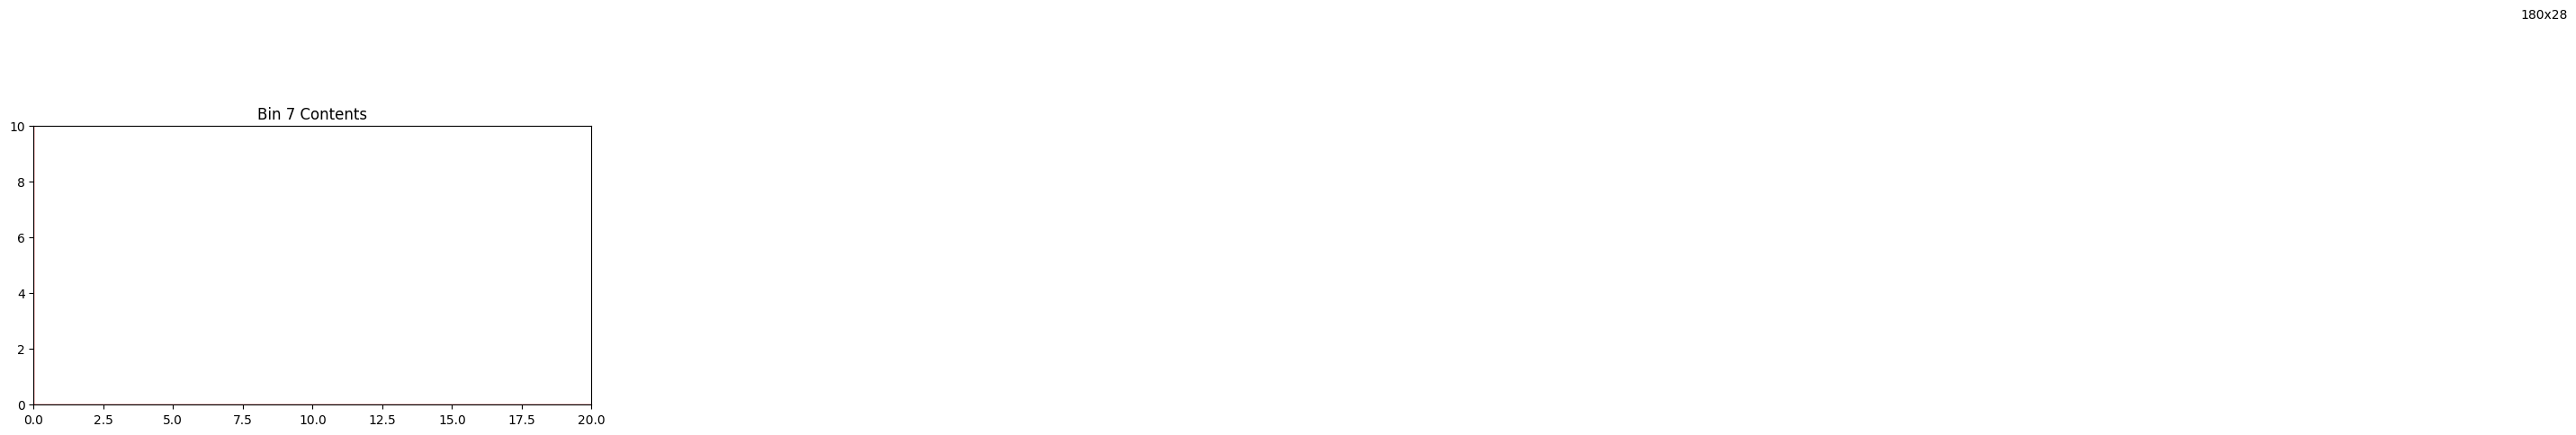

Bin 7 has -4840.00 units of area left


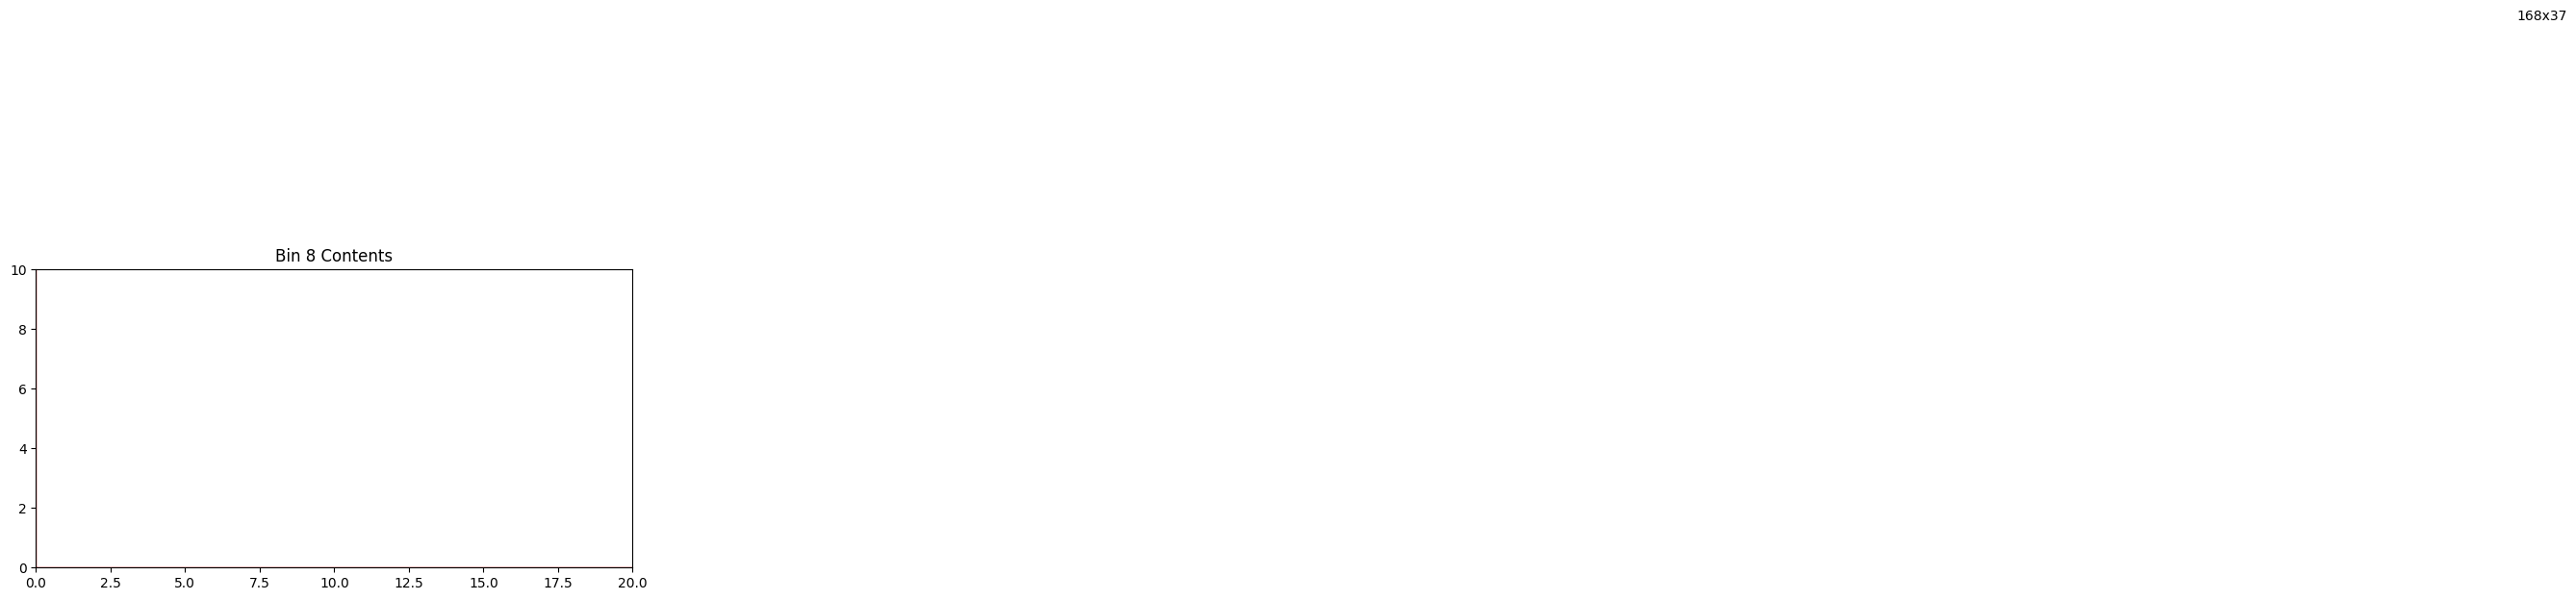

Bin 8 has -6016.00 units of area left


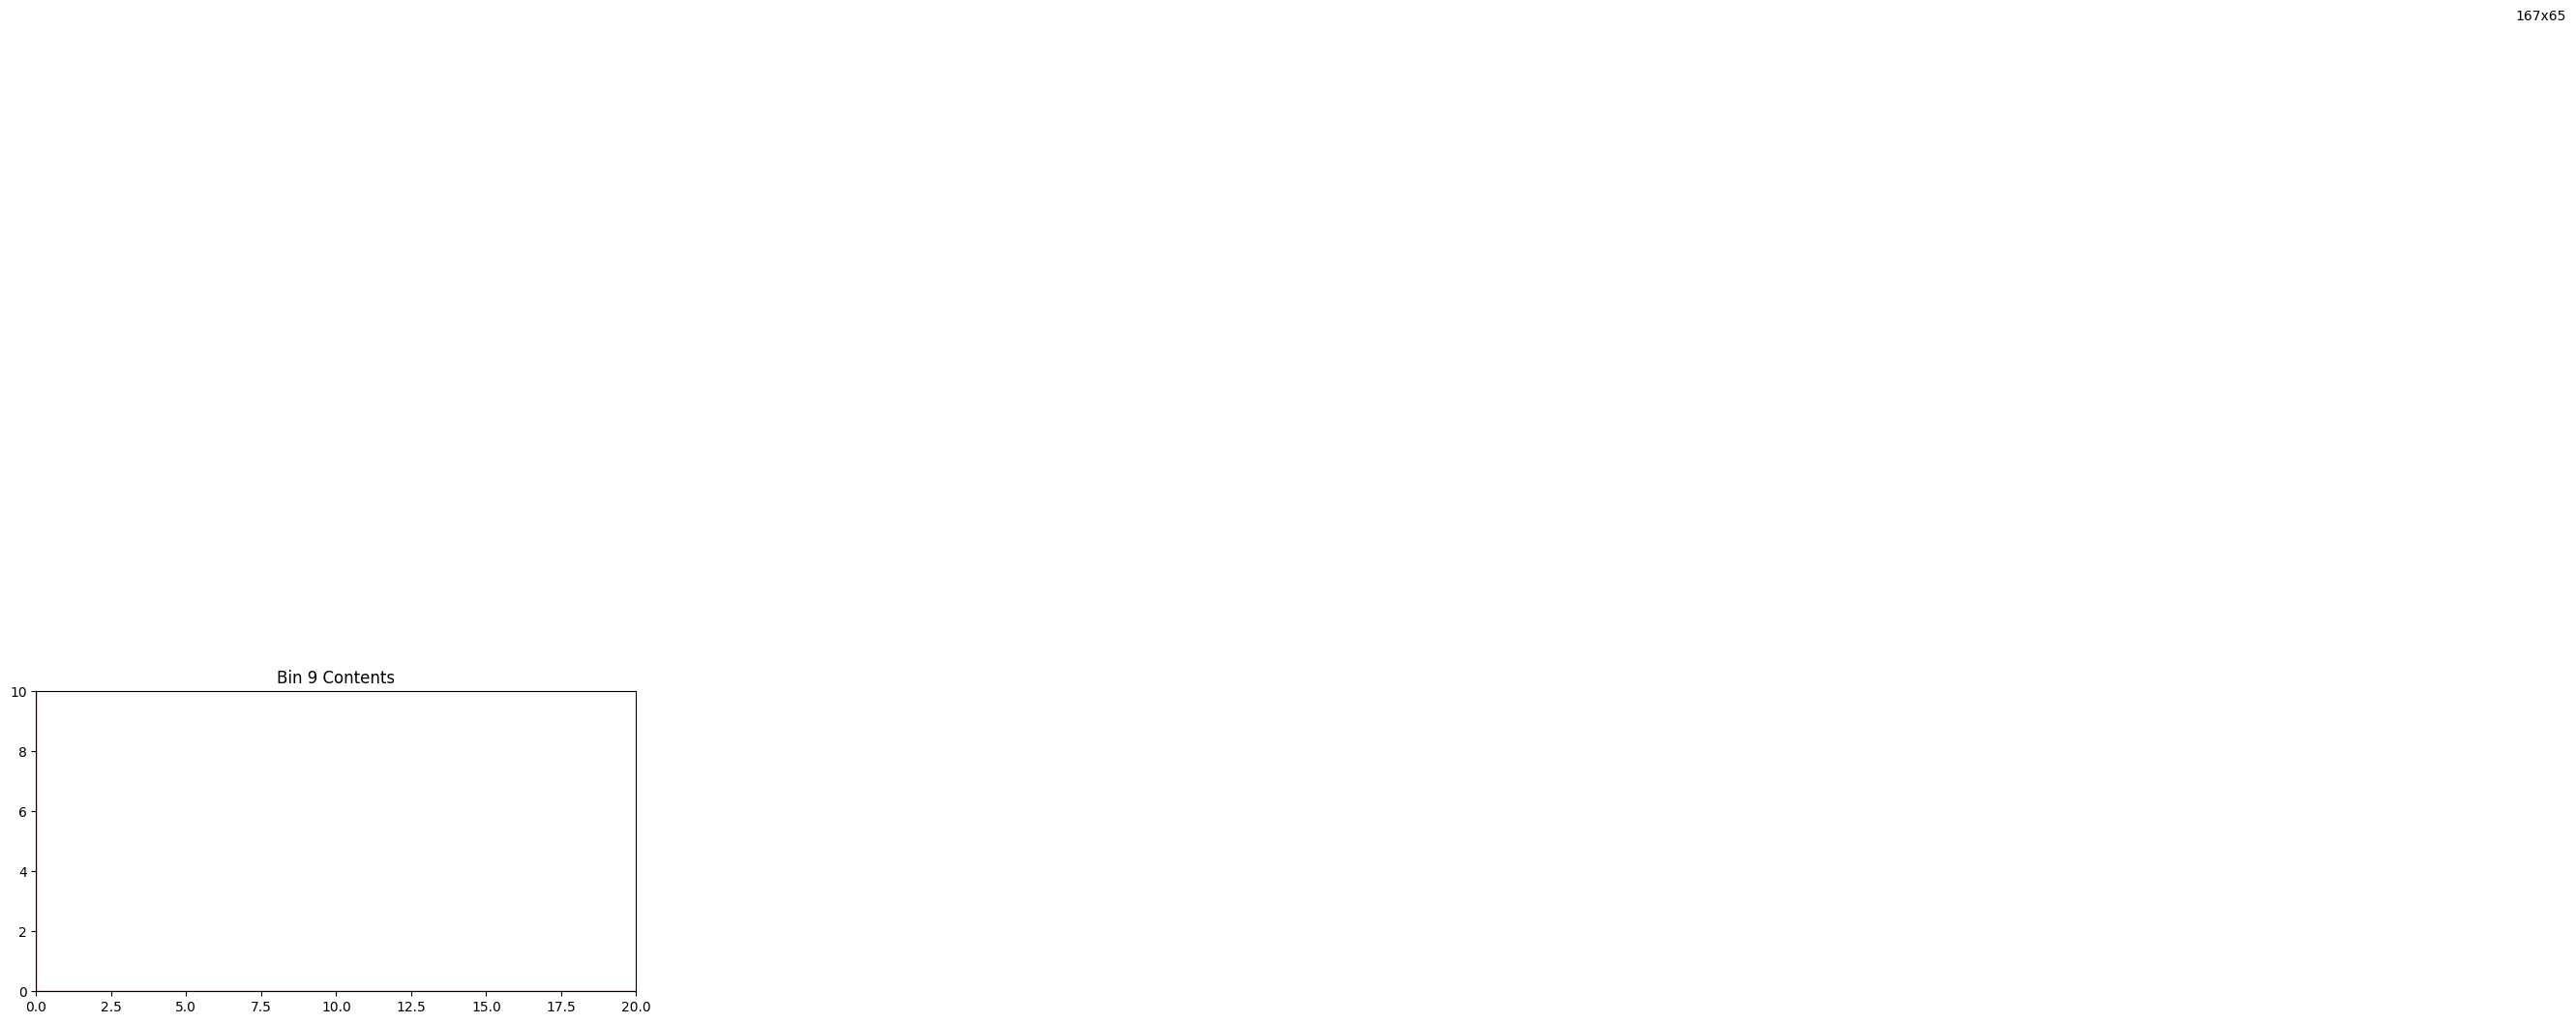

Bin 9 has -10655.00 units of area left


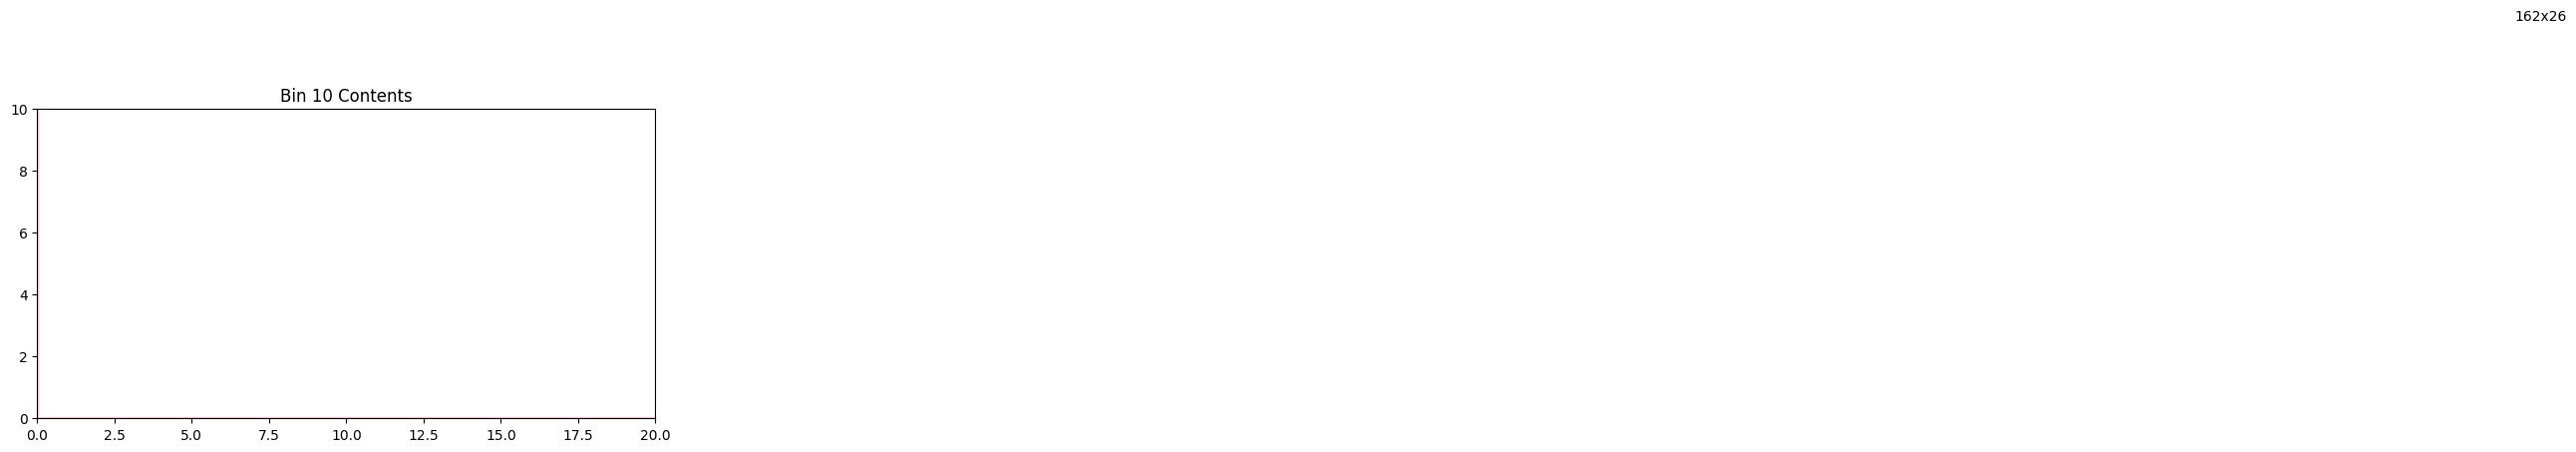

Bin 10 has -4012.00 units of area left


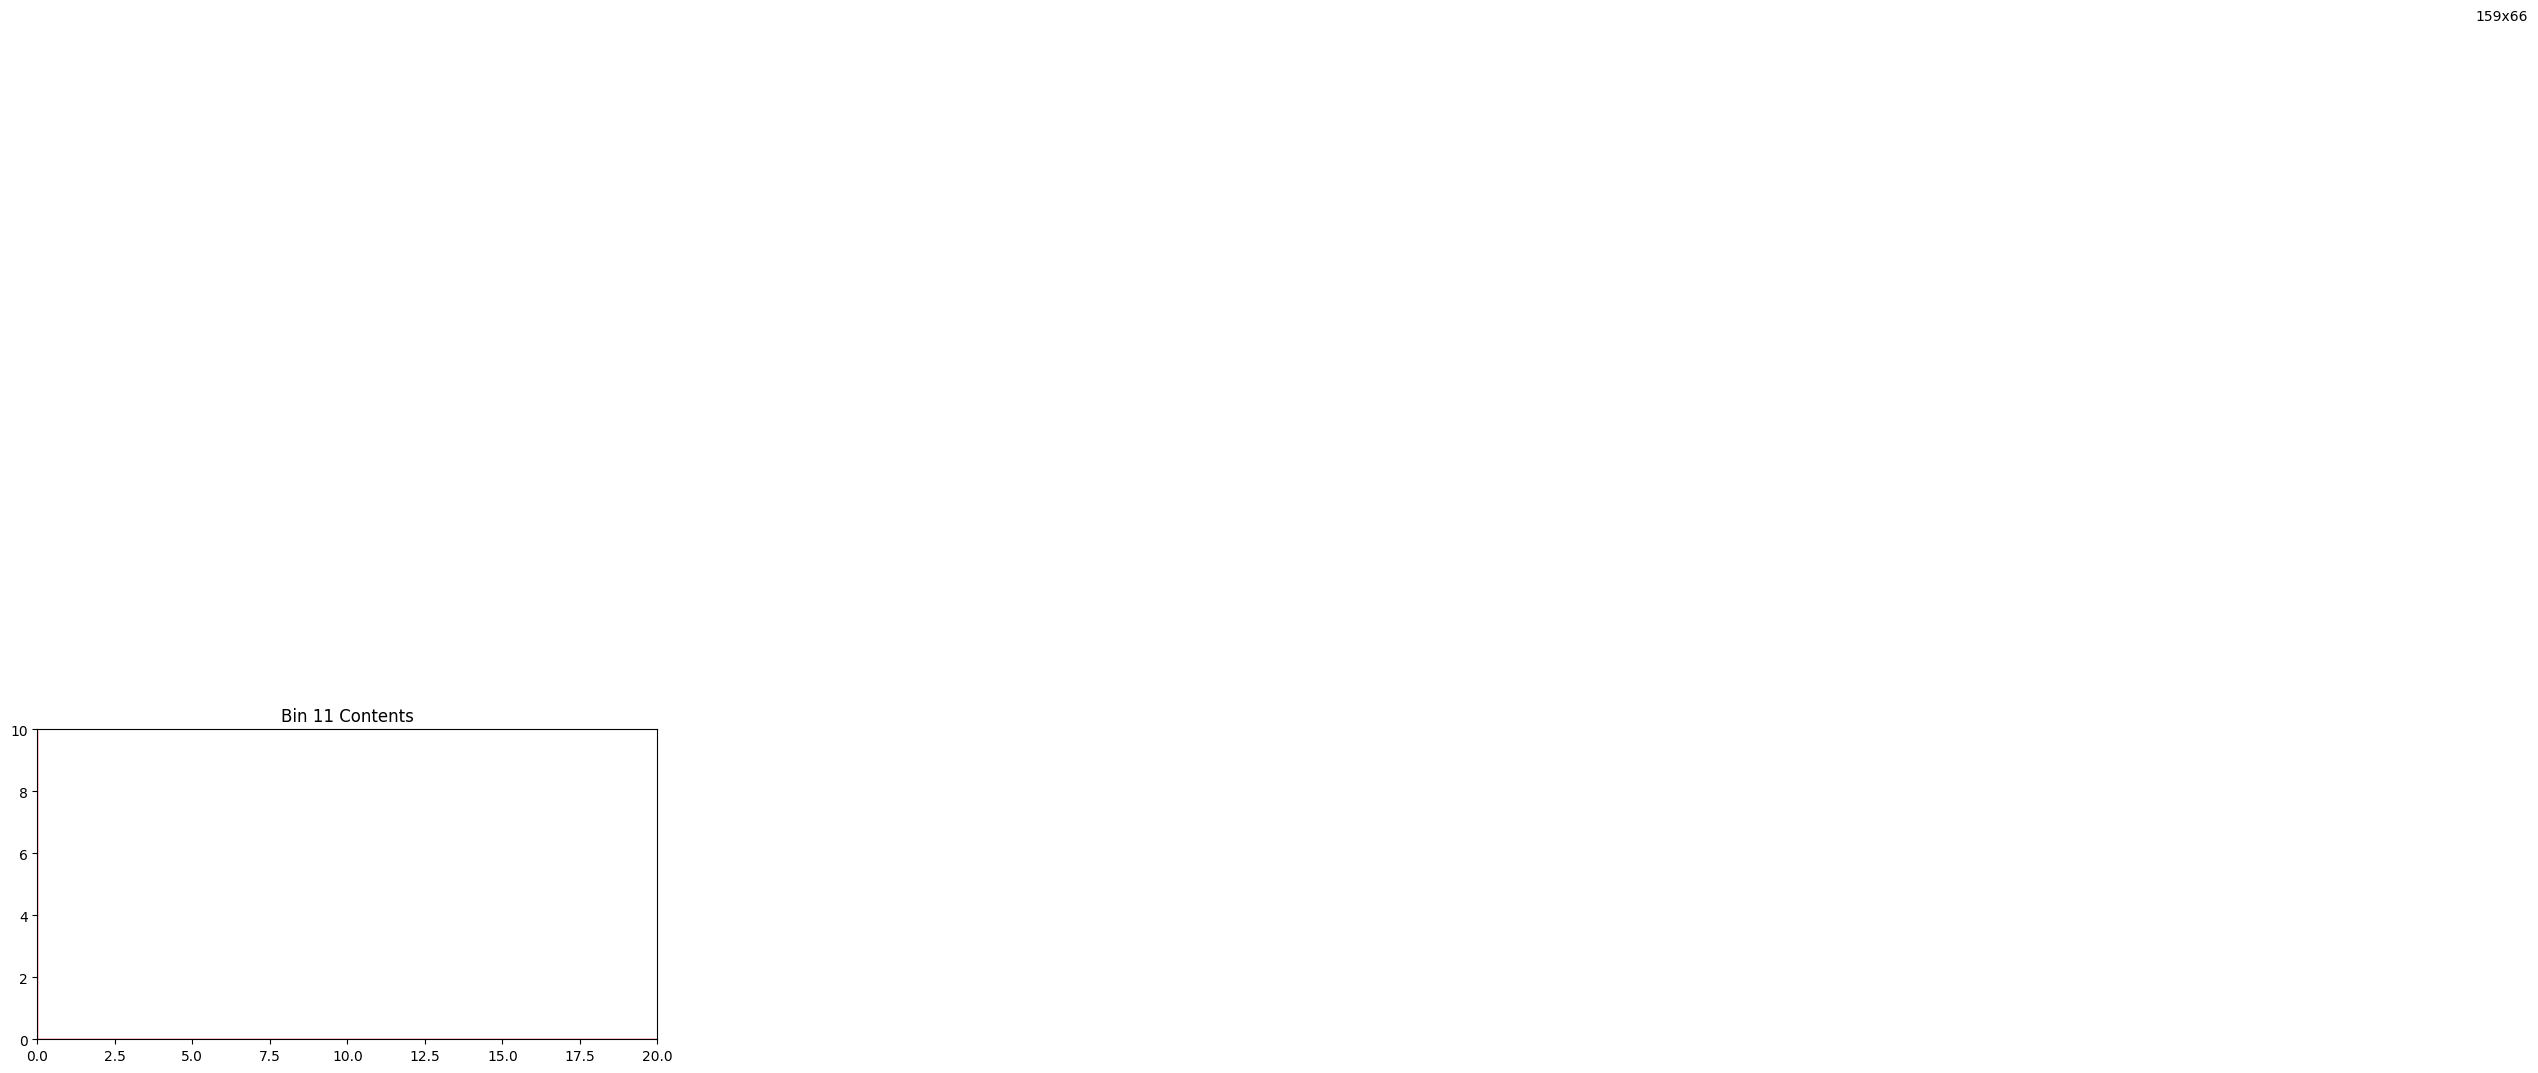

Bin 11 has -10294.00 units of area left


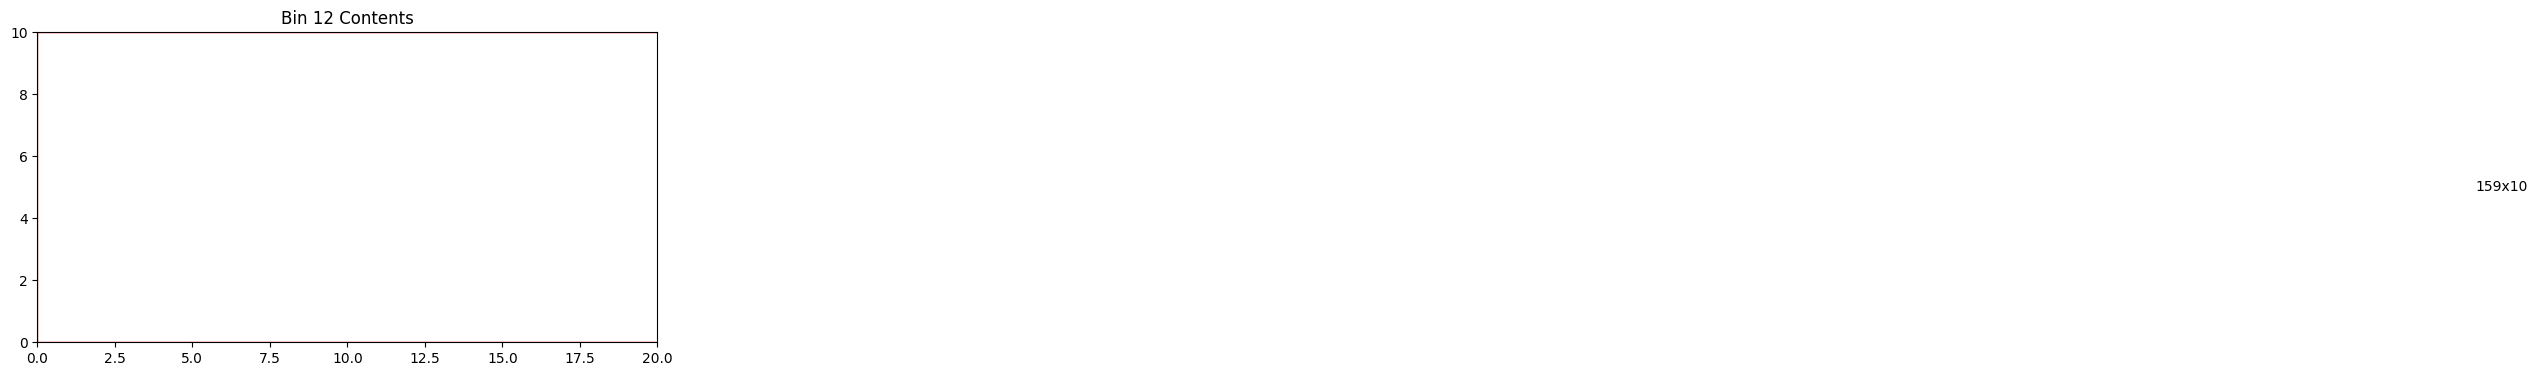

Bin 12 has -1390.00 units of area left


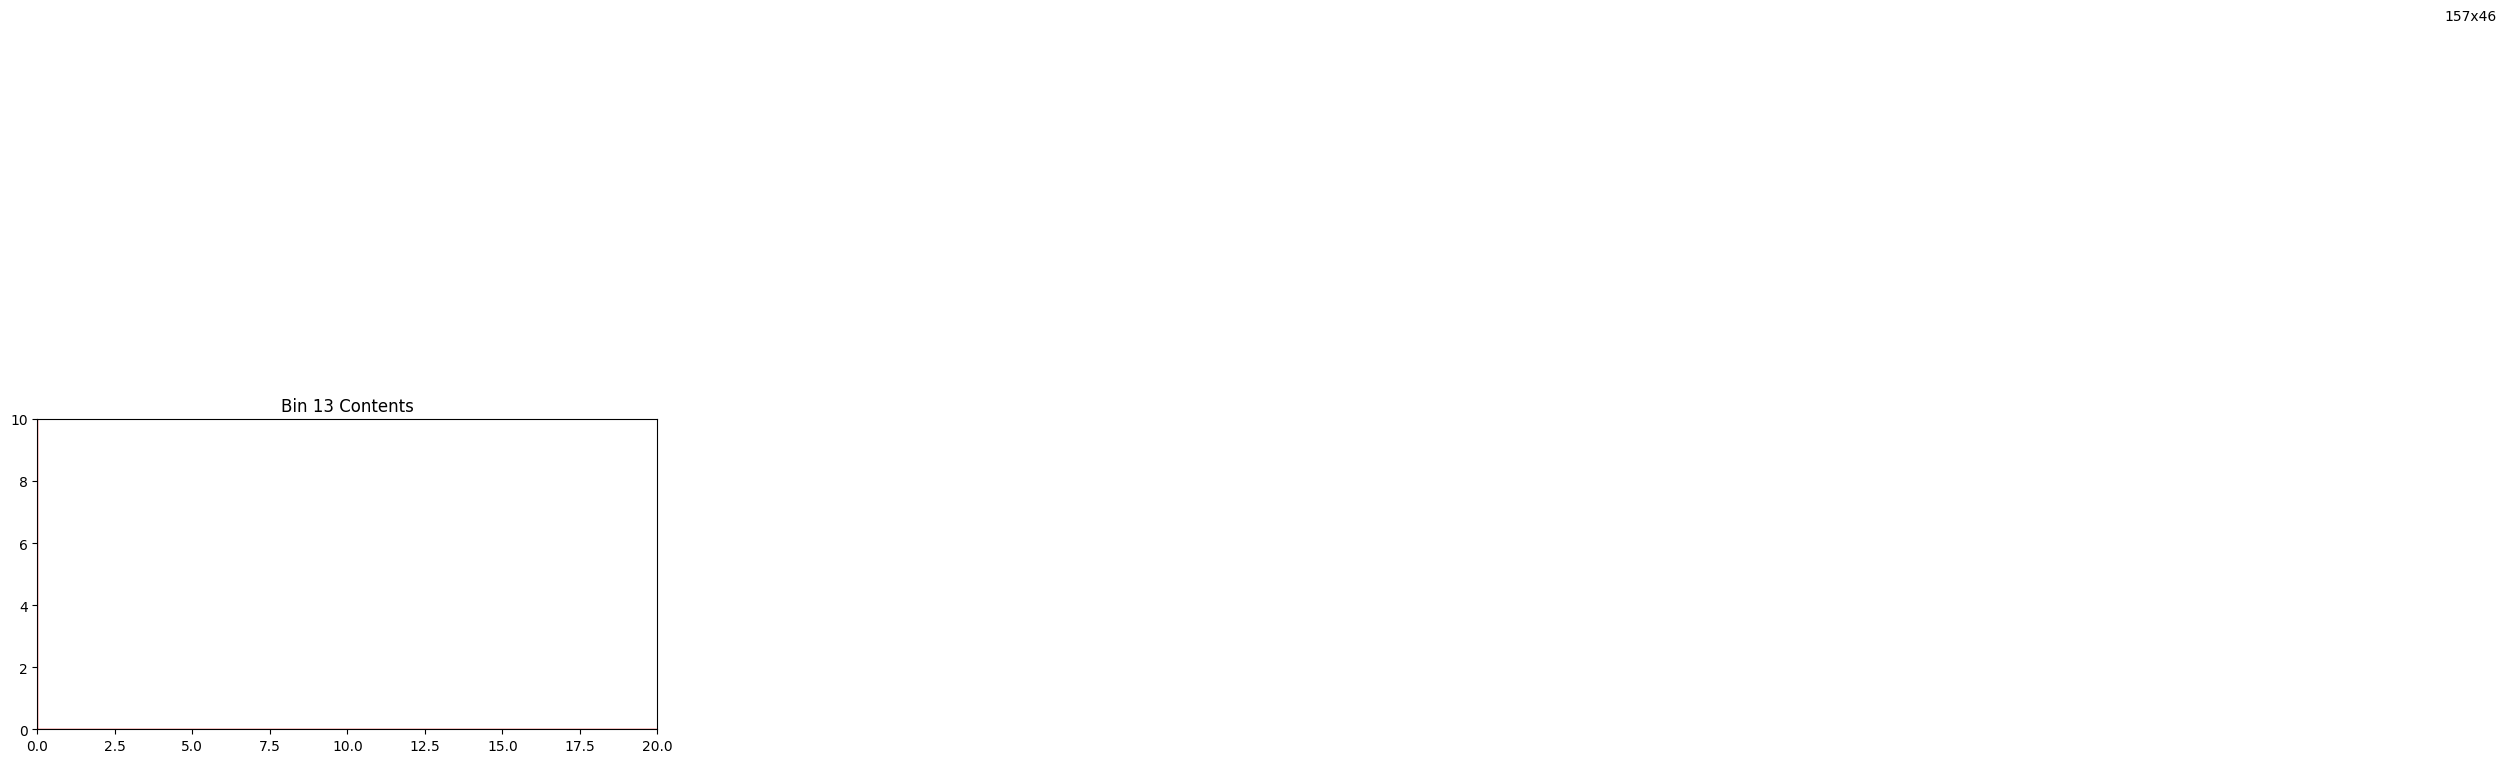

Bin 13 has -7022.00 units of area left


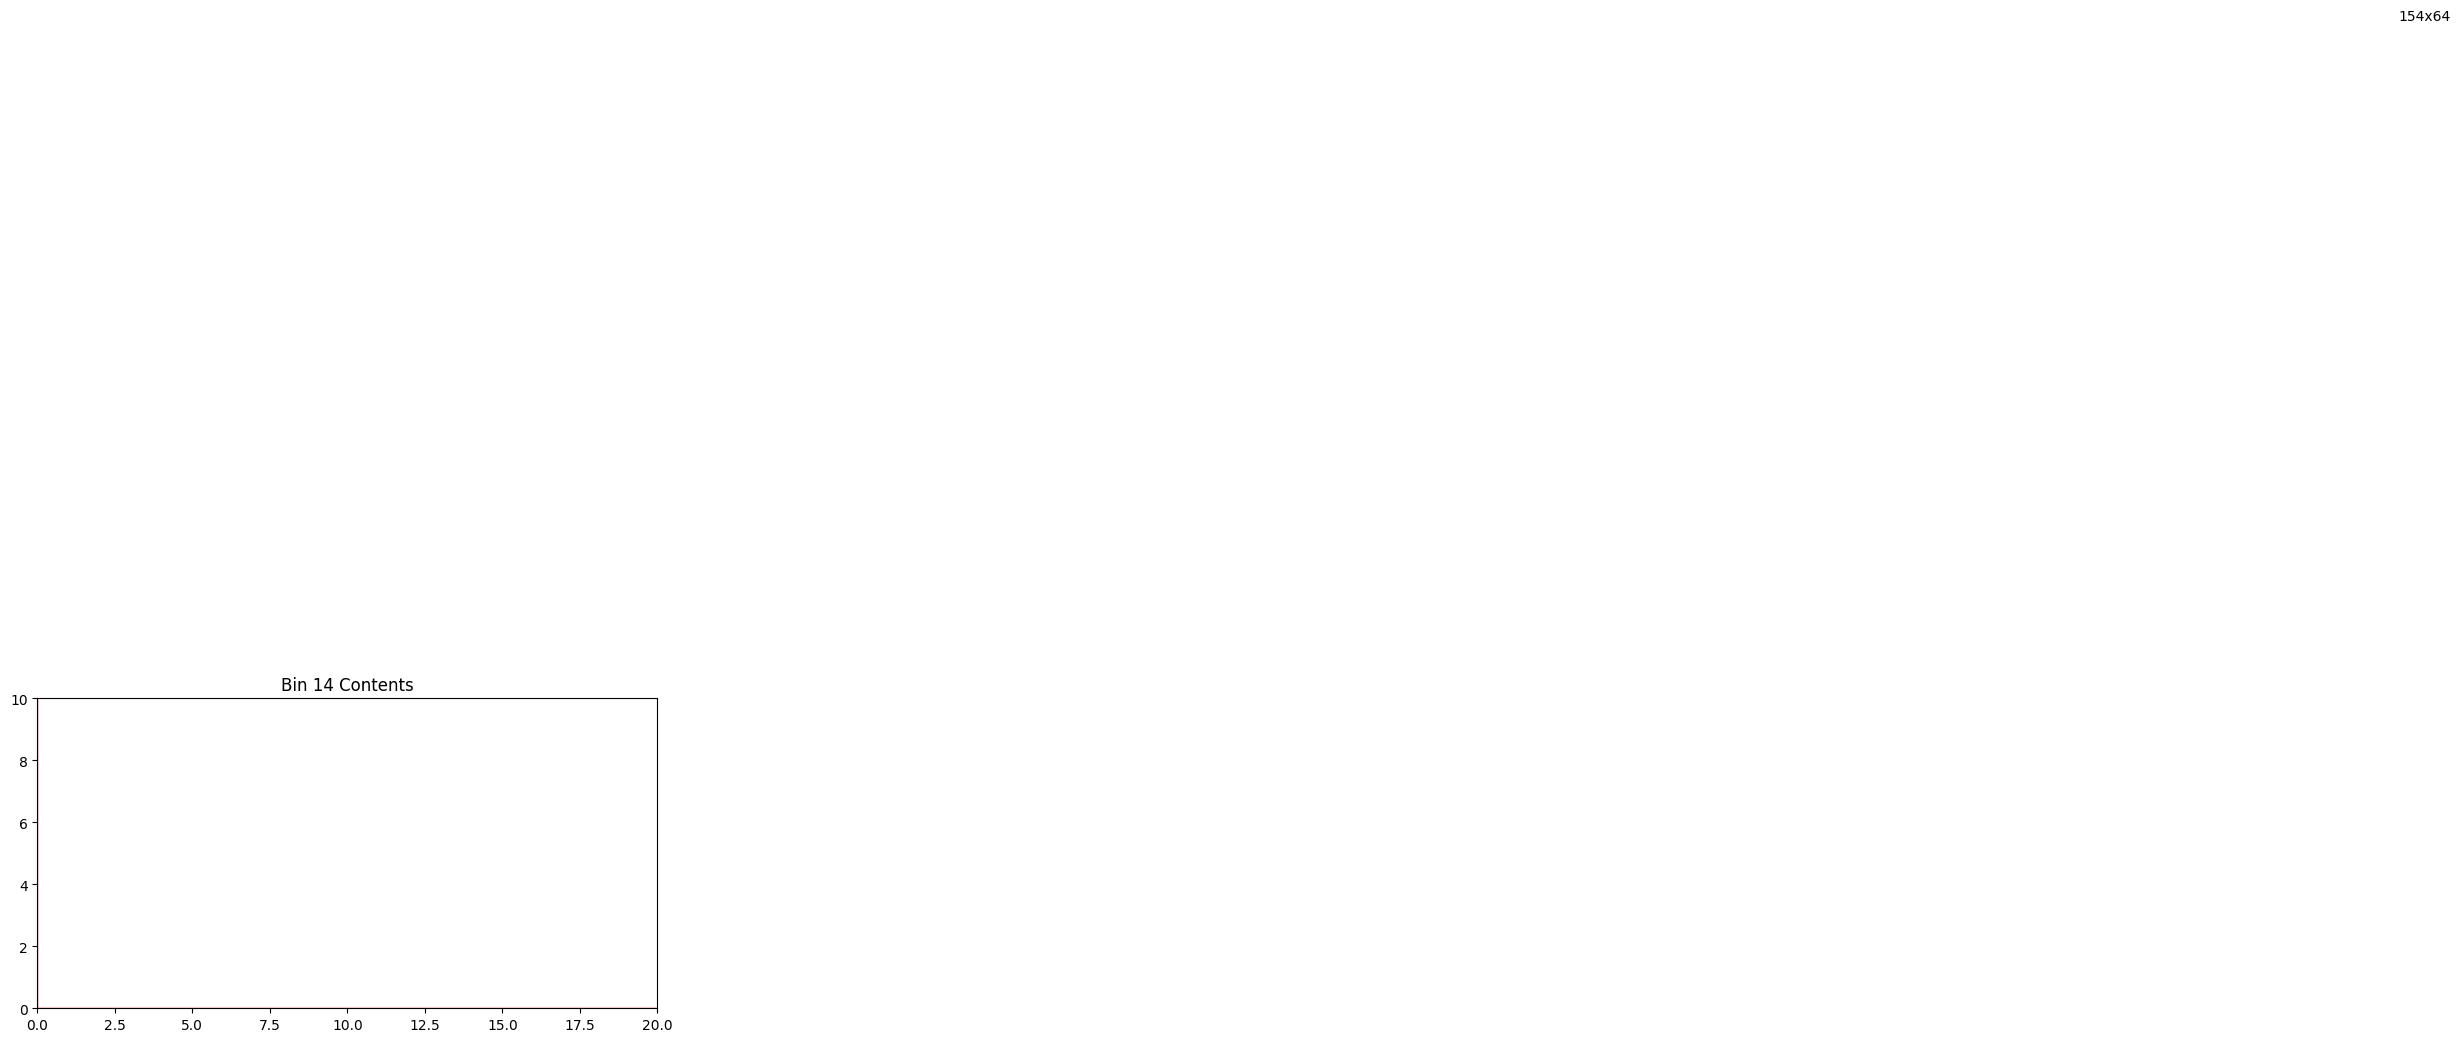

Bin 14 has -9656.00 units of area left


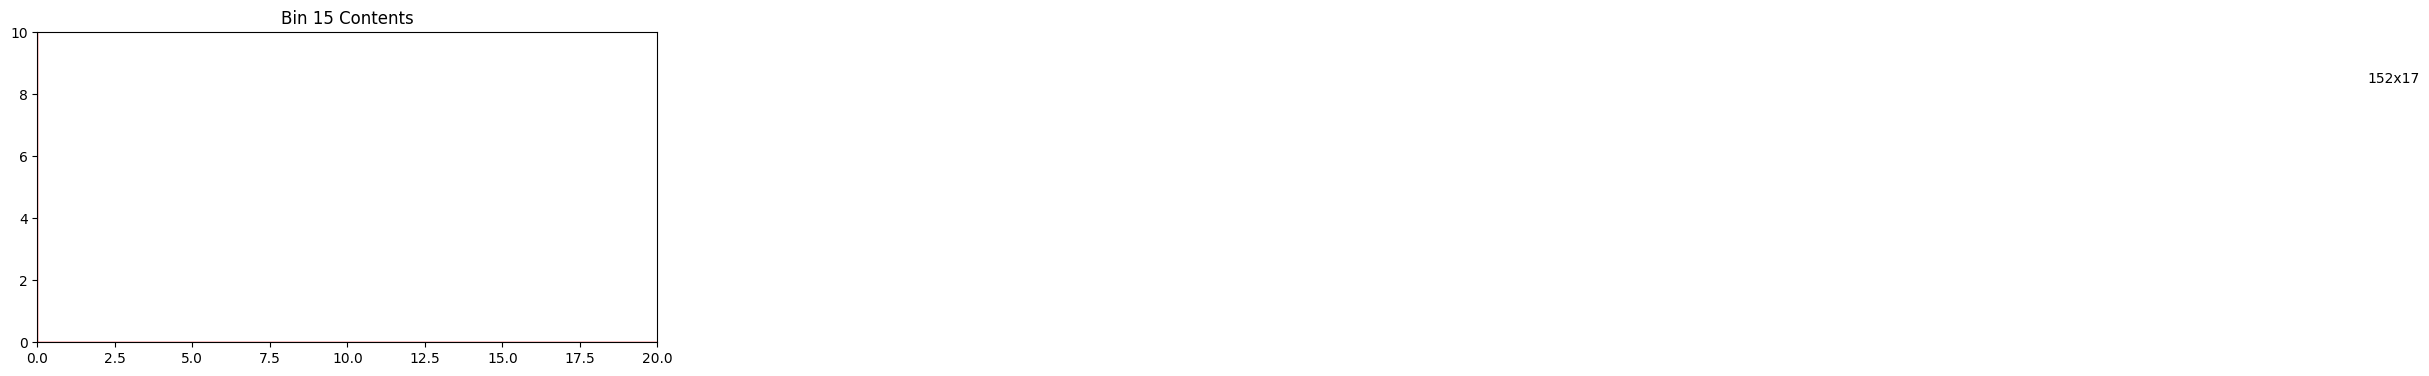

Bin 15 has -2384.00 units of area left


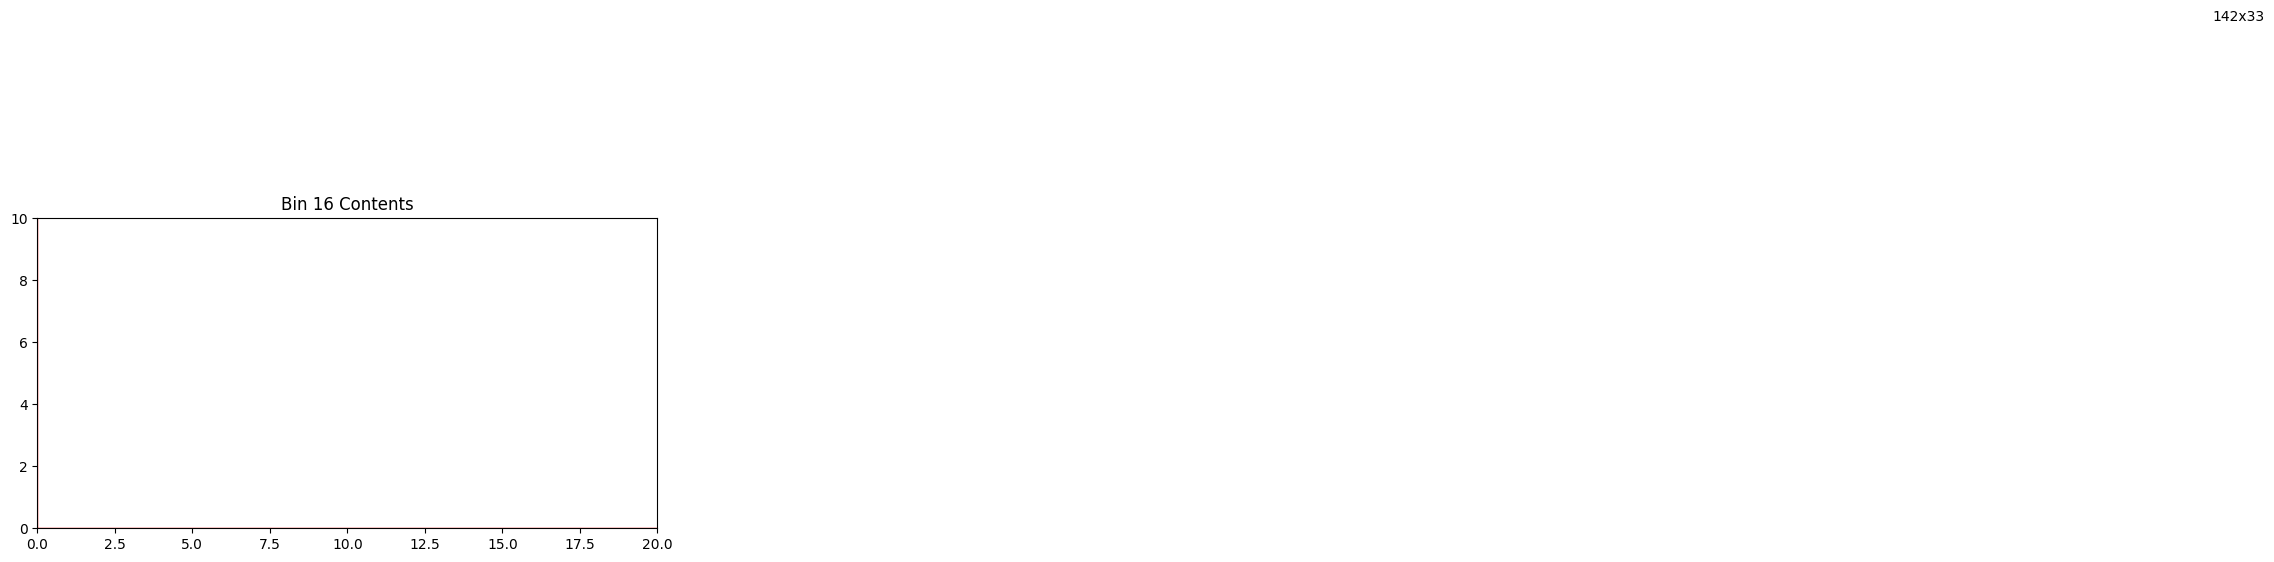

Bin 16 has -4486.00 units of area left


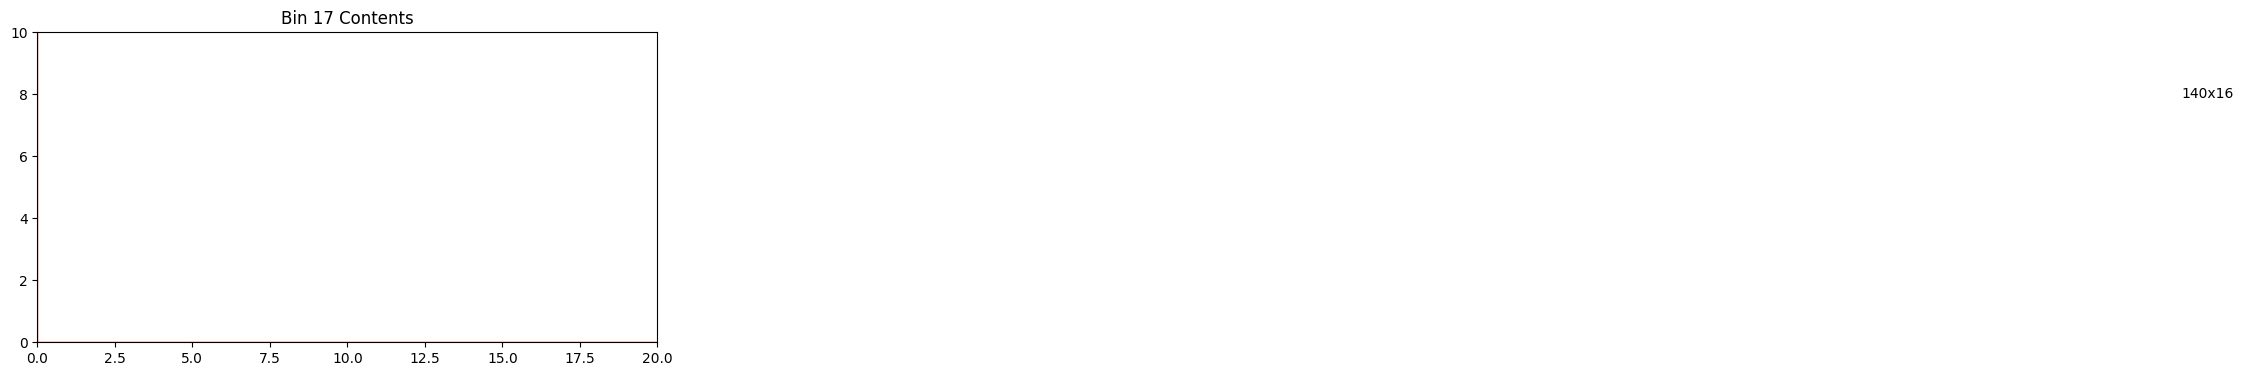

Bin 17 has -2040.00 units of area left


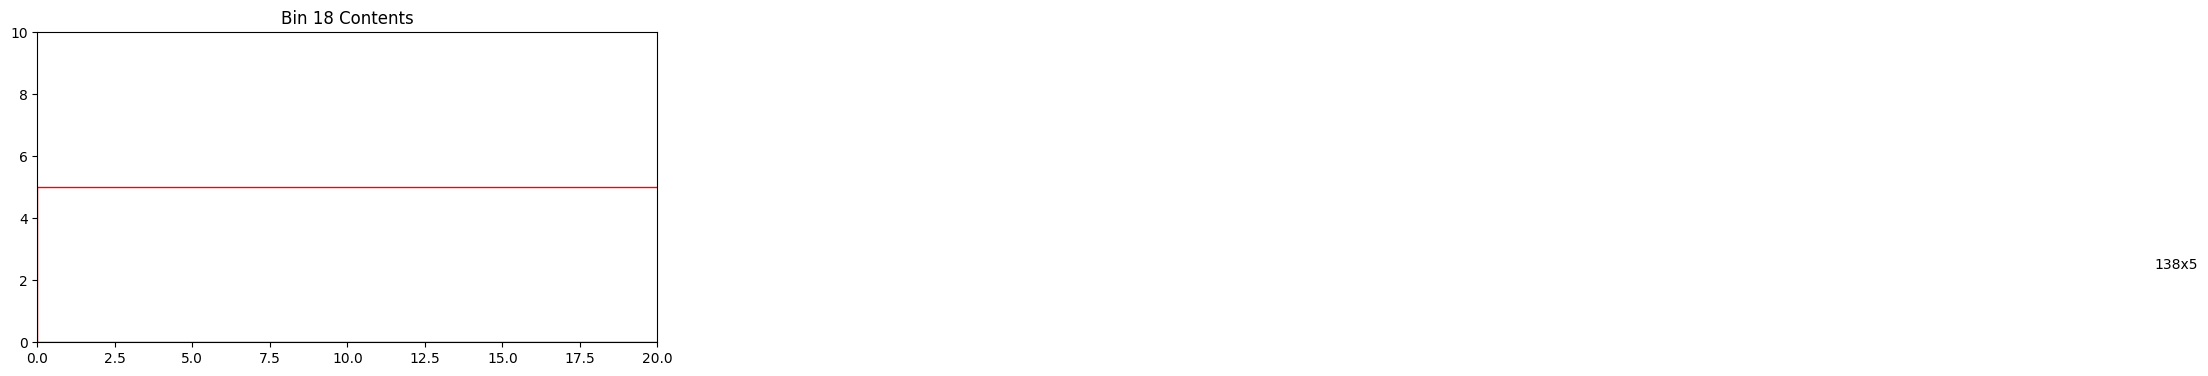

Bin 18 has -490.00 units of area left


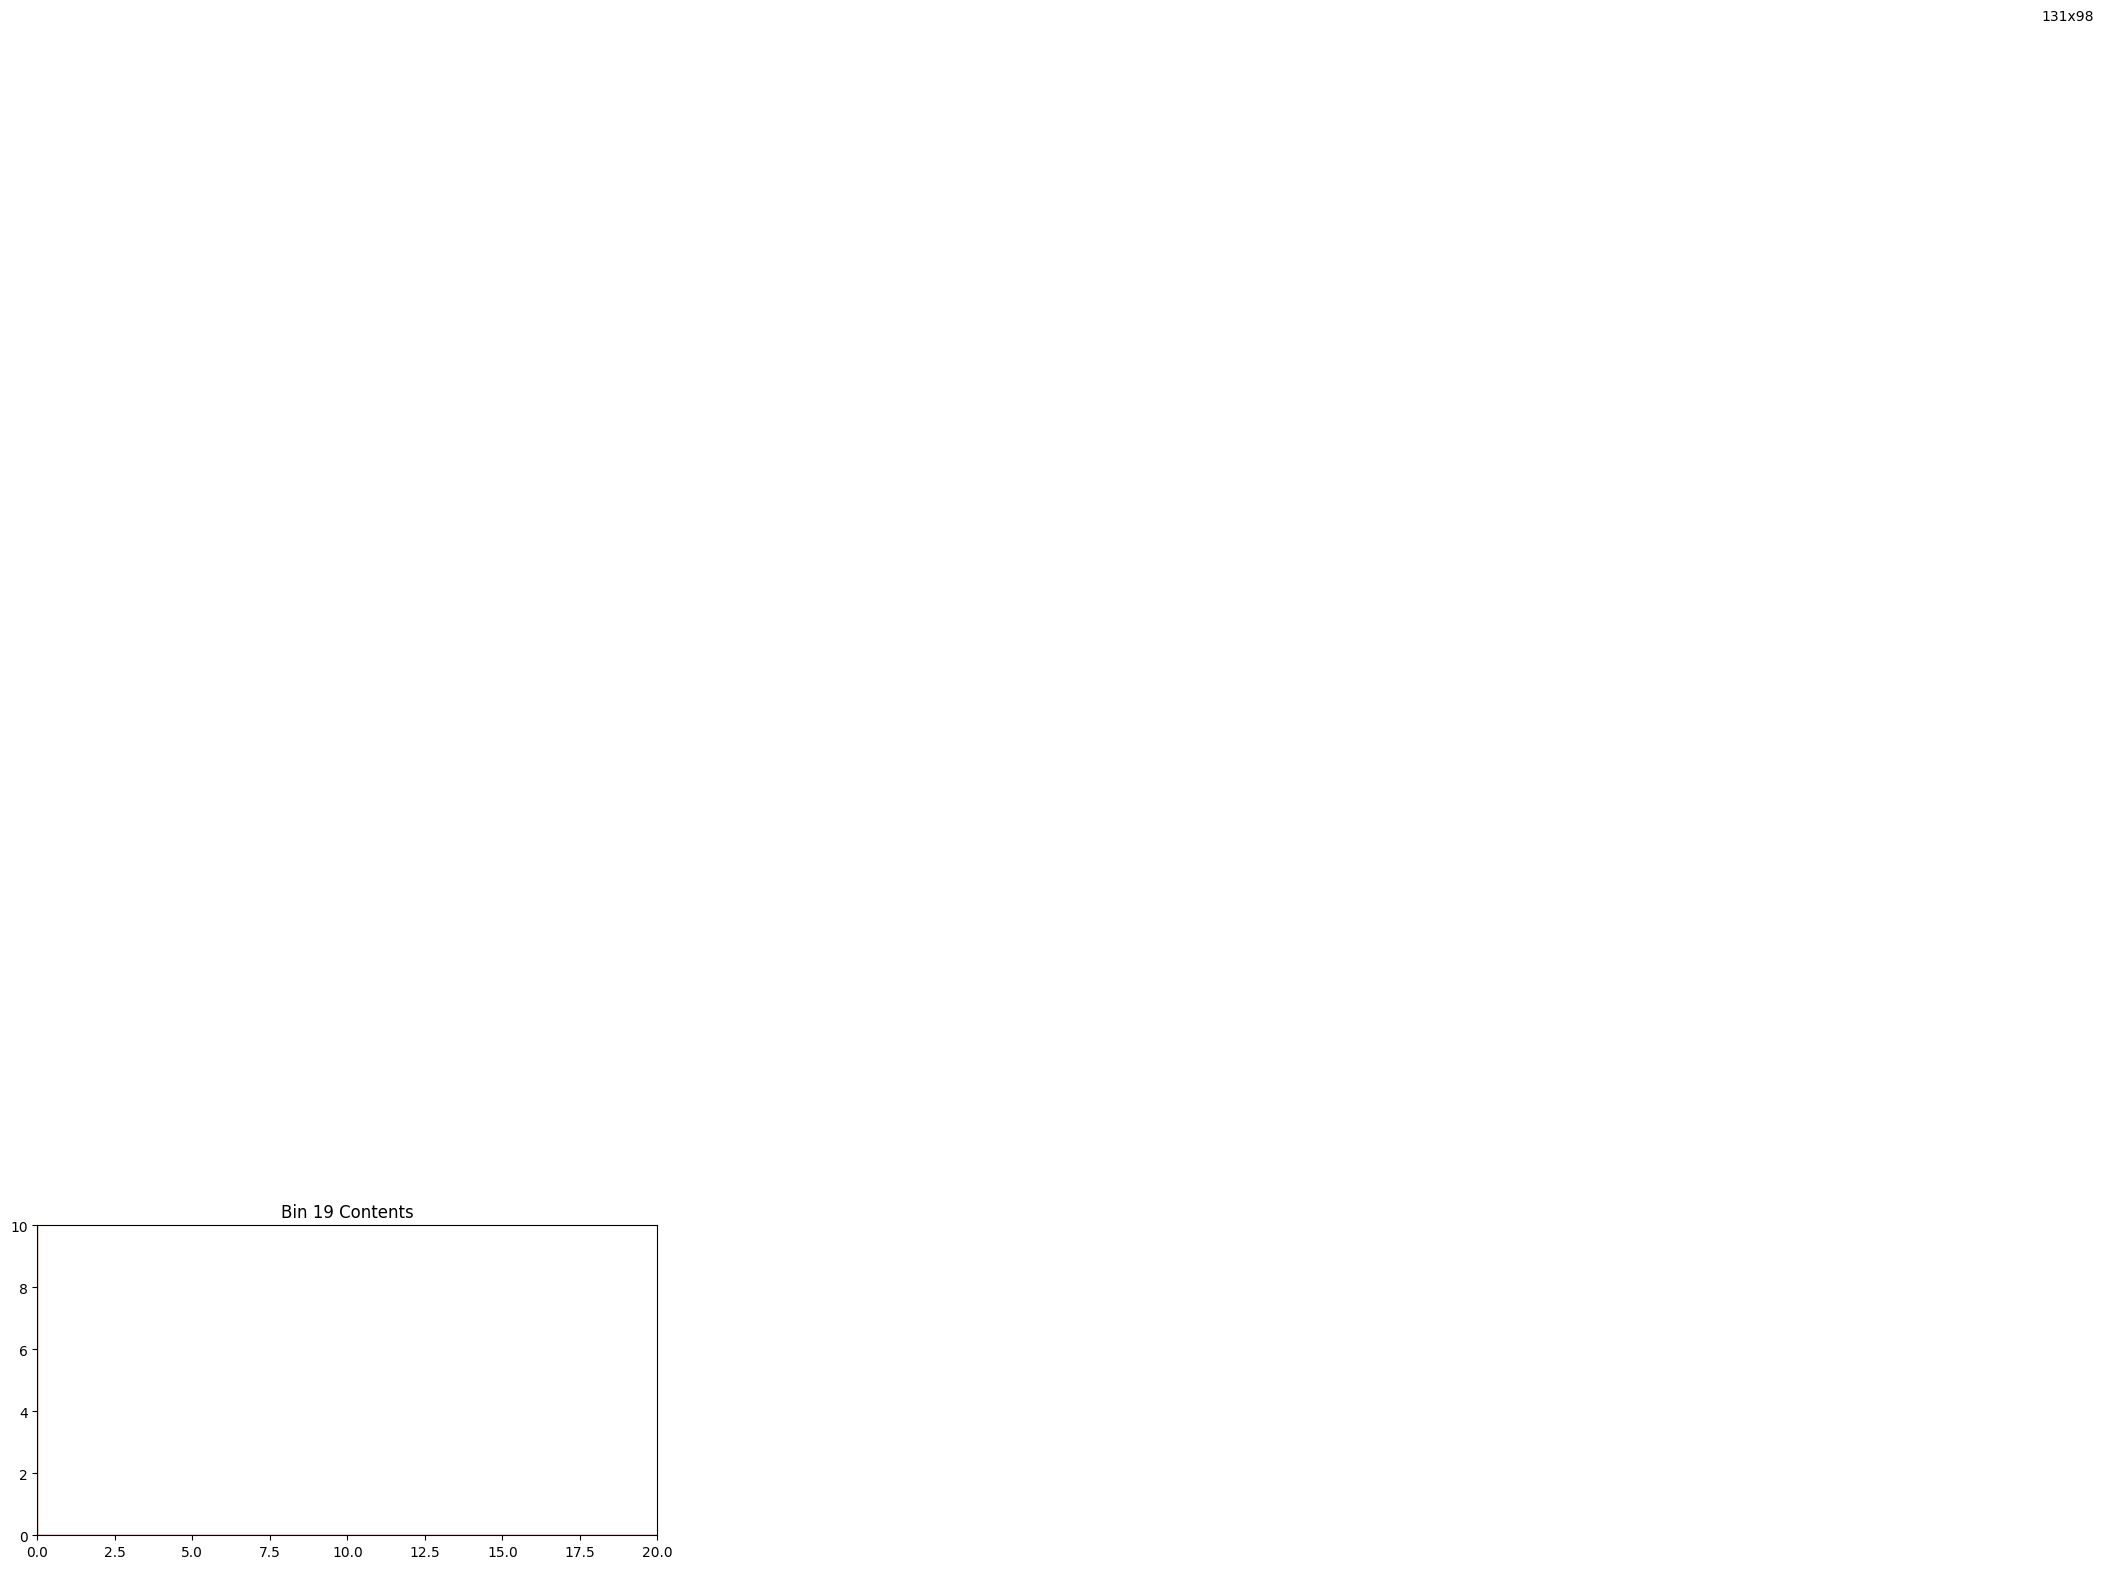

Bin 19 has -12638.00 units of area left


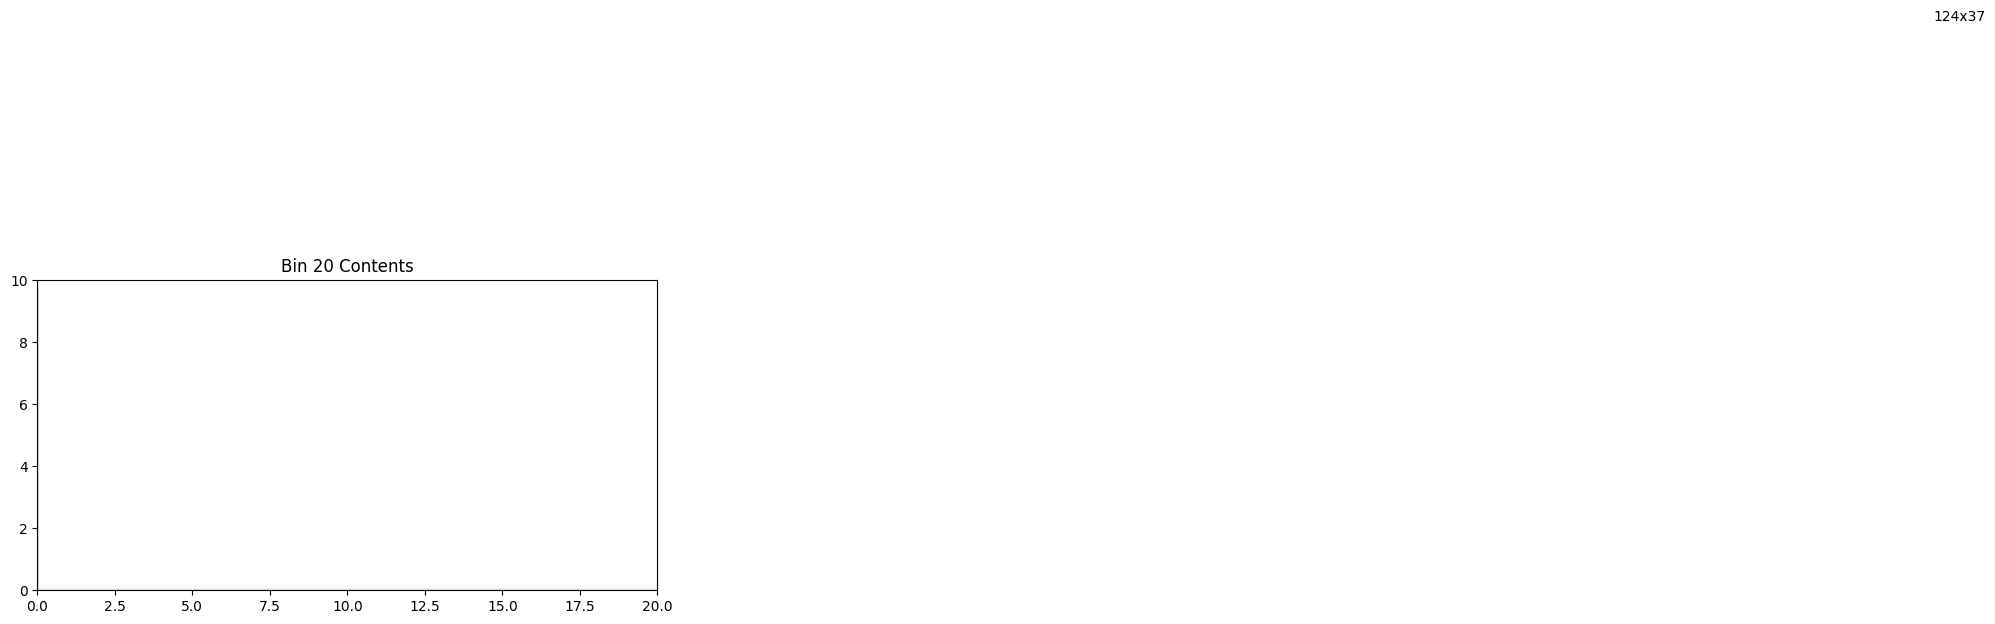

Bin 20 has -4388.00 units of area left


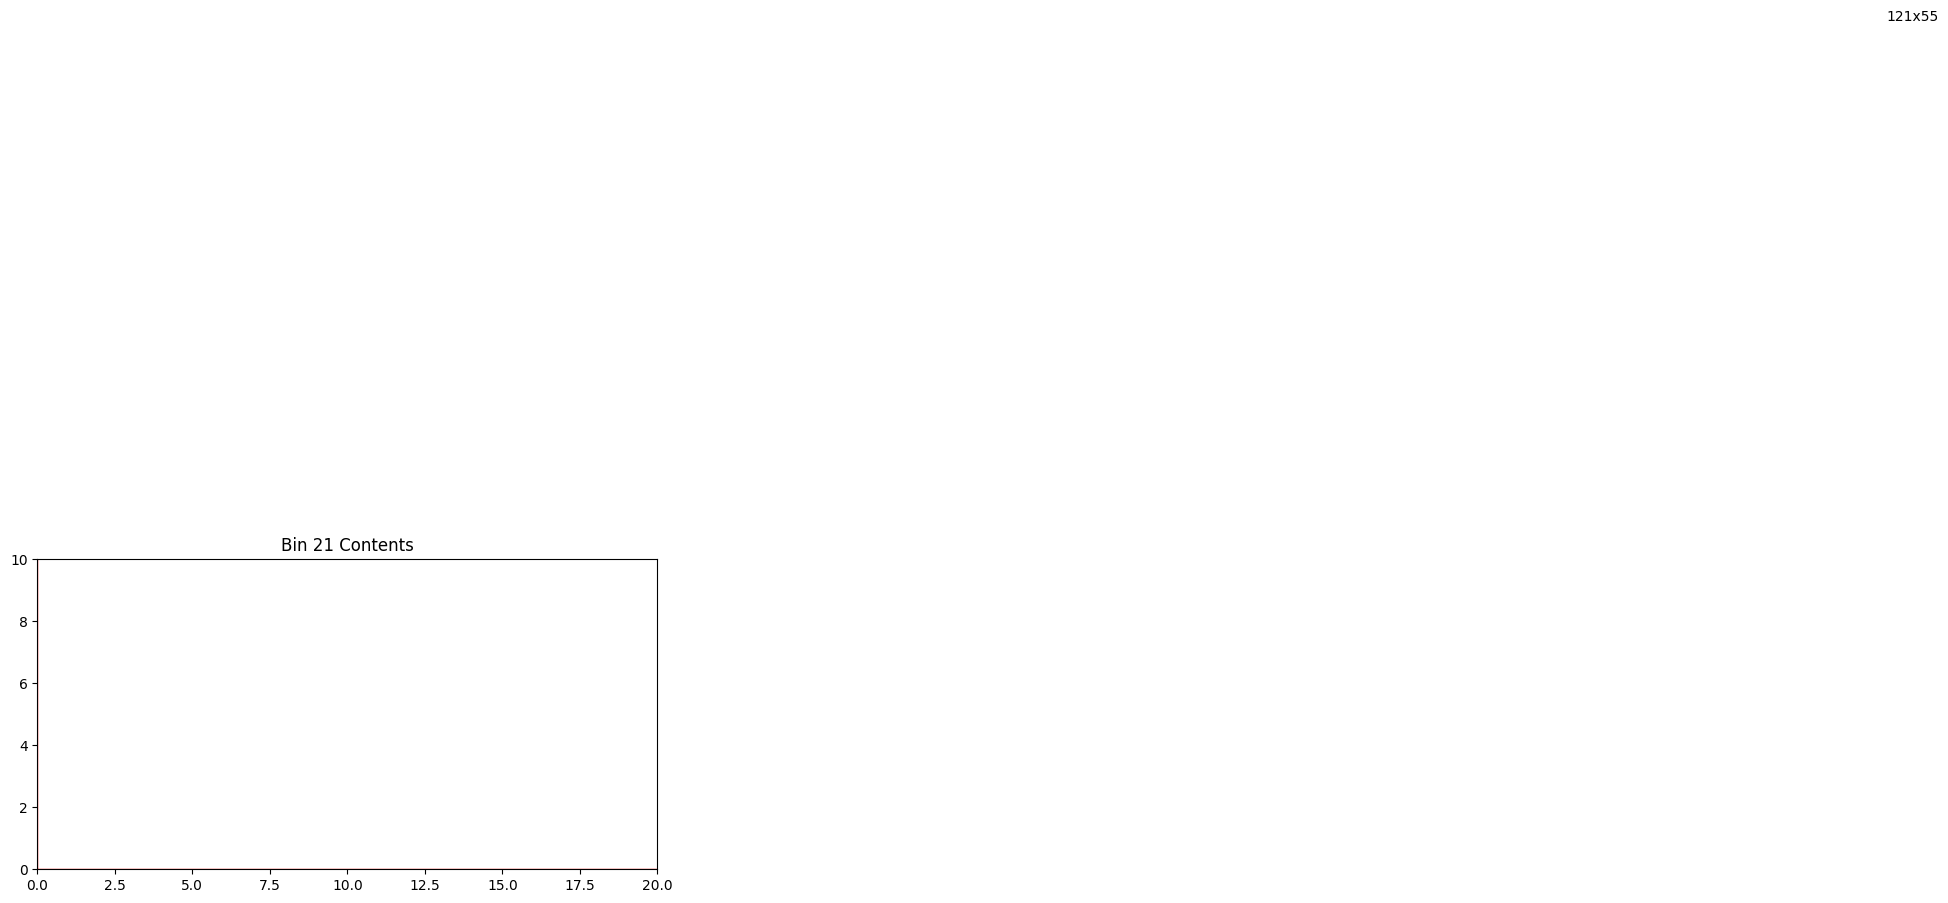

Bin 21 has -6455.00 units of area left


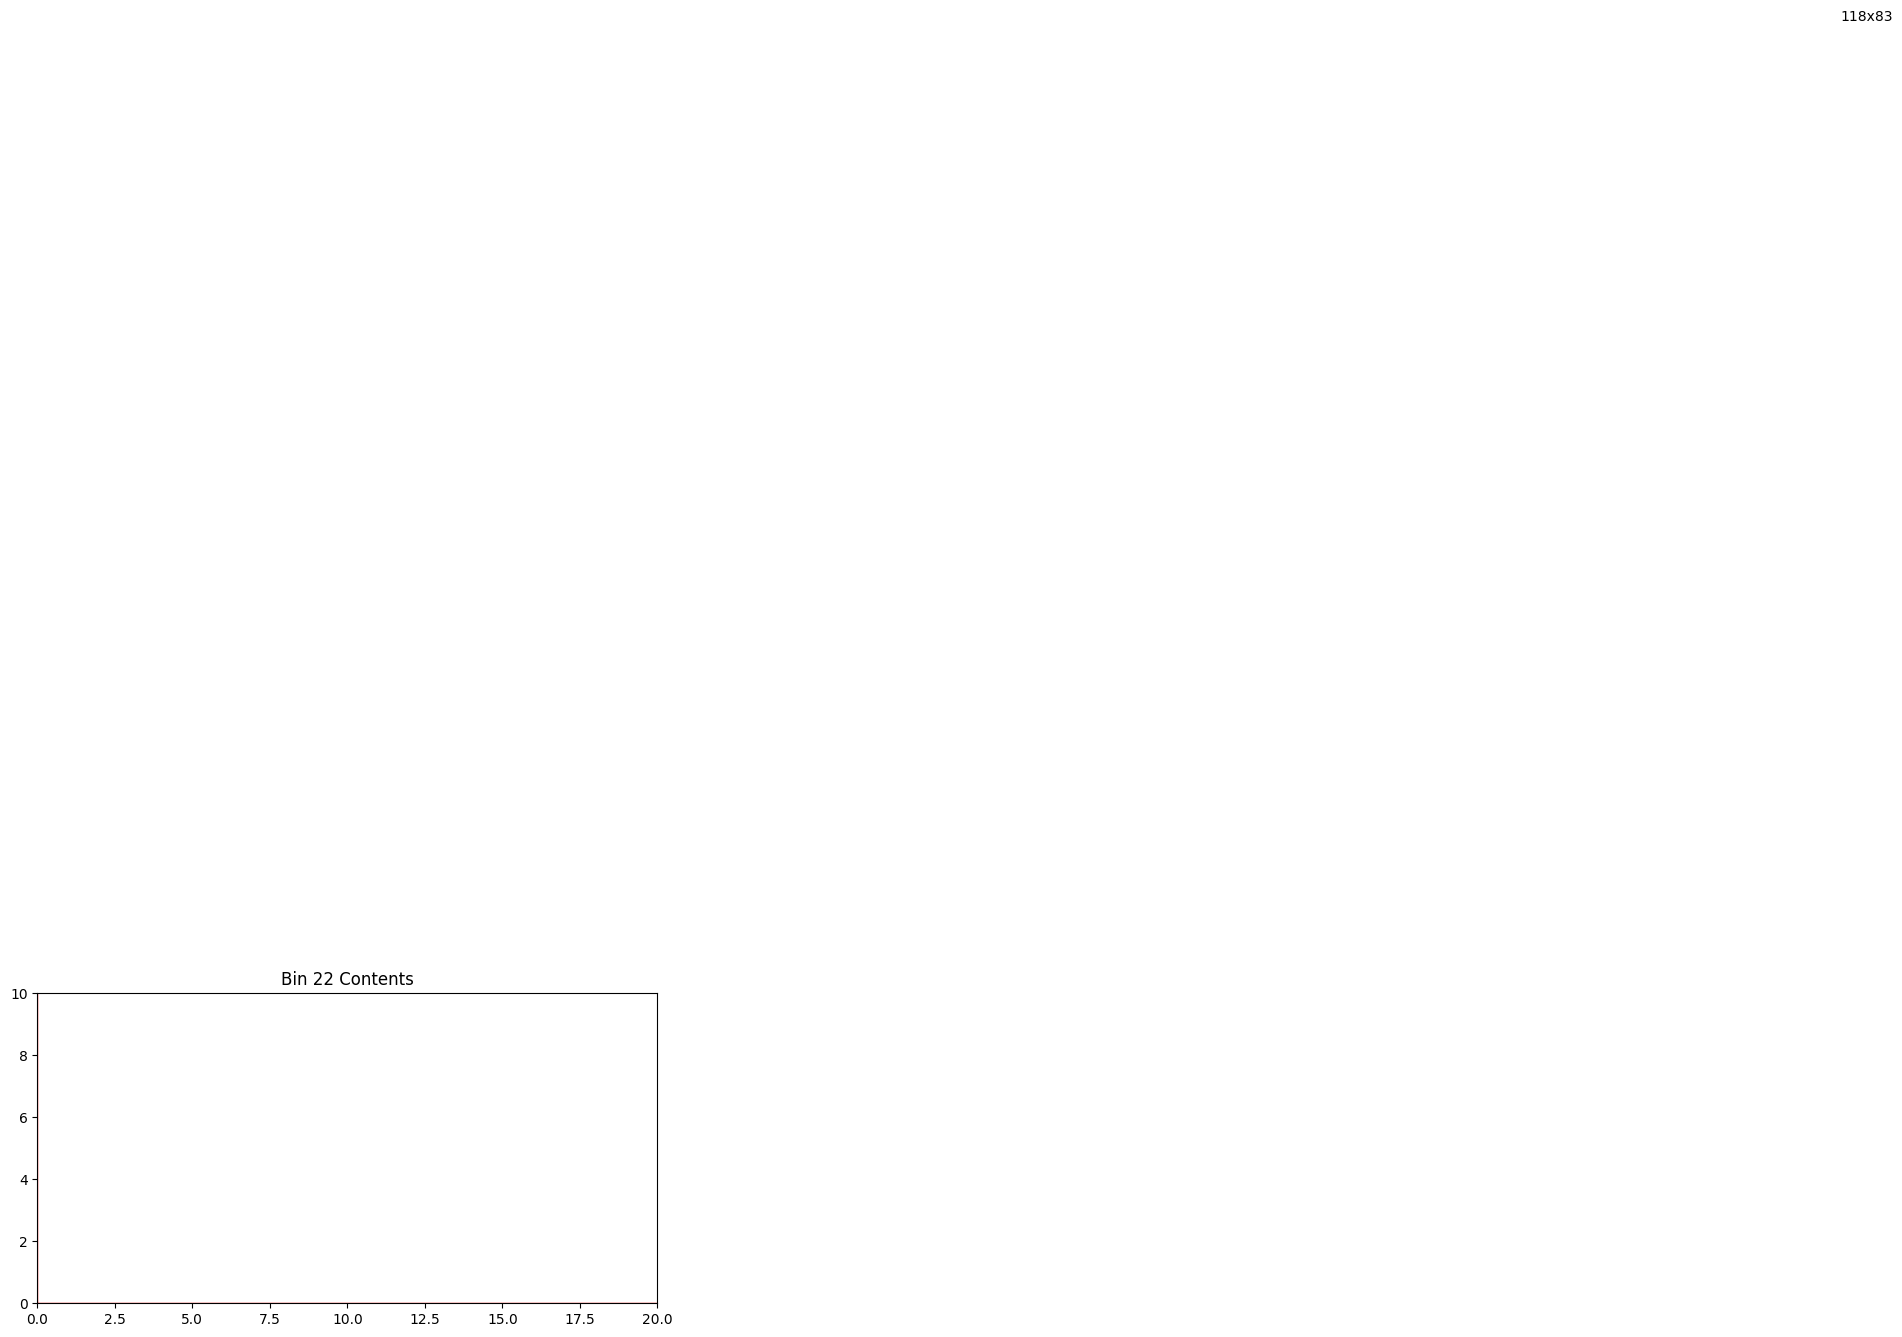

Bin 22 has -9594.00 units of area left


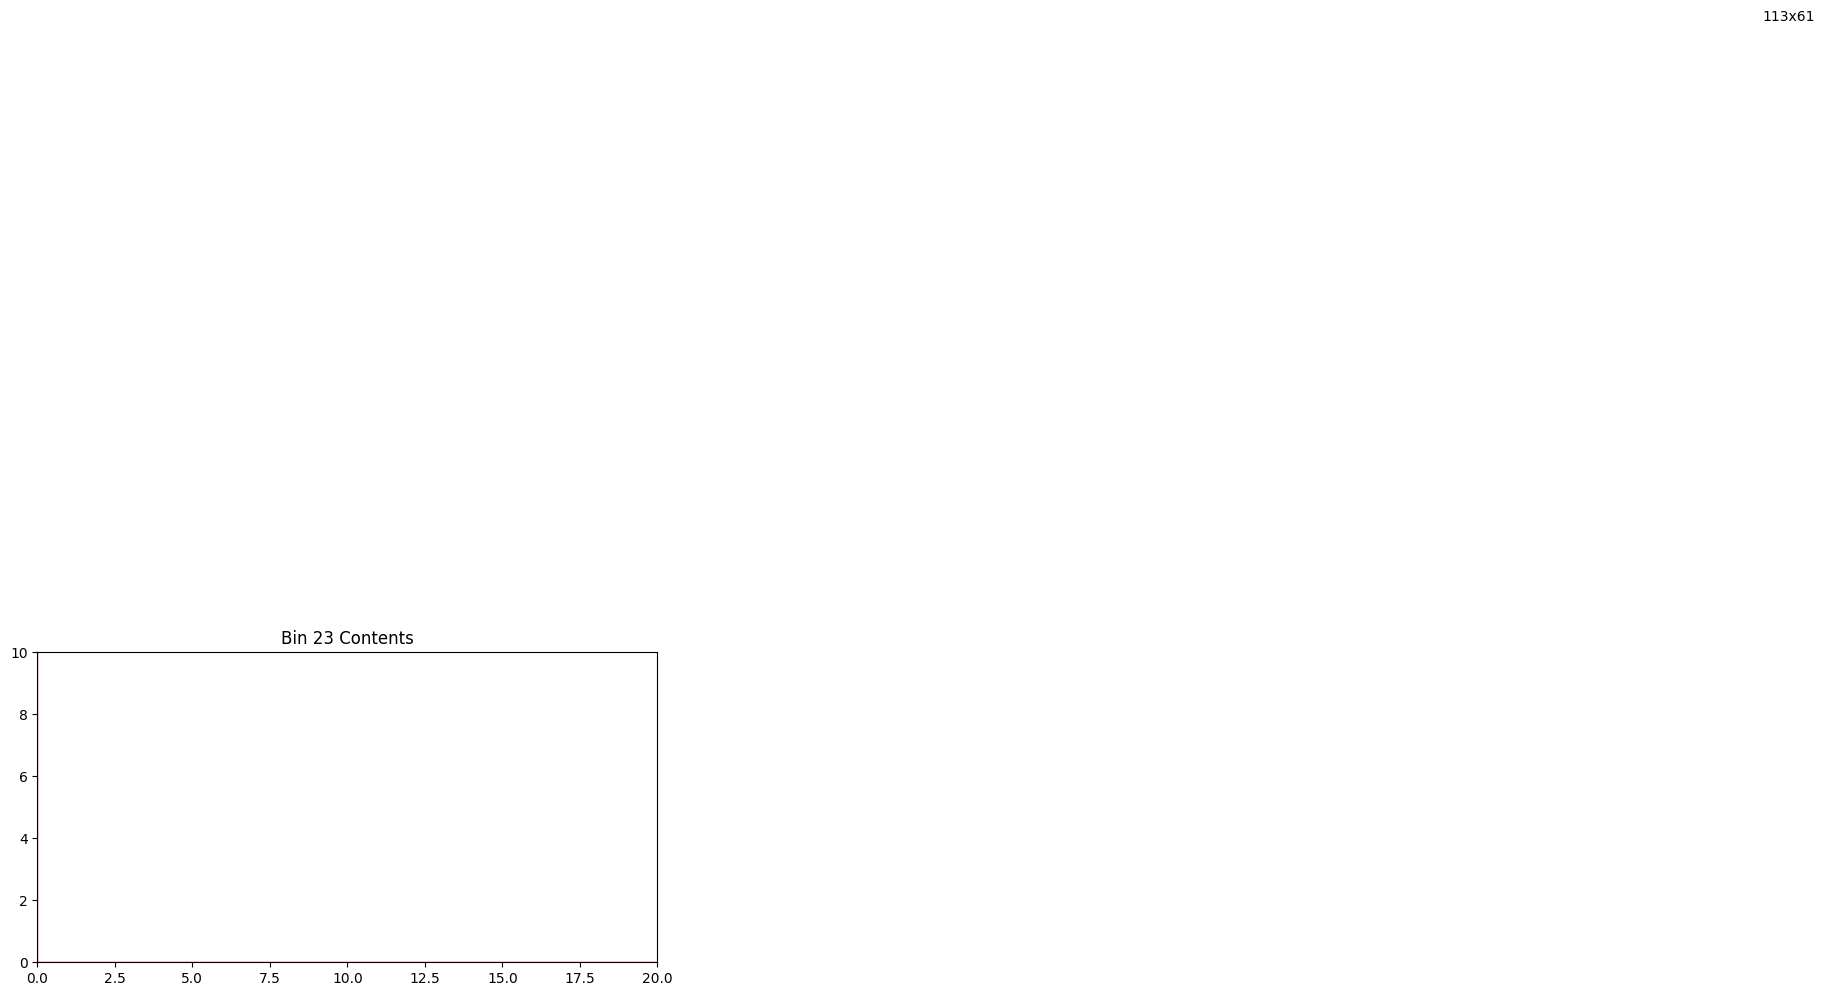

Bin 23 has -6693.00 units of area left


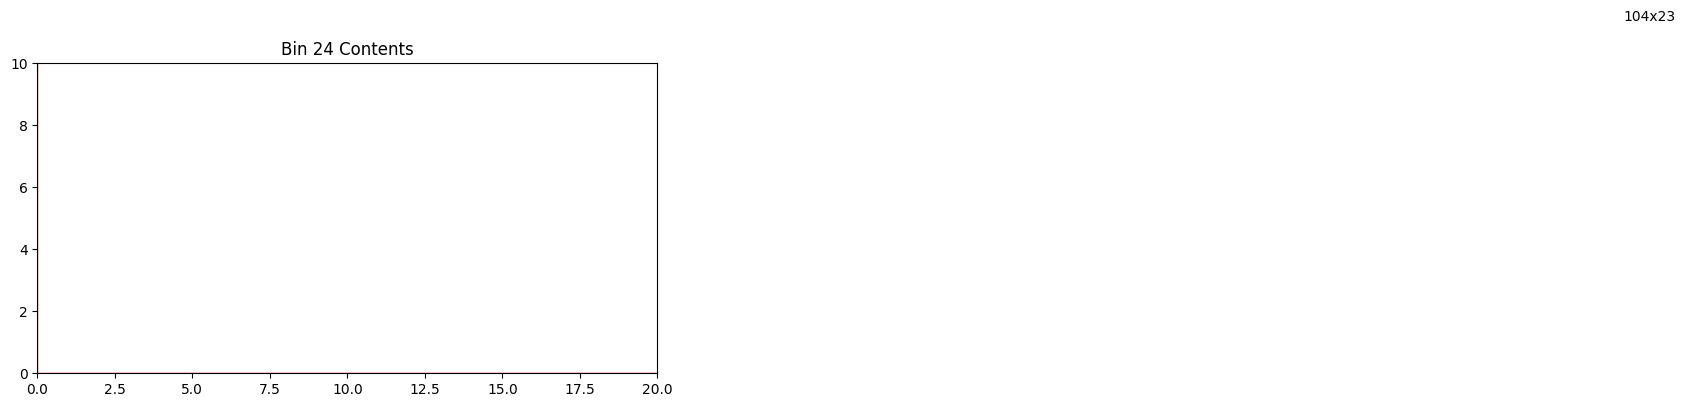

Bin 24 has -2192.00 units of area left


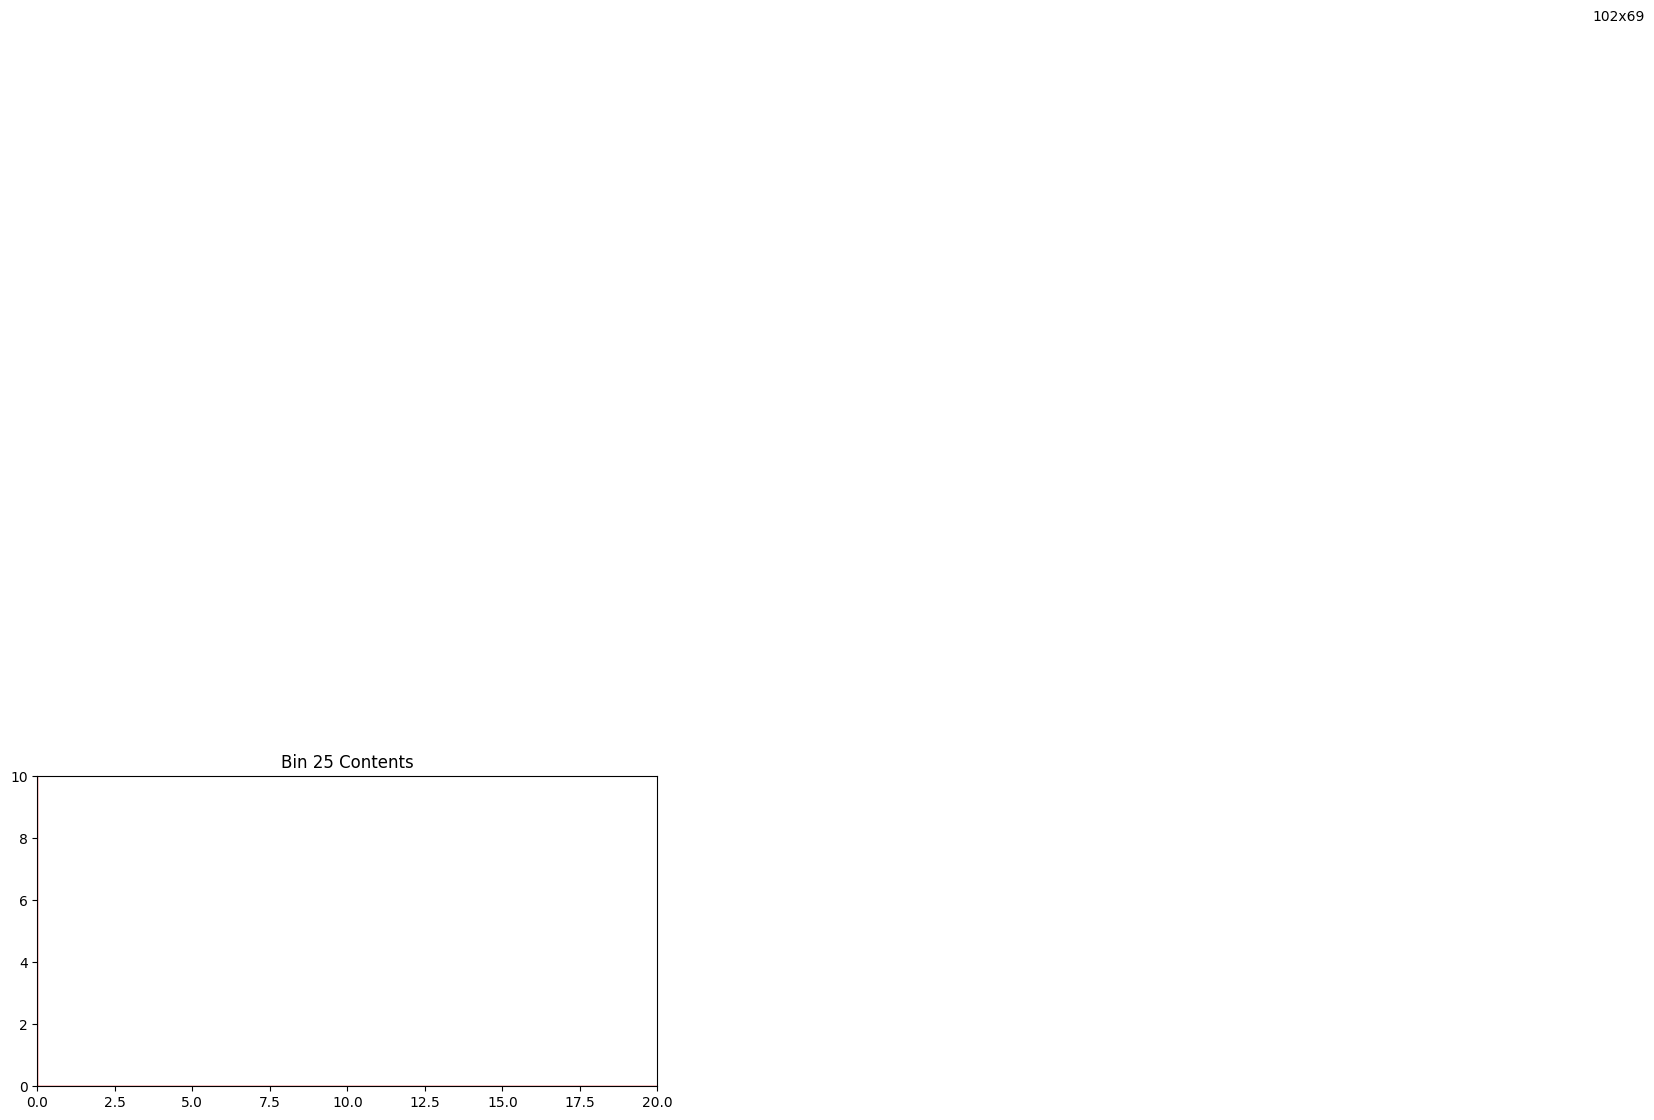

Bin 25 has -6838.00 units of area left


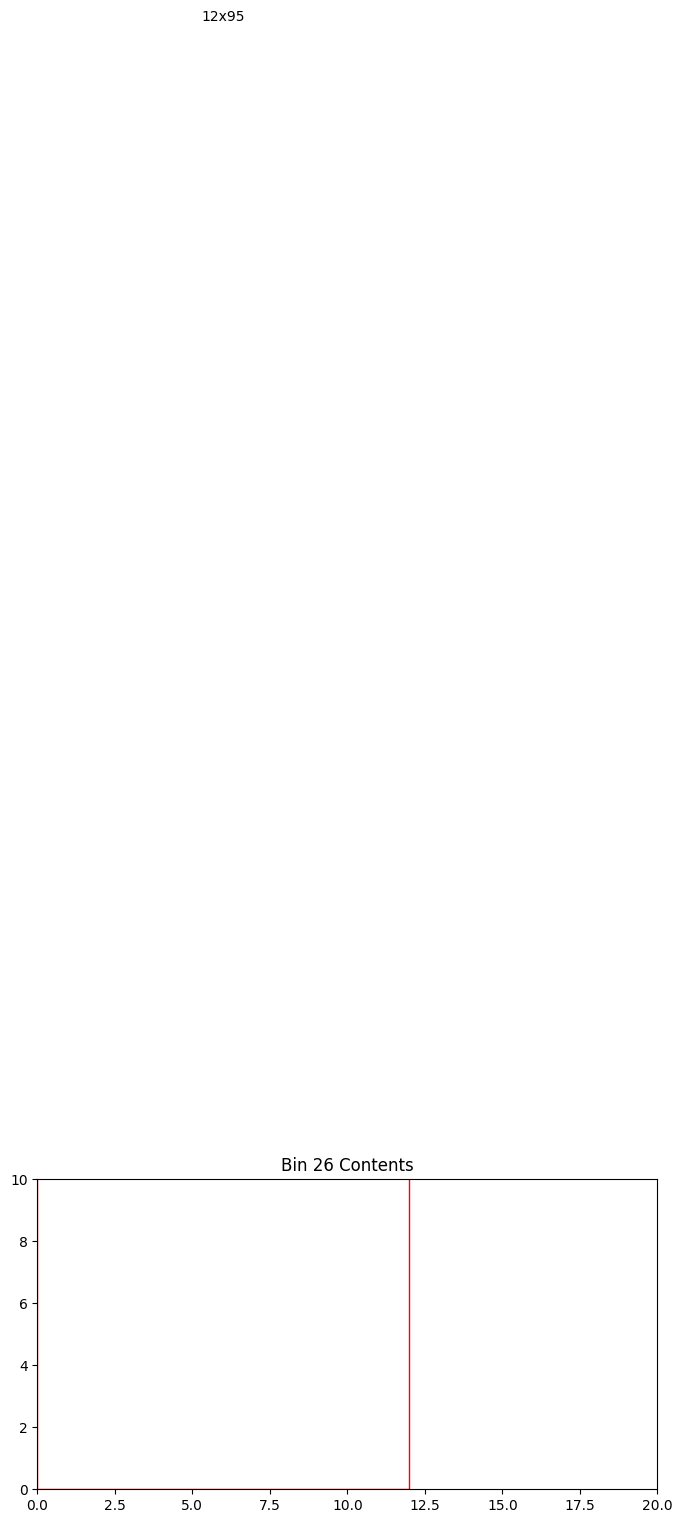

Bin 26 has -940.00 units of area left


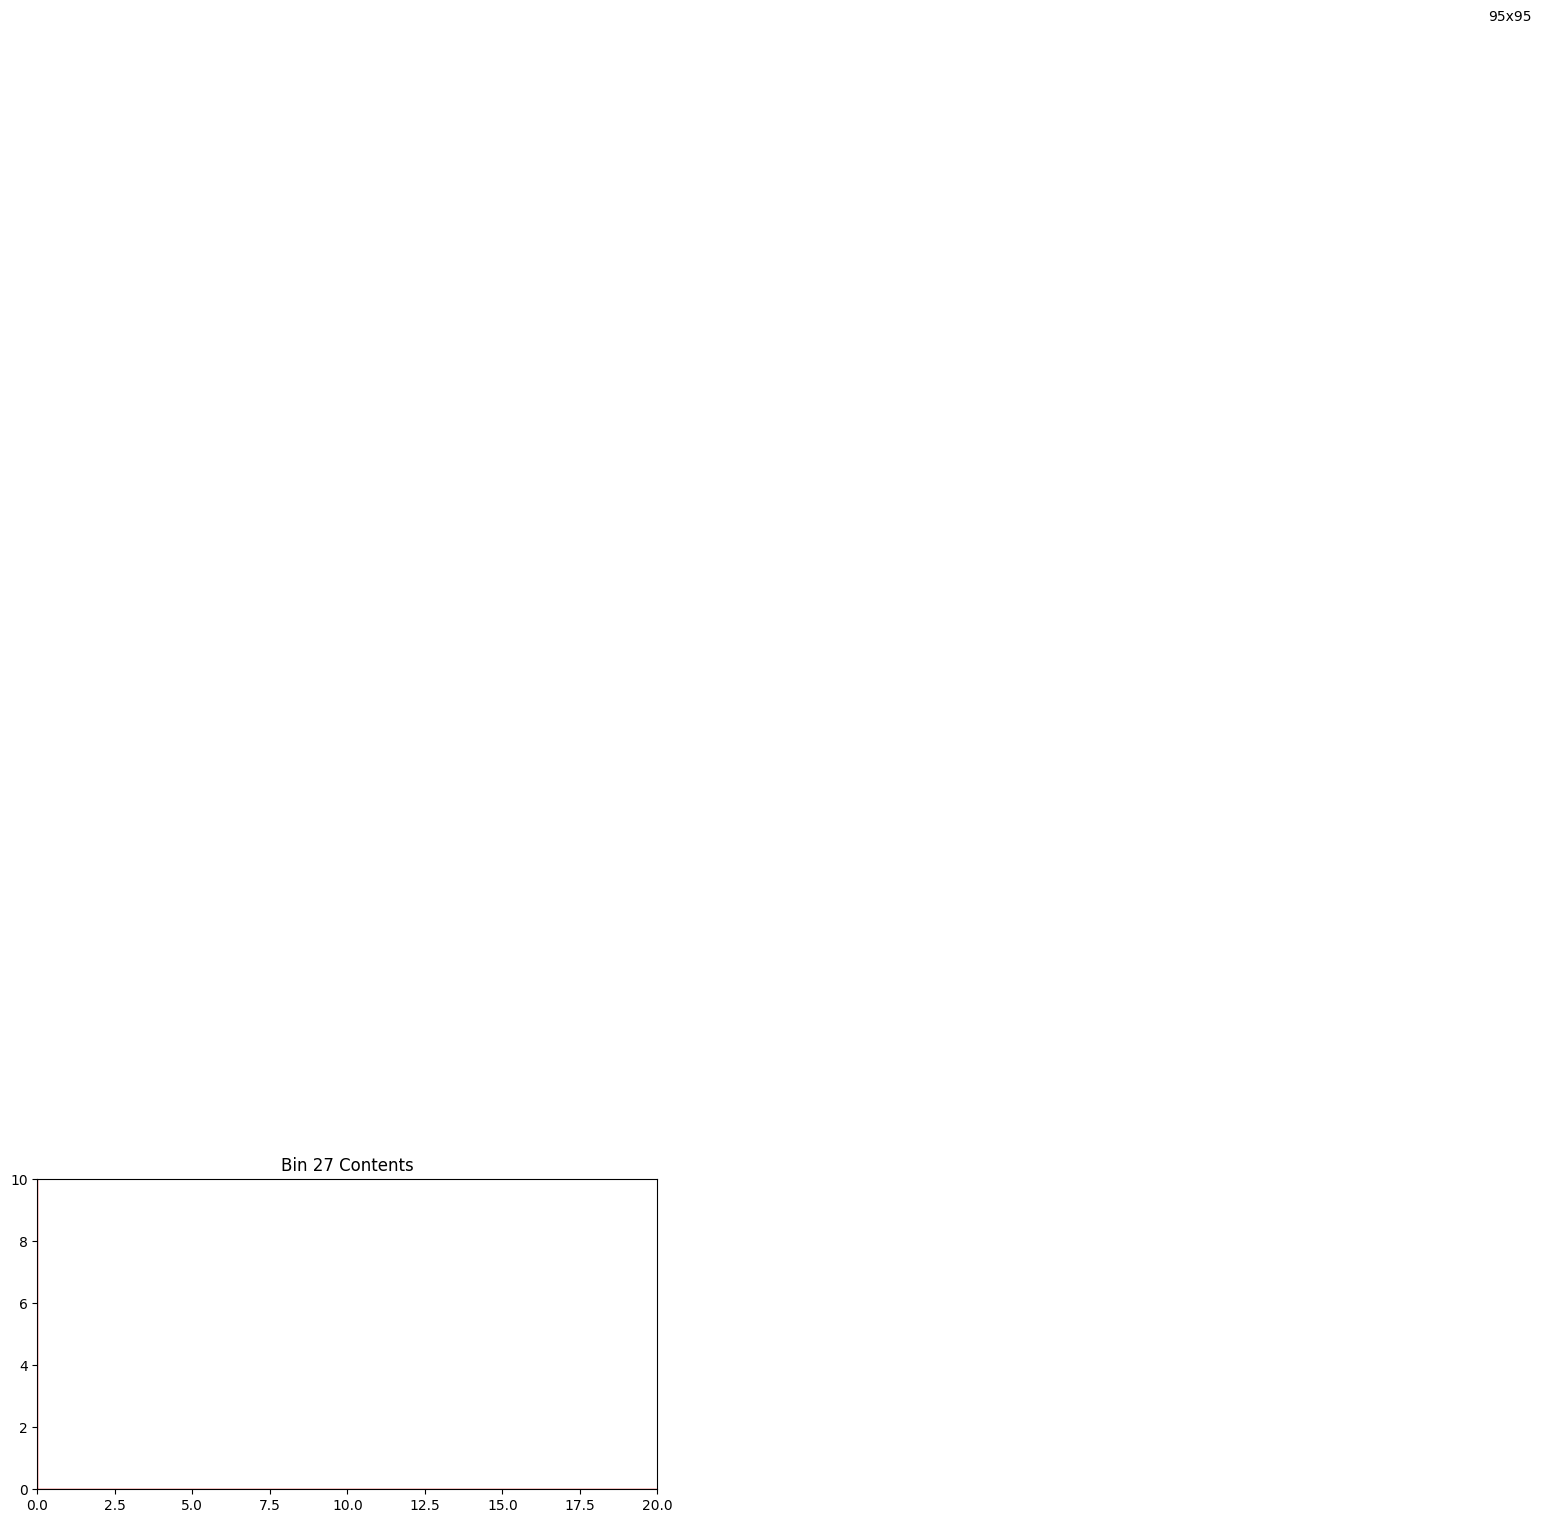

Bin 27 has -8825.00 units of area left


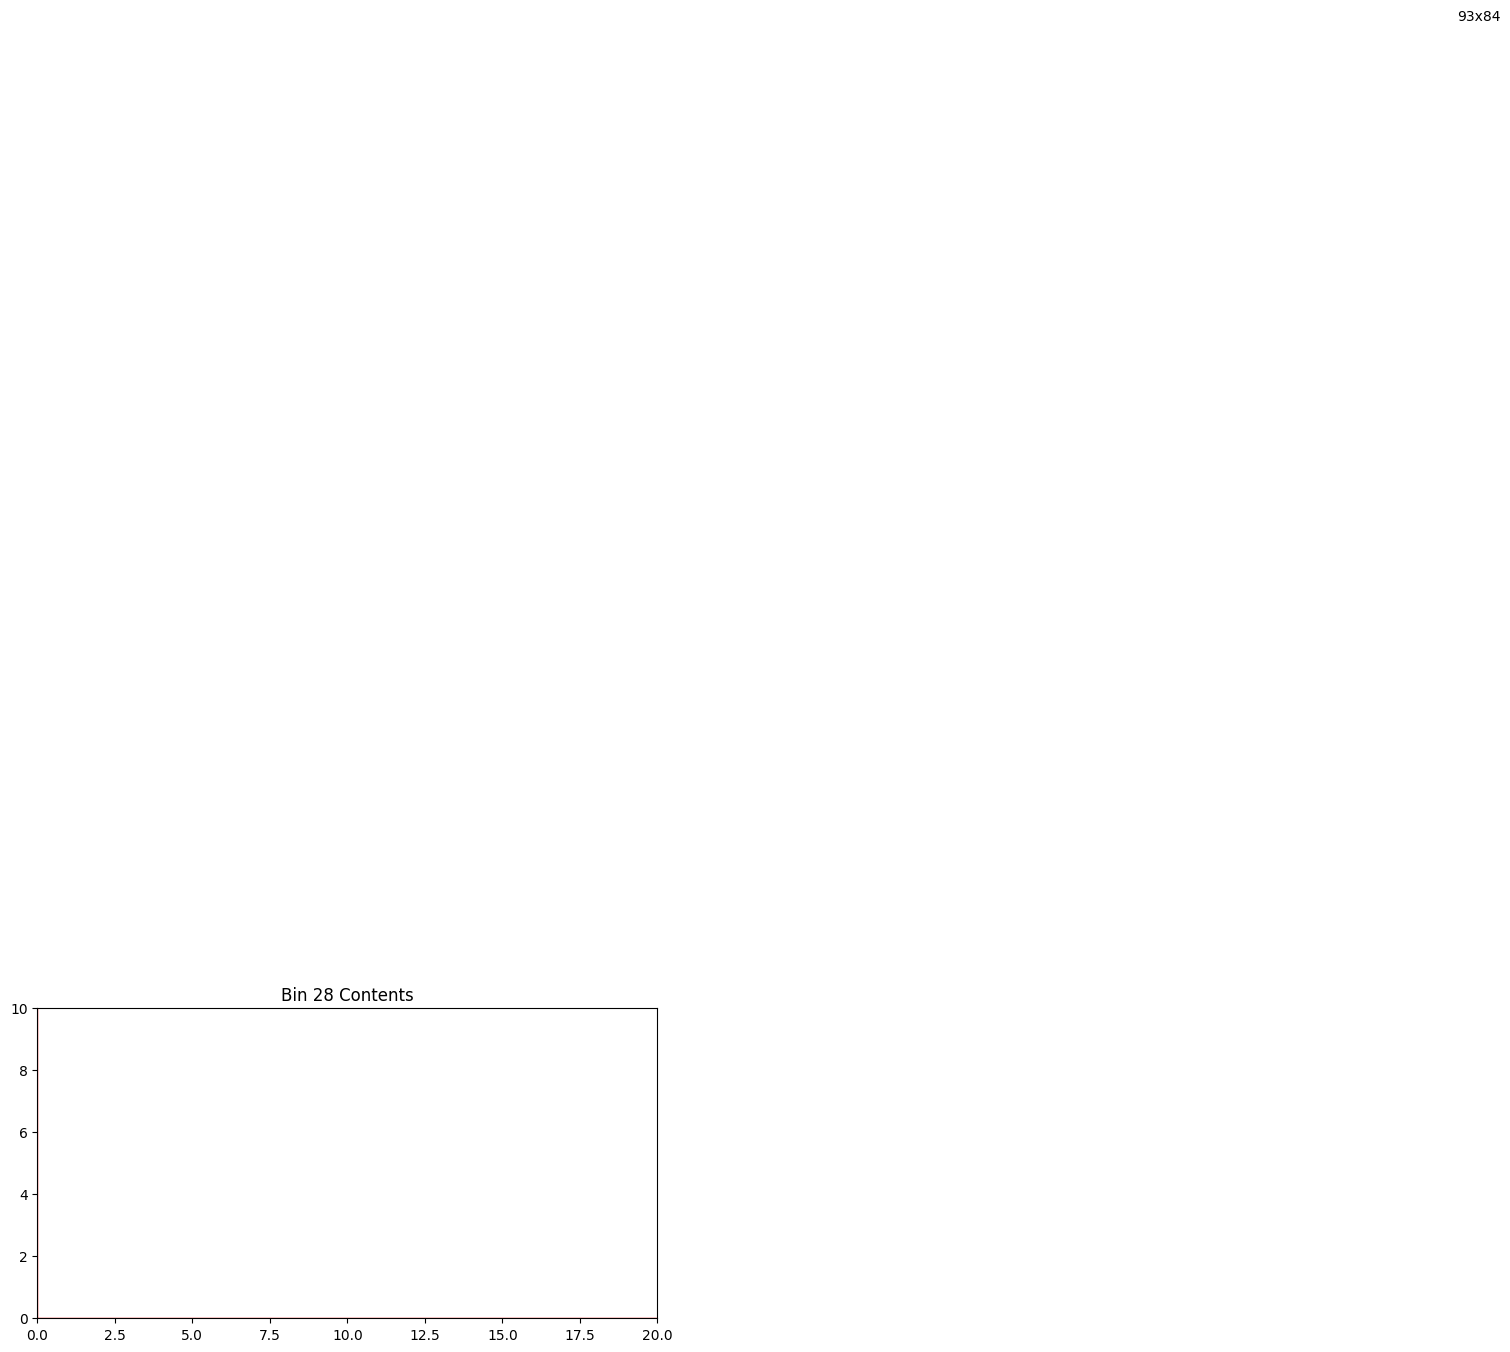

Bin 28 has -7612.00 units of area left


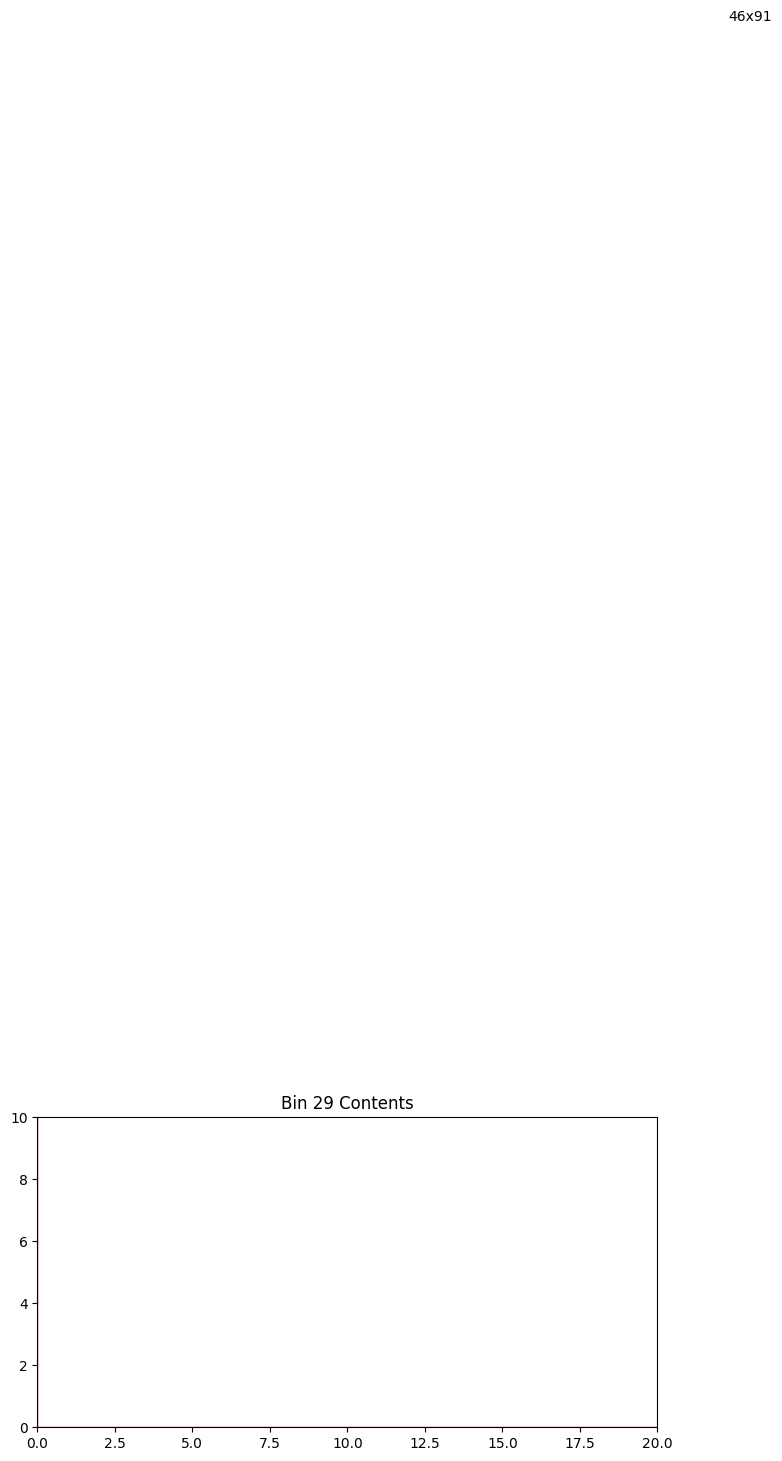

Bin 29 has -3986.00 units of area left


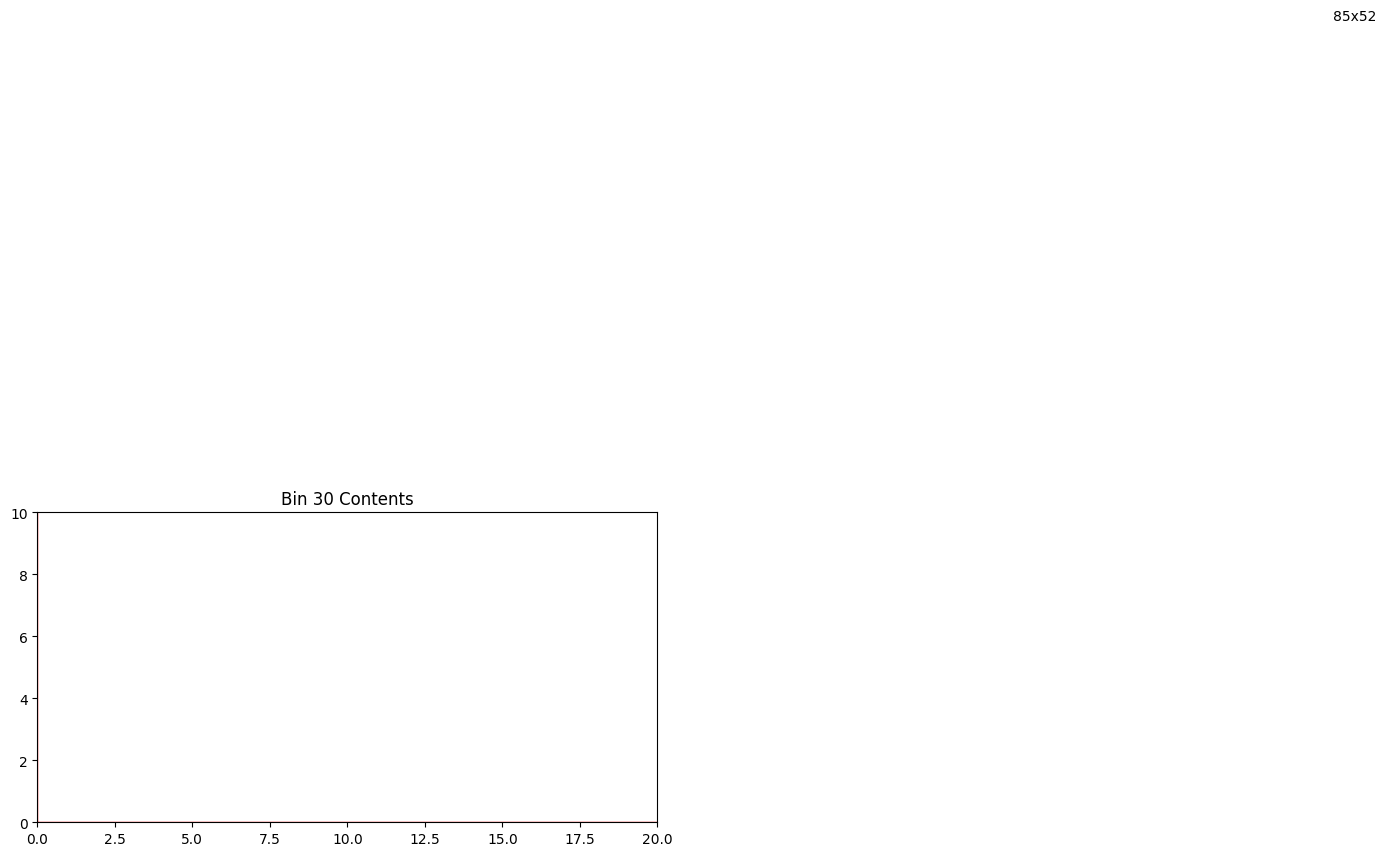

Bin 30 has -4220.00 units of area left


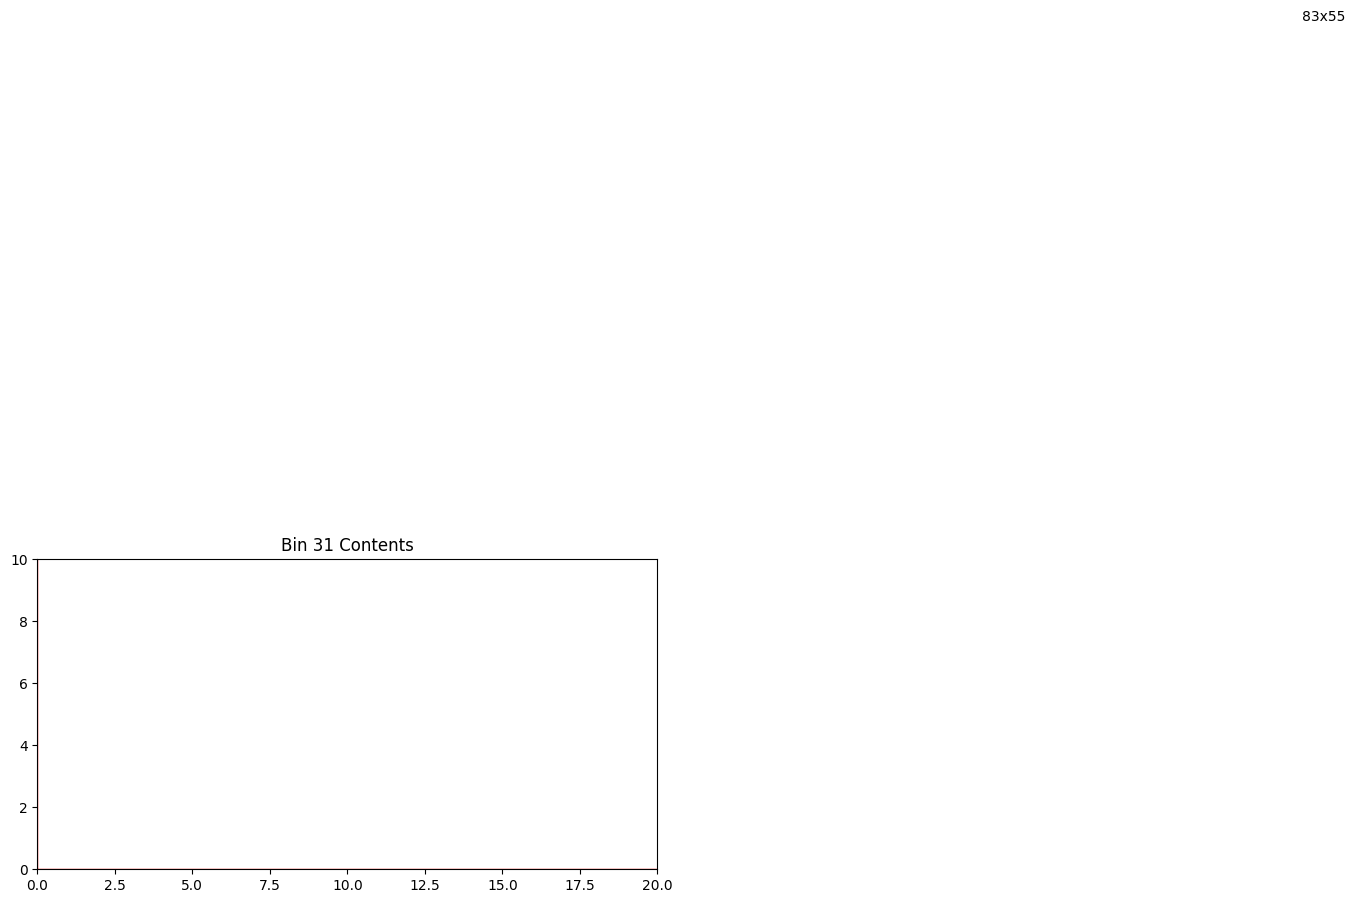

Bin 31 has -4365.00 units of area left


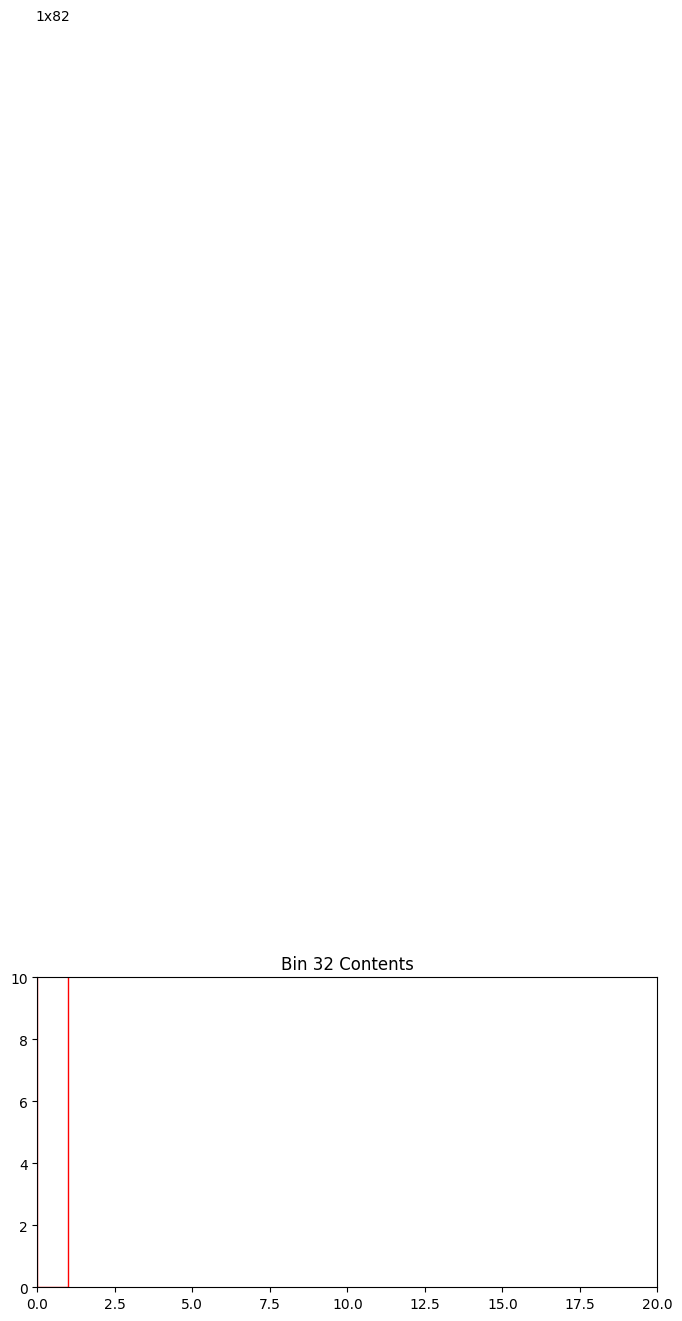

Bin 32 has 118.00 units of area left


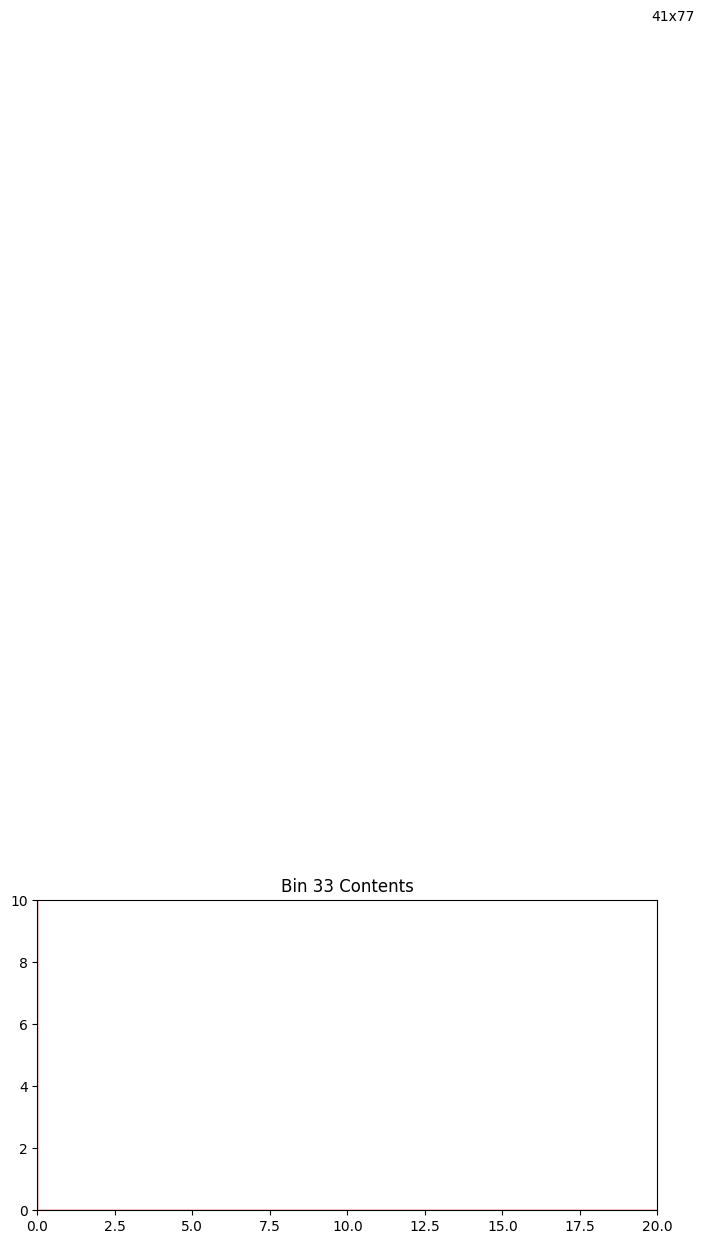

Bin 33 has -2957.00 units of area left


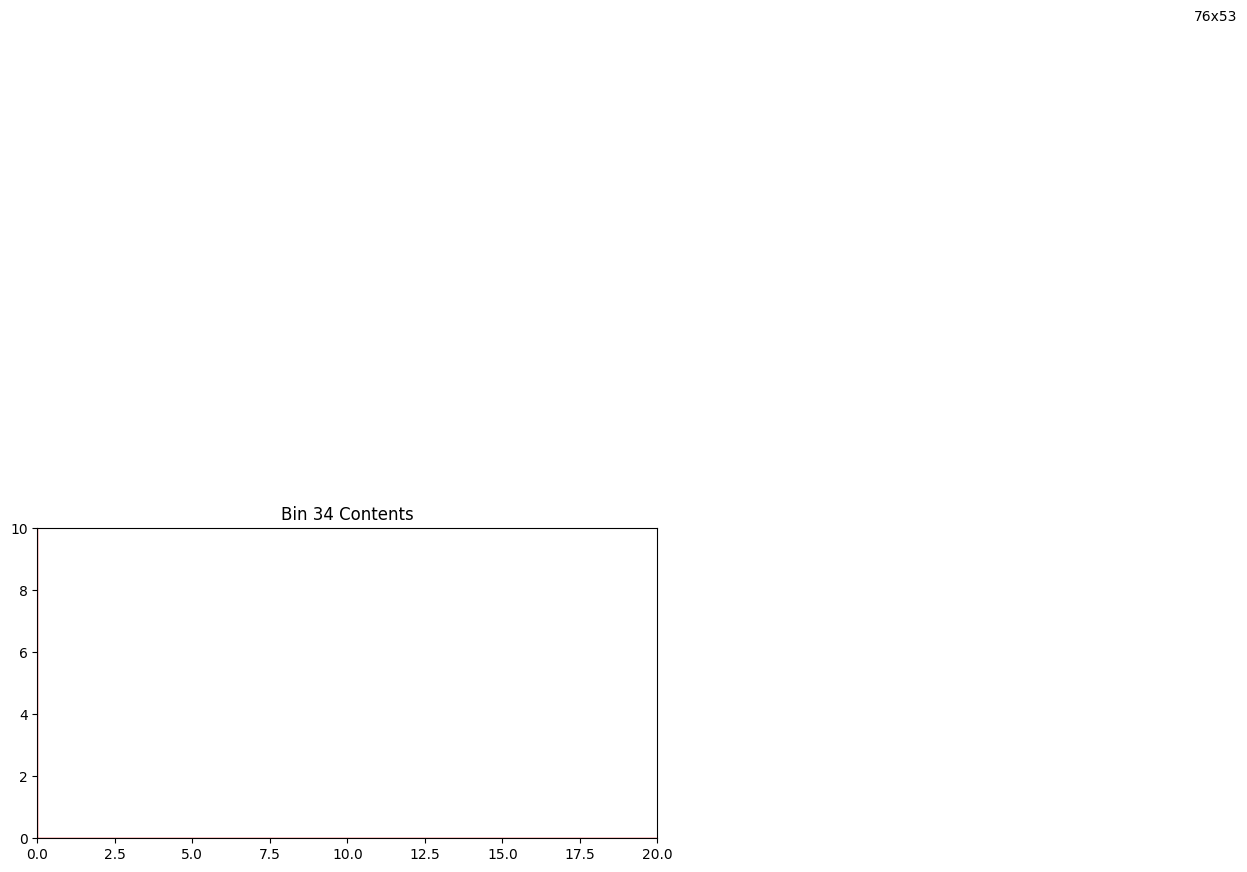

Bin 34 has -3828.00 units of area left


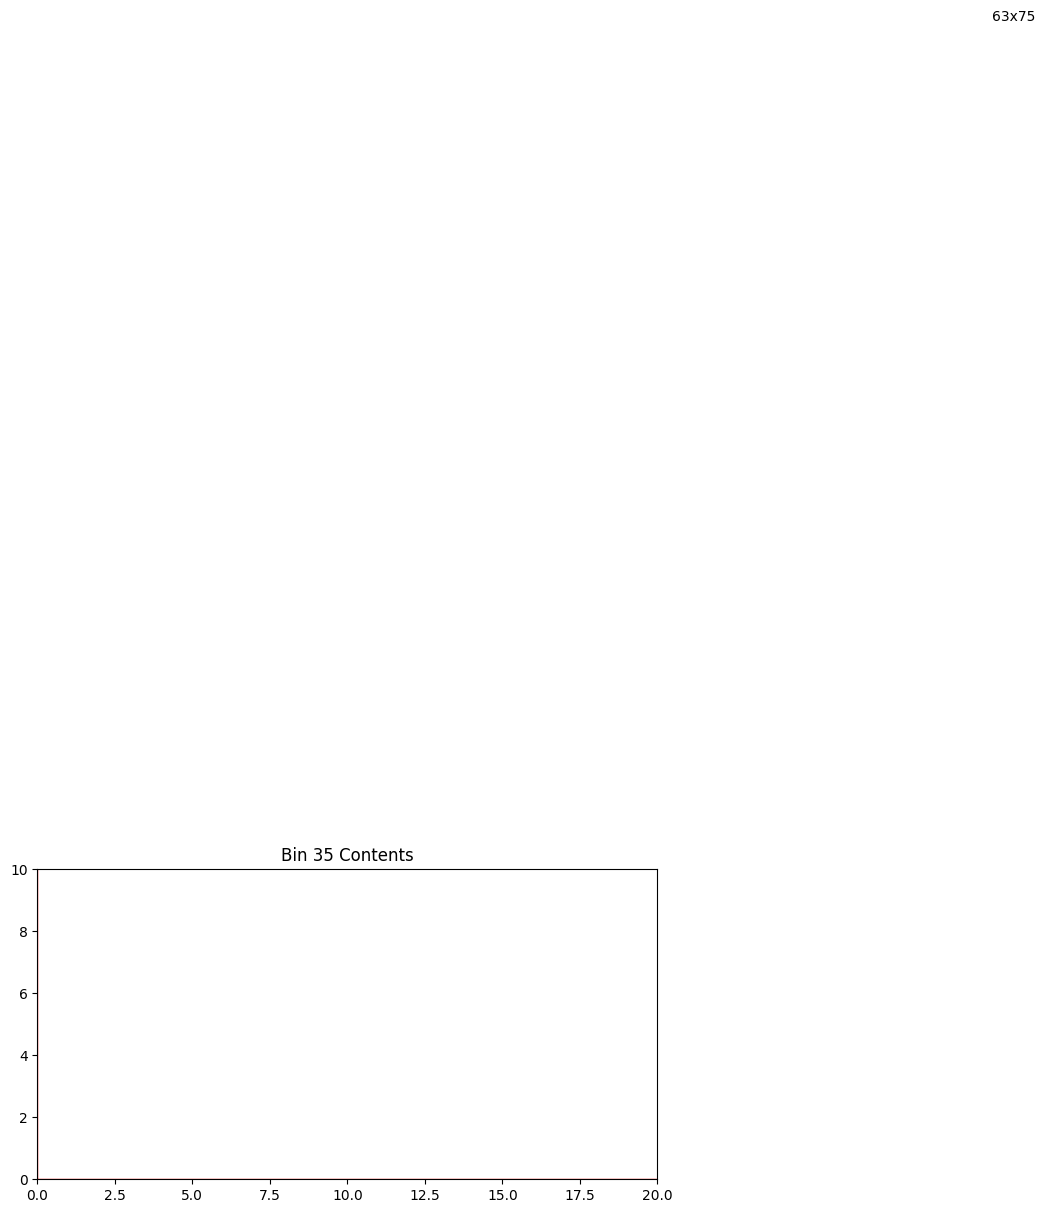

Bin 35 has -4525.00 units of area left


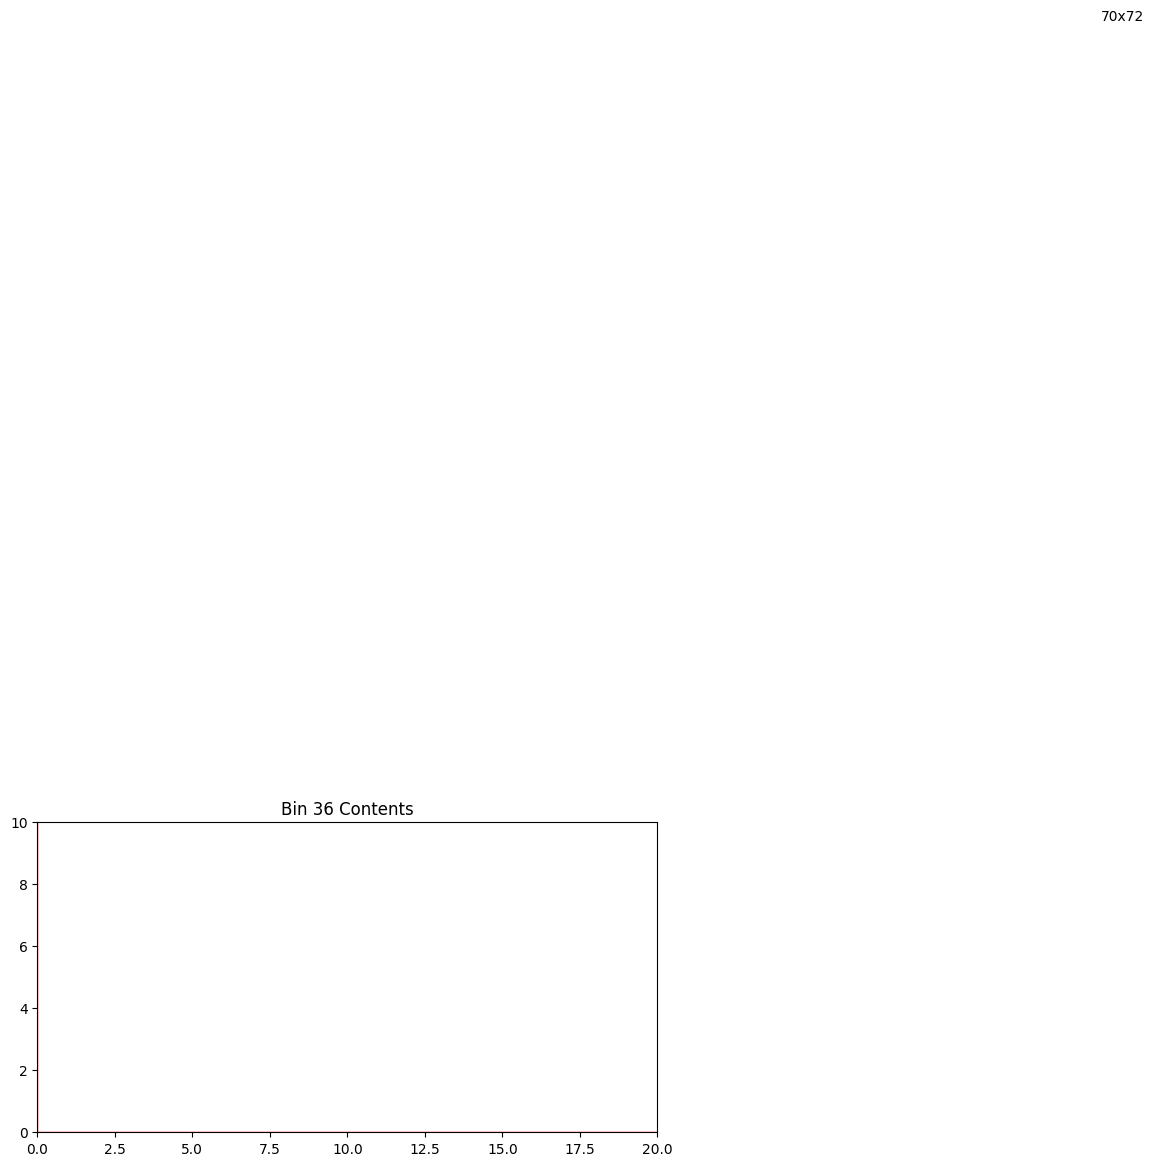

Bin 36 has -4840.00 units of area left


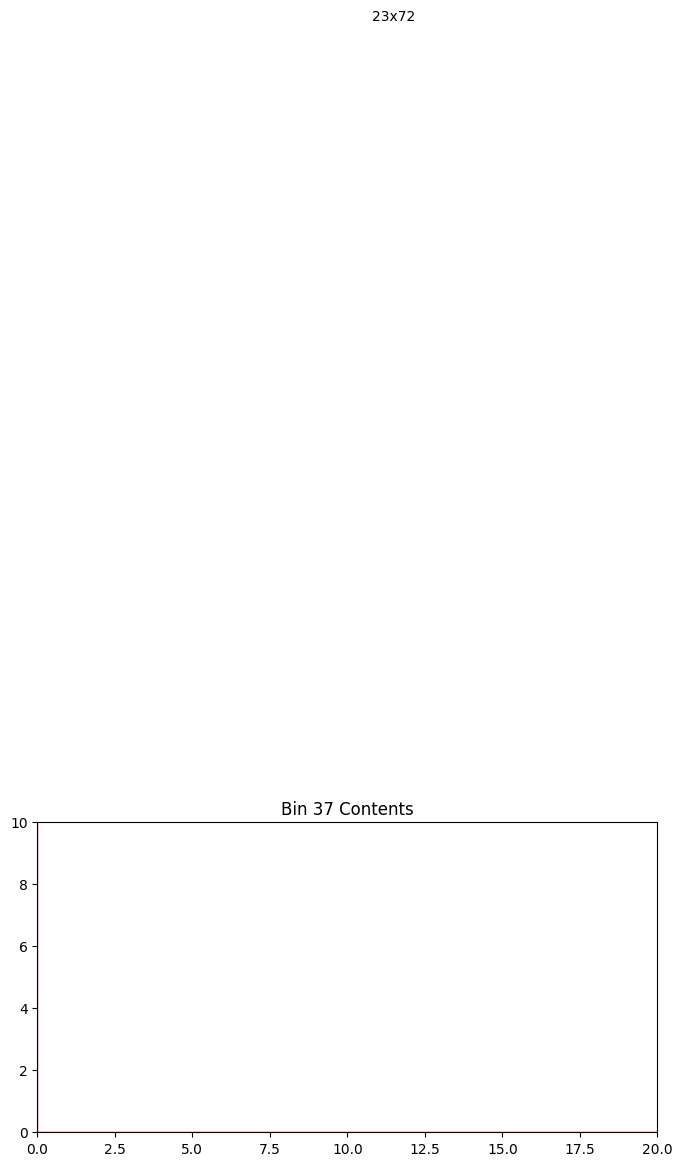

Bin 37 has -1456.00 units of area left


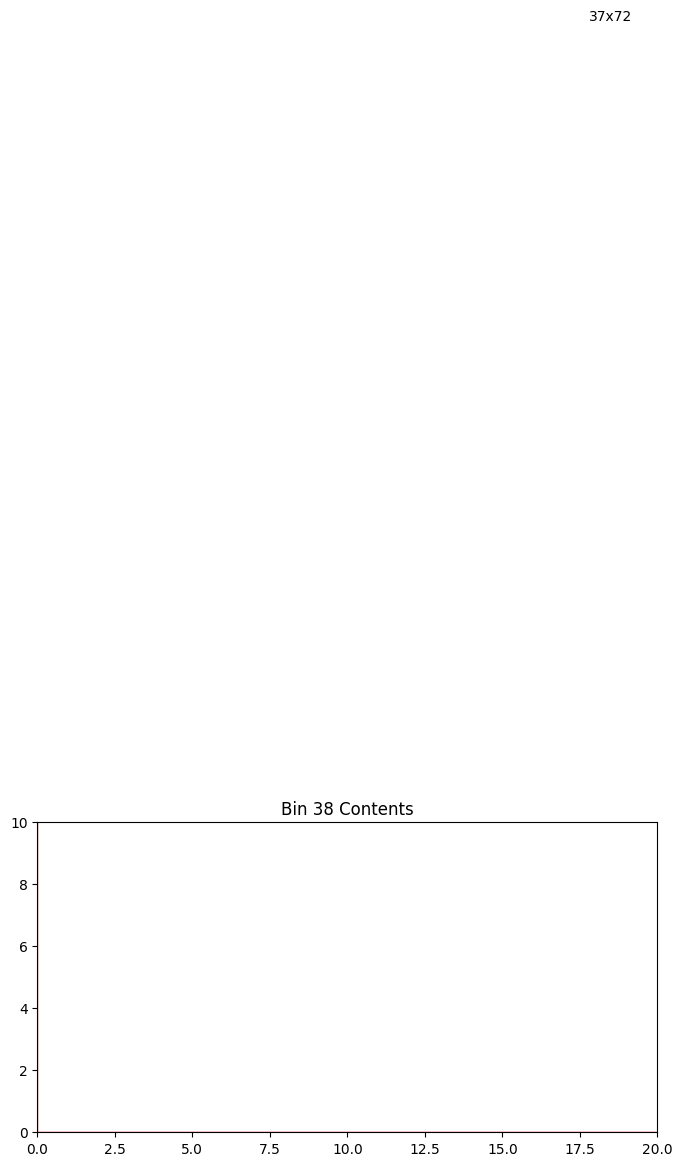

Bin 38 has -2464.00 units of area left


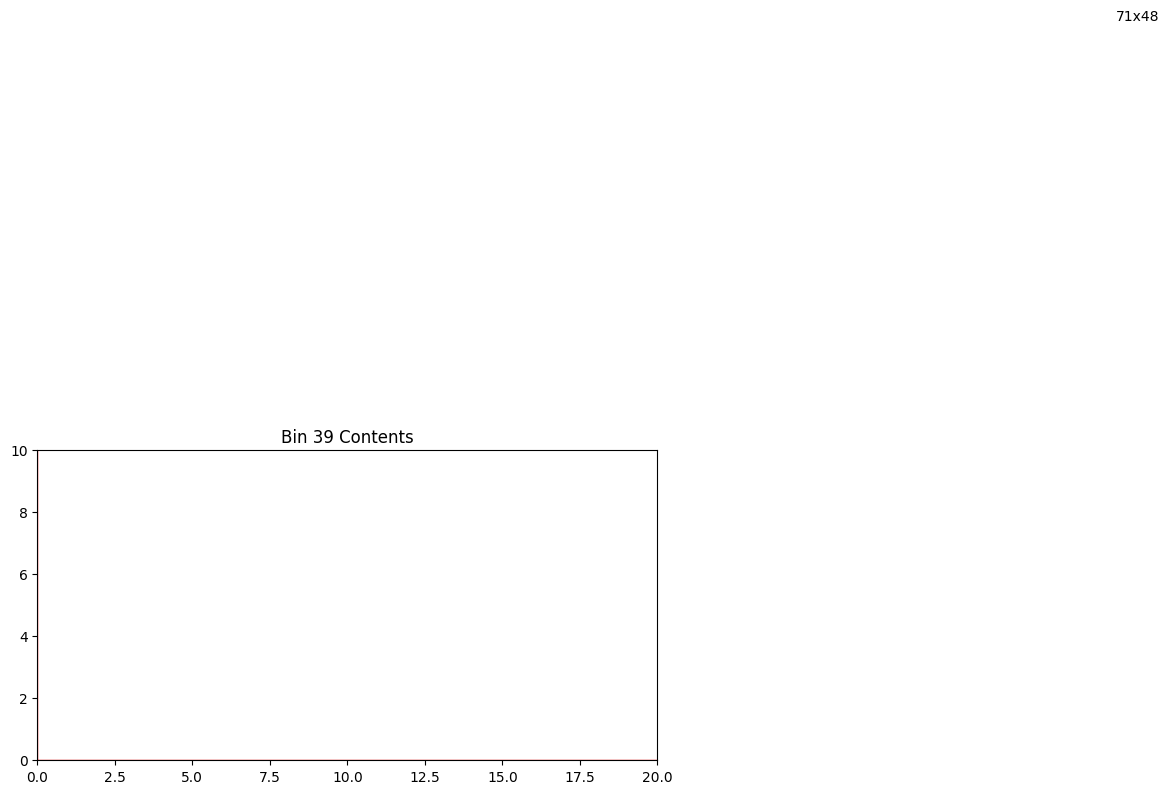

Bin 39 has -3208.00 units of area left


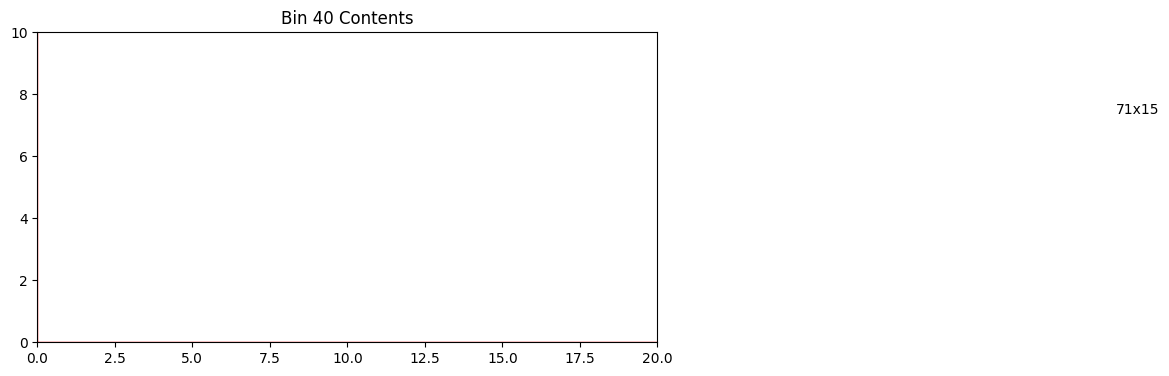

Bin 40 has -865.00 units of area left


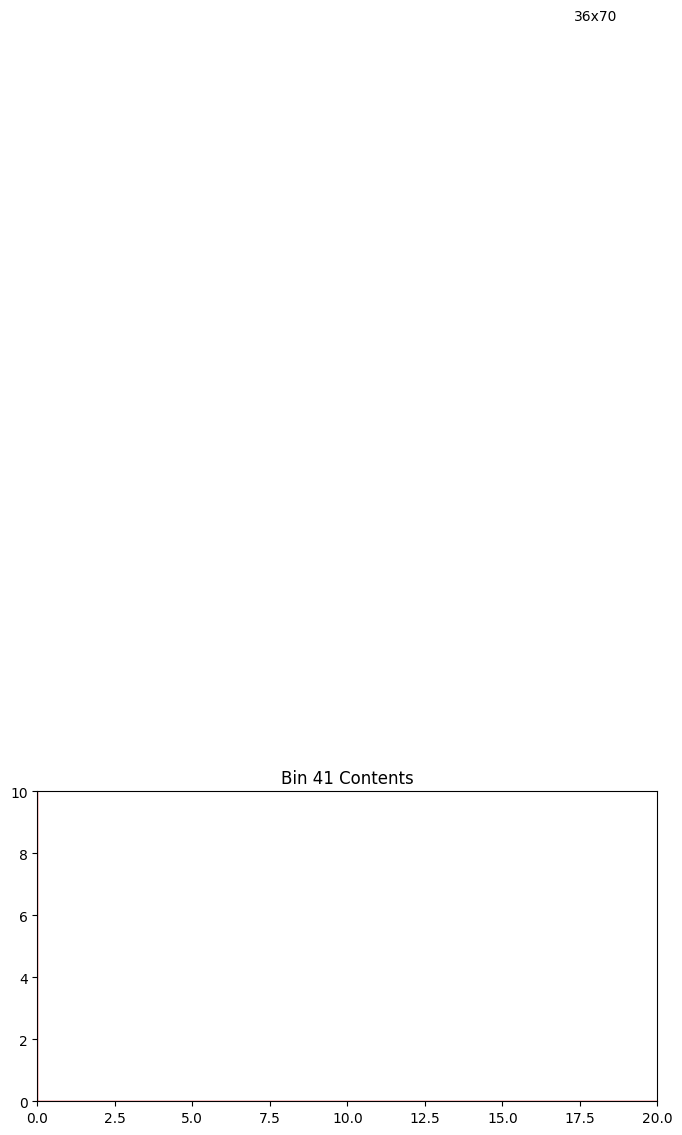

Bin 41 has -2320.00 units of area left


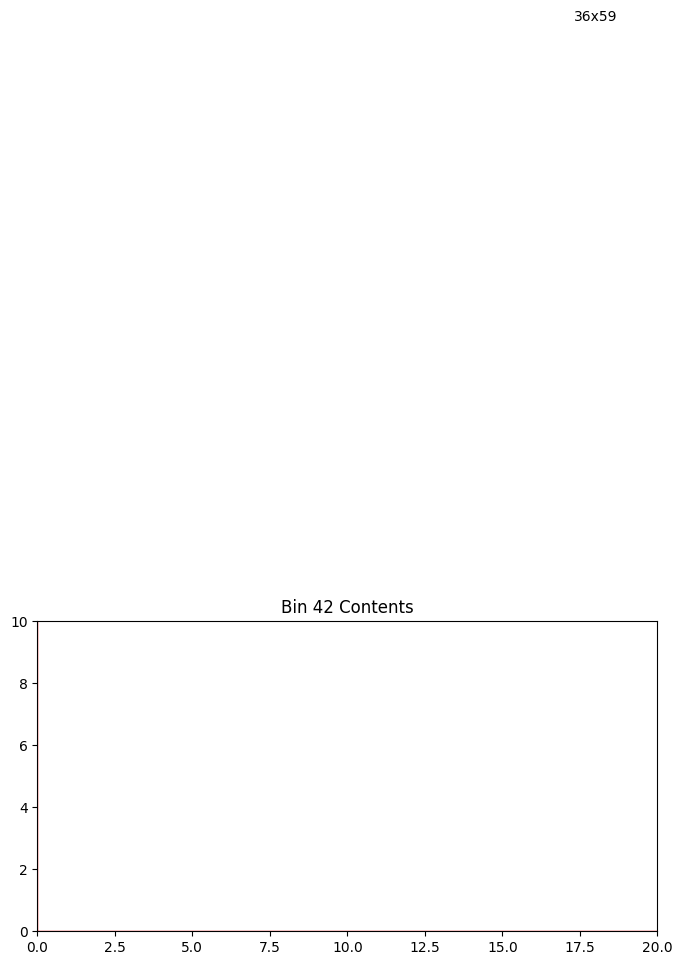

Bin 42 has -1924.00 units of area left


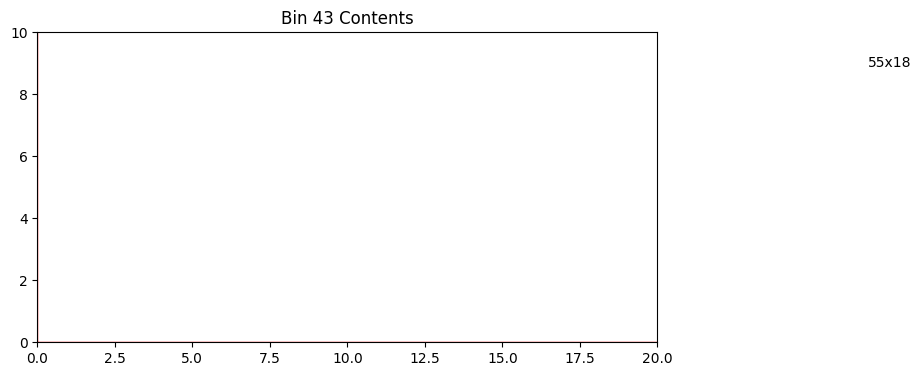

Bin 43 has -790.00 units of area left


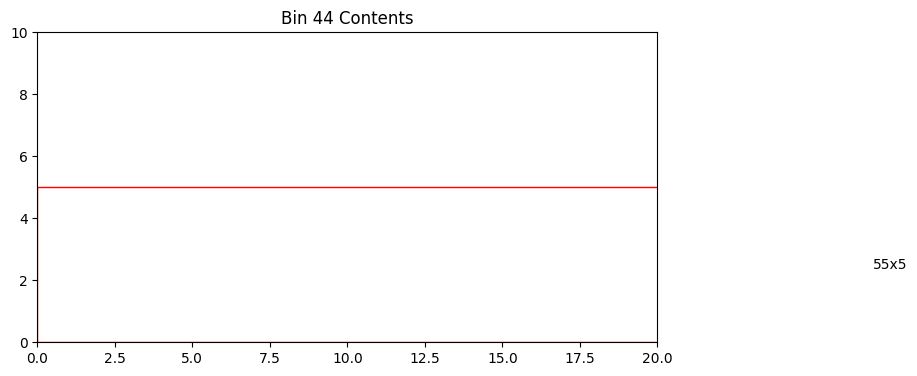

Bin 44 has -75.00 units of area left


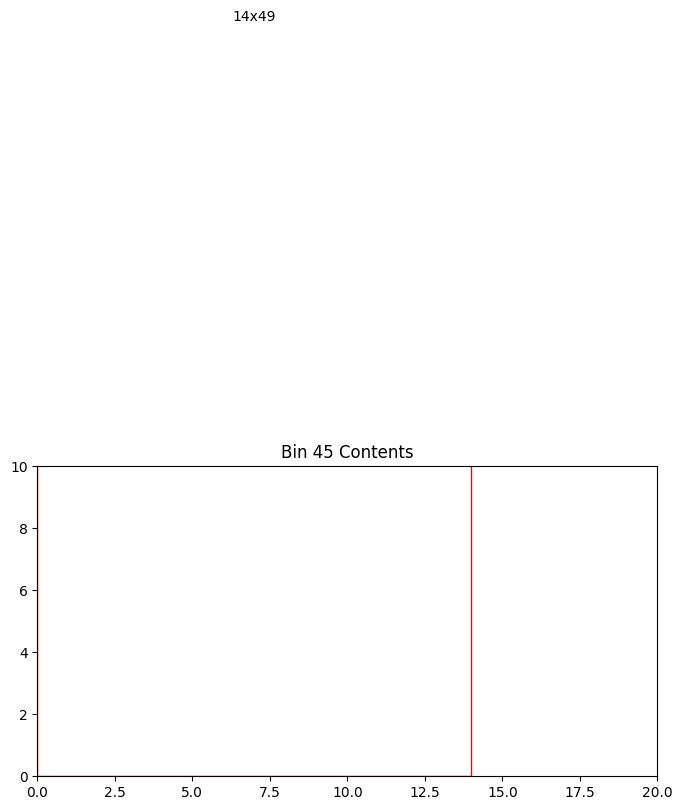

Bin 45 has -486.00 units of area left


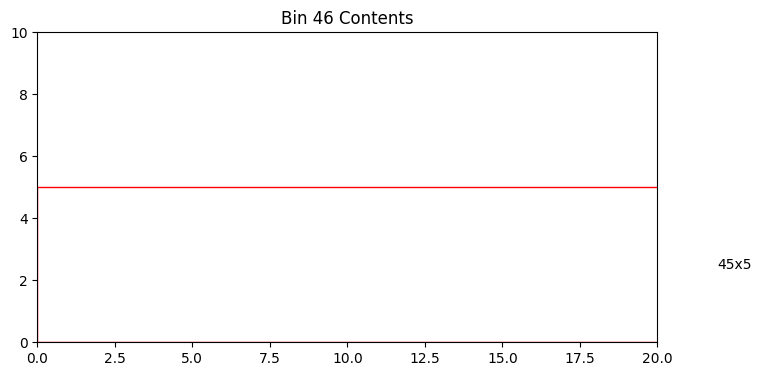

Bin 46 has -25.00 units of area left


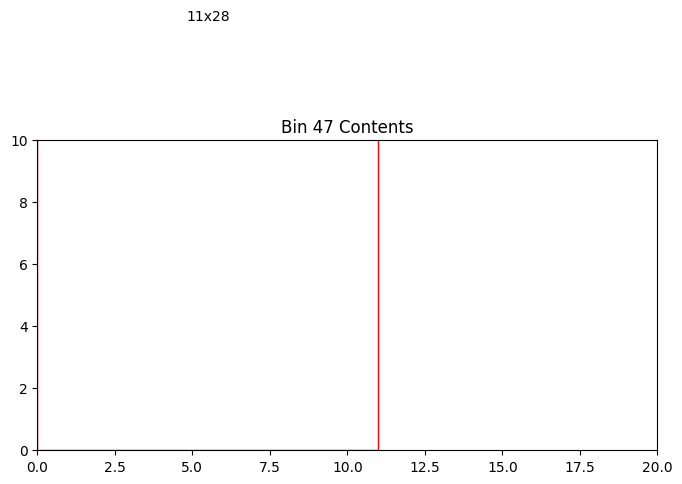

Bin 47 has -108.00 units of area left


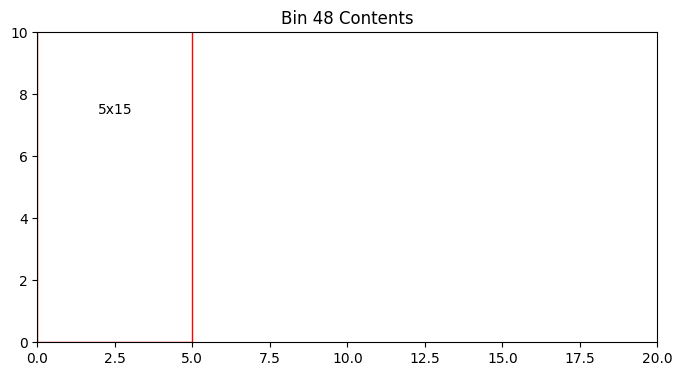

Bin 48 has 125.00 units of area left


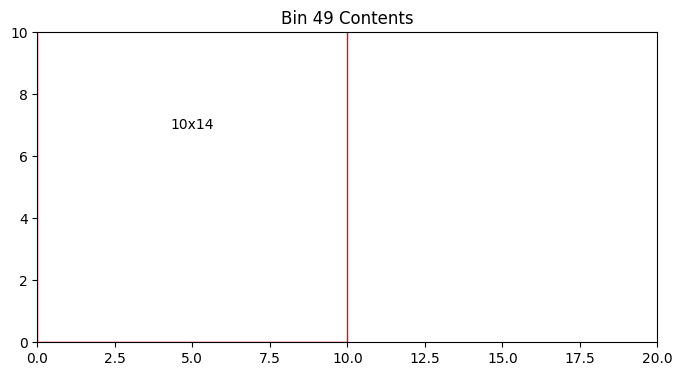

Bin 49 has 60.00 units of area left
Total number of bins = 49
Total area left in bins = -231040.00


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from typing import List, Tuple
import random
import numpy as np

def heuristics_v2(demand: np.ndarray, capacities: Tuple[int, int]) -> List[List[Tuple[int, int, int]]]:
    n = demand.shape[0]
    unpacked_items = set(range(n))
    bins = []
    bin_width, bin_height = capacities

    while unpacked_items:
        current_bin = []
        remaining_width, remaining_height = bin_width, bin_height
        row_start_x, row_start_y = 0, 0
        current_x, current_y = 0, 0
        row_max_height = 0
        
        for item in sorted(unpacked_items, key=lambda x: max(demand[x]), reverse=True):
            width, height = demand[item]
            
            if current_x + width <= remaining_width and height <= remaining_height:
                current_bin.append((item, current_x, current_y))
                current_x += width
                row_max_height = max(row_max_height, height)
            elif current_y + row_max_height + height <= remaining_height:  # Start new row
                current_x = 0
                current_y += row_max_height
                row_max_height = height
                current_bin.append((item, current_x, current_y))
                current_x += width
            else:
                break
        
        packed_items = [item[0] for item in current_bin]
        bins.append(current_bin)
        unpacked_items -= set(packed_items)
    
    return bins

def plot_rectangles(bin_number: int, bin: List[Tuple[int, int, int]], demand: np.ndarray, bin_capacities: Tuple[int, int]) -> float:
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.set_title(f'Bin {bin_number} Contents')
    bin_width, bin_height = bin_capacities
    ax.set_xlim(0, bin_width)
    ax.set_ylim(0, bin_height)
    
    total_block_area = 0
    
    for item, x, y in bin:
        width, height = demand[item]
        rect_patch = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect_patch)
        ax.text(x + width / 2, y + height / 2, f'{width}x{height}', ha='center', va='center')
        total_block_area += width * height

    bin_area = bin_width * bin_height
    area_left = bin_area - total_block_area

    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

    return area_left




class Rectangle:
    def __init__(self, width, height):
        self.width = width
        self.height = height
    def __repr__(self):
        return f"Rectangle({self.width}, {self.height})"

def generate_rectangles(num_rectangles):
    rectangles = []
    for _ in range(num_rectangles):
        width = random.randint(1, 20)  # Adjust range as needed
        height = random.randint(1, 10)  # Adjust range as needed
        rectangles.append(Rectangle(width, height))
    return rectangles

def rectangles_to_array(rectangles):
    # Create an array where each row is [width, height] of a rectangle
    data = np.array([[rect.width, rect.height] for rect in rectangles])
    return data

# Example of generating and converting rectangles
#rectangles = generate_rectangles(50)
rectangles_array = rectangles_to_array(rectangles)

# Print the resulting array
print(rectangles_array)

bin_capacities = (20, 10)

bins = heuristics_v1(rectangles_array, bin_capacities)

total_bins = len(bins)
total_area_left = 0

for bin_number, bin in enumerate(bins, start=1):
    area_left = plot_rectangles(bin_number, bin, rectangles_array, bin_capacities)
    total_area_left += area_left
    print(f'Bin {bin_number} has {area_left:.2f} units of area left')

print(f'Total number of bins = {total_bins}')
print(f'Total area left in bins = {total_area_left:.2f}')

result = {
    'total_bins': total_bins,
    'total_area_left': total_area_left
}
